In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\dorot\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

plt.style.use("seaborn-whitegrid")

C:\Users\dorot\AppData\Local\Temp\ipykernel_20280\236749747.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [5]:
raw = pd.read_csv(r"kaggle_survey_2020_responses.csv", low_memory=False)
raw.shape

(20037, 355)

In [6]:
raw.head()

Time from Start to Finish (seconds)                           Q1  \
0               Duration (in seconds)  What is your age (# years)?   
1                                1838                        35-39   
2                              289287                        30-34   
3                                 860                        35-39   
4                                 507                        30-34   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                     Man   
2                                     Man   
3                                     Man   
4                                     Man   

                                          Q3  \
0  In which country do you currently reside?   
1                                   Colombia   
2                   United States of America   
3                                  Argentina   
4                   United States of America   

                                                  Q4  \
0  What is the highest level of formal education ...   
1                                    Doctoral degree   
2                                    Master’s degree   
3                                  Bachelor’s degree   
4                                    Master’s degree   

                                                  Q5  \
0  Select the title most similar to your current ...   
1                                            Student   
2                                      Data Engineer   
3                                  Software Engineer   
4                                     Data Scientist   

                                                  Q6  \
0  For how many years have you been writing code ...   
1                                         5-10 years   
2                                         5-10 years   
3                                        10-20 years   
4                                         5-10 years   

                                           Q7_Part_1  \
0  What programming languages do you use on a reg...   
1                                             Python   
2                                             Python   
3                                                NaN   
4                                             Python   

                                           Q7_Part_2  \
0  What programming languages do you use on a reg...   
1                                                  R   
2                                                  R   
3                                                NaN   
4                                                NaN   

                                           Q7_Part_3  ...  \
0  What programming languages do you use on a reg...  ...   
1                                                SQL  ...   
2                                                SQL  ...   
3                                                NaN  ...   
4                                                SQL  ...   

                                        Q35_B_Part_2  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q35_B_Part_3  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q35_B_Part_4  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4              

In [7]:
# 질문이 담긴 행만 뽑기
question = raw.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [8]:
raw.drop?

Signature:
raw.drop(
    labels=None,
    axis=0,
    index=None,
    columns=None,
    level=None,
    inplace=False,
    errors='raise',
)
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by specifying directly index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label or list-like
    Alternative to specifying axis (``labels, axis=0``
    is equivalent to ``index=labels``).
columns : single label or list-like
    Alternative to specifying axis (``labels, axis=1``
    is equivalent to ``columns=labels``).
level : int or level name, optional
    For MultiIndex, level from which the labels will be r

In [9]:
# 대답이 담긴 행만 뽑기
answer = raw.drop([0])
answer

Time from Start to Finish (seconds)     Q1     Q2  \
1                                    1838  35-39    Man   
2                                  289287  30-34    Man   
3                                     860  35-39    Man   
4                                     507  30-34    Man   
5                                      78  30-34    Man   
...                                   ...    ...    ...   
20032                                 126  18-21    Man   
20033                                 566  55-59  Woman   
20034                                 238  30-34    Man   
20035                                 625  22-24    Man   
20036                                1031  22-24    Man   

                                                      Q3  \
1                                               Colombia   
2                               United States of America   
3                                              Argentina   
4                               United States of America   
5                                                  Japan   
...                                                  ...   
20032                                             Turkey   
20033  United Kingdom of Great Britain and Northern I...   
20034                                             Brazil   
20035                                              India   
20036                                           Pakistan   

                                                      Q4  \
1                                        Doctoral degree   
2                                        Master’s degree   
3                                      Bachelor’s degree   
4                                        Master’s degree   
5                                        Master’s degree   
...                                                  ...   
20032  Some college/university study without earning ...   
20033                                    Master’s degree   
20034                                    Master’s degree   
20035                                  Bachelor’s degree   
20036                                    Master’s degree   

                              Q5           Q6 Q7_Part_1 Q7_Part_2 Q7_Part_3  \
1                        Student   5-10 years    Python         R       SQL   
2                  Data Engineer   5-10 years    Python         R       SQL   
3              Software Engineer  10-20 years       NaN       NaN       NaN   
4                 Data Scientist   5-10 years    Python       NaN       SQL   
5              Software Engineer    3-5 years    Python       NaN       NaN   
...                          ...          ...       ...       ...       ...   
20032                        NaN          NaN       NaN       NaN       NaN   
20033     Currently not employed    20+ years    Python       NaN       NaN   
20034         Research Scientist    < 1 years    Python       NaN       NaN   
20035          Software Engineer    3-5 years    Python       NaN       SQL   
20036  Machine Learning Engineer    < 1 years    Python       NaN       NaN   

       ...        Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4   Q35_B_Part_5  \
1      ...                 NaN          NaN          NaN   TensorBoard    
2      ...                 NaN          NaN          NaN            NaN   
3      ...                 NaN          NaN          NaN            NaN   
4      ...                 NaN          NaN          NaN            NaN   
5      ...                 NaN          NaN          NaN            NaN   
...    ...                 ...          ...          ...            ...   
20032  ...                 NaN          NaN          NaN            NaN   
20033  ...                 NaN          NaN          NaN            NaN   
20034  ...                 NaN          NaN          NaN            NaN   
20035  ...   Weights & Biases           NaN          NaN   TensorBoard    
20036  ...   Weights & Biases           NaN          NaN            NaN   

     

In [10]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20036 entries, 1 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.4+ MB


## Q1 What is your age (# years)?

In [11]:
question["Q1"]

'What is your age (# years)?'

In [12]:
# Q1의 대답
answer['Q1']

1        35-39
2        30-34
3        35-39
4        30-34
5        30-34
         ...  
20032    18-21
20033    55-59
20034    30-34
20035    22-24
20036    22-24
Name: Q1, Length: 20036, dtype: object

In [13]:
# Q1의 대답의 빈도수 (빈도가 높은 순으로 정렬됨)
answer['Q1'].value_counts()

25-29    4011
22-24    3786
18-21    3469
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

In [14]:
# 값의 빈도를 비율로 확인
answer['Q1'].value_counts(normalize='True')

25-29    0.200190
22-24    0.188960
18-21    0.173138
30-34    0.140297
35-39    0.099371
40-44    0.069724
45-49    0.049311
50-54    0.034837
55-59    0.020513
60-69    0.019864
70+      0.003793
Name: Q1, dtype: float64

In [15]:
# 값의 빈도를 백분율(%)로 확인
answer['Q1'].value_counts(normalize='True') * 100

25-29    20.018966
22-24    18.895987
18-21    17.313835
30-34    14.029746
35-39     9.937113
40-44     6.972450
45-49     4.931124
50-54     3.483729
55-59     2.051308
60-69     1.986424
70+       0.379317
Name: Q1, dtype: float64

In [16]:
# 인덱스 순으로 빈도수 출력
answer['Q1'].value_counts().sort_index()

18-21    3469
22-24    3786
25-29    4011
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

### 시각화

#### pandas의 plot을 사용하여 시각화

<AxesSubplot:>

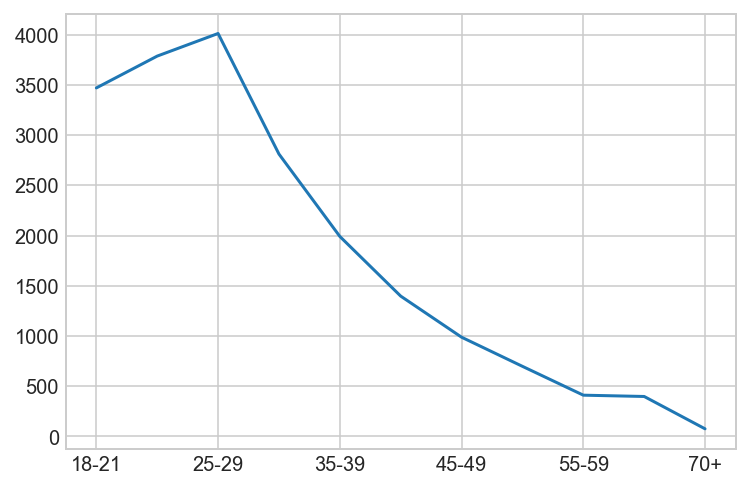

In [17]:
answer['Q1'].value_counts().sort_index().plot()

<AxesSubplot:>

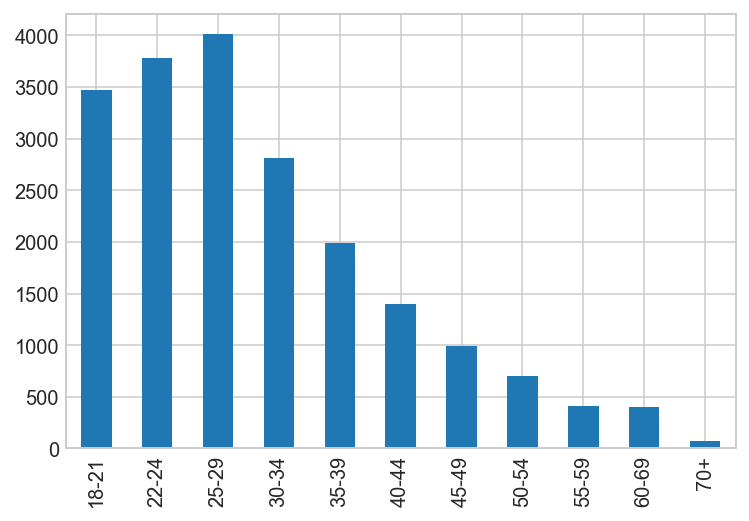

In [18]:
# 막대그래프
answer['Q1'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

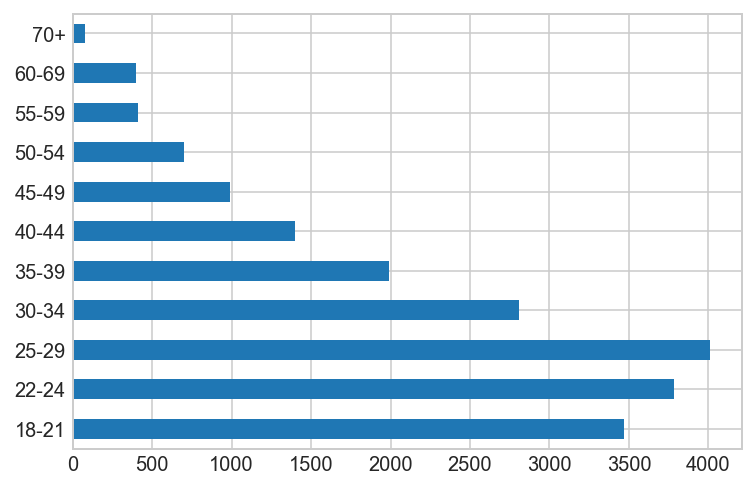

In [19]:
# y축기준으로 막대그래프
answer['Q1'].value_counts().sort_index().plot.barh()

#### seaborn의 countplot을 사용하여 시각화

In [20]:
Q1 = answer['Q1'].value_counts().sort_index()  # Q1의 대답 빈도수를 인덱스 순으로 정렬
Q1

18-21    3469
22-24    3786
25-29    4011
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

<AxesSubplot:xlabel='Q1', ylabel='count'>

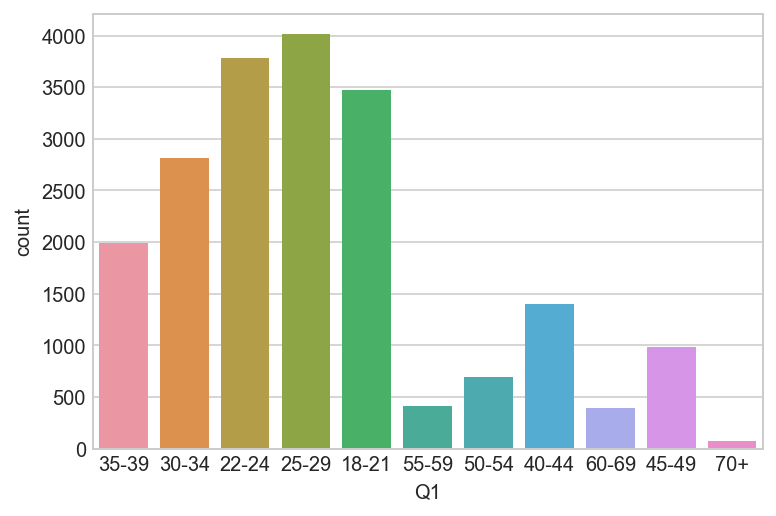

In [21]:
sns.countplot(data=answer, x='Q1')  # x축 정렬이 뒤죽박죽으로 됨

Text(0.5, 1.0, 'What is your age (# years)?')

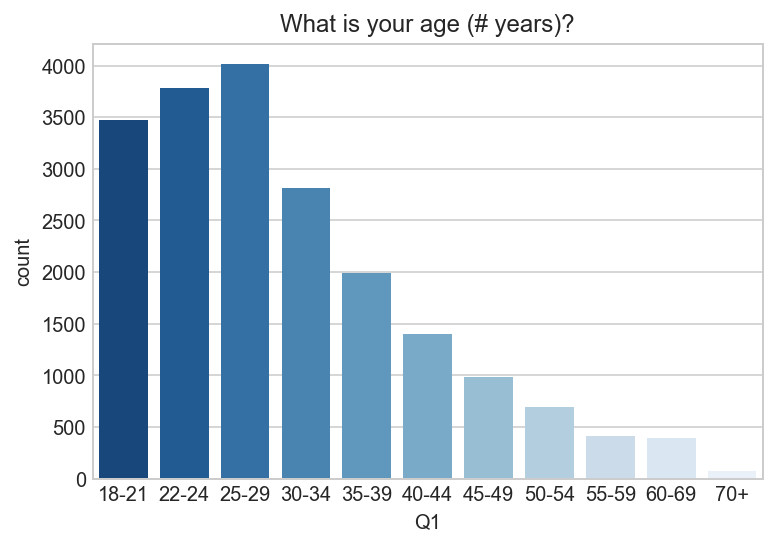

In [22]:
sns.countplot(data=answer.sort_values("Q1"), x="Q1",        # 데이터를 Q1의 인덱스 순으로 정렬
              palette="Blues_r").set_title(question["Q1"])  # "Blues" : 밝은 색 -> 어두운 색 그라데이션 / "Blues_r" : 어두운 색 -> 밝은색 그라데이션

## Q2 What is your gender? - Selected Choice

In [23]:
question_no = "Q2"
Q2 = answer[question_no].value_counts()  # Q2에 대한 대답을 빈도 높은 순서로 정렬
Q2

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

Text(0.5, 1.0, 'What is your gender? - Selected Choice')

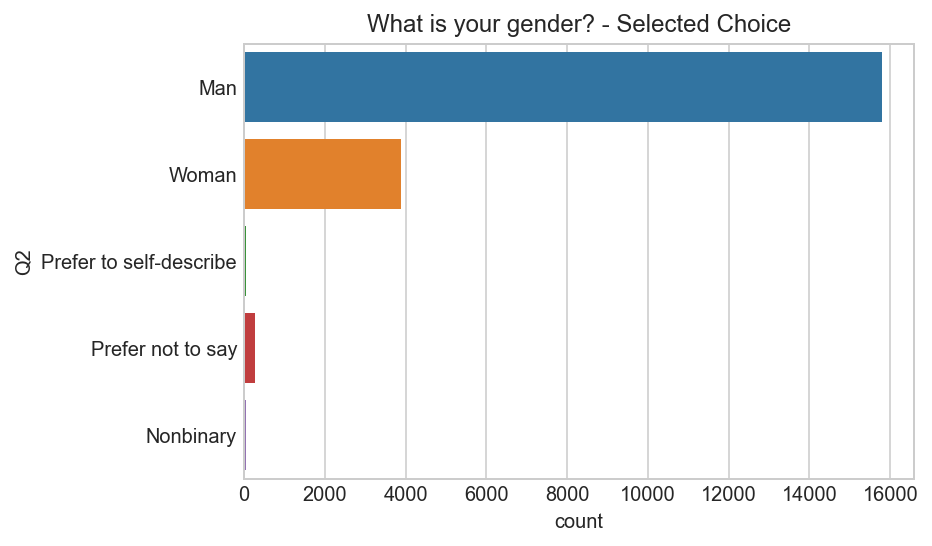

In [24]:
sns.countplot(data=answer, 
              y=question_no).set_title(question[question_no])

### 2개 질문에 대한 answer를 한눈에 보기

In [25]:
answer['Q1']  # 연령대

1        35-39
2        30-34
3        35-39
4        30-34
5        30-34
         ...  
20032    18-21
20033    55-59
20034    30-34
20035    22-24
20036    22-24
Name: Q1, Length: 20036, dtype: object

In [26]:
answer['Q2']   # 성별

1          Man
2          Man
3          Man
4          Man
5          Man
         ...  
20032      Man
20033    Woman
20034      Man
20035      Man
20036      Man
Name: Q2, Length: 20036, dtype: object

In [27]:
answer['Q1'].value_counts()  # 연령별 빈도수

25-29    4011
22-24    3786
18-21    3469
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

In [28]:
answer['Q2'].value_counts()  # 성별 빈도수

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

In [29]:
# 2개 질문의 answer에 대한 빈도수를 한번에 확인 (crosstab)
q1q2= pd.crosstab(answer['Q1'], answer['Q2'])
q1q2

Q2      Man  Nonbinary  Prefer not to say  Prefer to self-describe  Woman
Q1                                                                       
18-21  2611          8                 42                       12    796
22-24  2838         12                 41                        9    886
25-29  3128         13                 42                        9    819
30-34  2246          8                 44                        9    504
35-39  1581          7                 33                        2    368
40-44  1153          2                 15                        5    222
45-49   840          1                 17                        4    126
50-54   605          0                 10                        2     81
55-59   353          0                 13                        0     45
60-69   362          1                  4                        2     29
70+      72          0                  2                        0      2

In [30]:
# Q2의 answer 중에서 Man만 뽑아서 보기
q1q2['Man']

Q1
18-21    2611
22-24    2838
25-29    3128
30-34    2246
35-39    1581
40-44    1153
45-49     840
50-54     605
55-59     353
60-69     362
70+        72
Name: Man, dtype: int64

In [31]:
# Q2의 answer 중에서 Man과 Woman만 뽑아서 보기
q1q2[['Man', 'Woman']]

Q2      Man  Woman
Q1                
18-21  2611    796
22-24  2838    886
25-29  3128    819
30-34  2246    504
35-39  1581    368
40-44  1153    222
45-49   840    126
50-54   605     81
55-59   353     45
60-69   362     29
70+      72      2

#### pandas의 plot을 사용해서 선그래프 그리기
보통 연속된 수치데이터인 경우, 선그래프 (`plot()`) 를 통해 값의 기울기를 본다.  
비연속적인 데이터인 경우 -> 막대그래프 (`plot.bar()`) 로 확인.

<AxesSubplot:xlabel='Q1'>

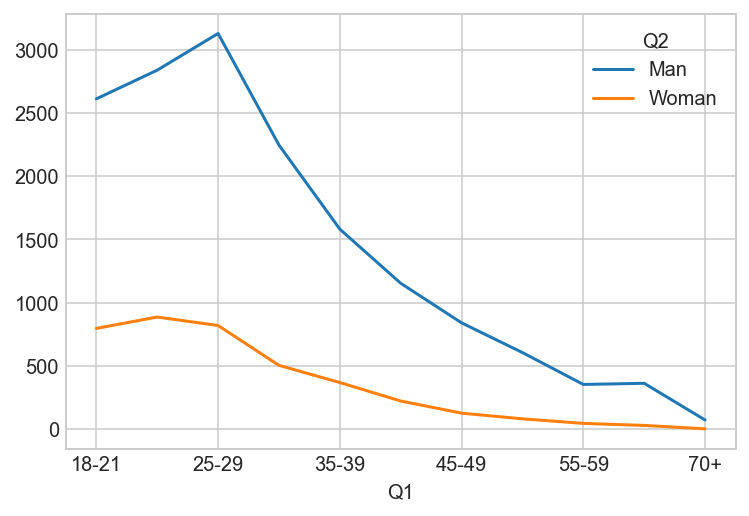

In [32]:
# 보통 인덱스값이 x축, column에 있는 value가 y축에 온다.
q1q2[['Man', 'Woman']].plot()

<AxesSubplot:xlabel='Q1'>

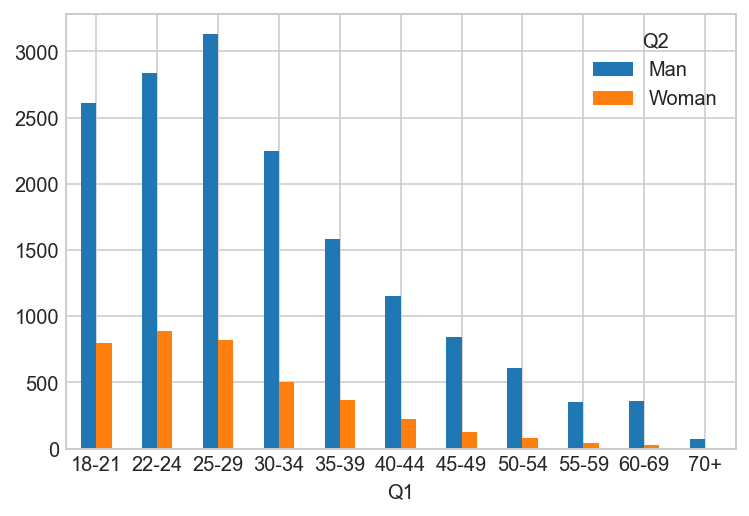

In [33]:
# 막대그래프로 확인
q1q2[['Man', 'Woman']].plot.bar(rot = 0)  # rot=0 : x축의 텍스트를 가로로 표시

-> 전체 응답자의 비율 중 남성이 차지하는 비율이 훨씬 큼  
-> 연령대가 높아짐에 따라 여성의 비율이 훨씬 낮다는 것을 확인할 수 있음

<AxesSubplot:ylabel='Q1'>

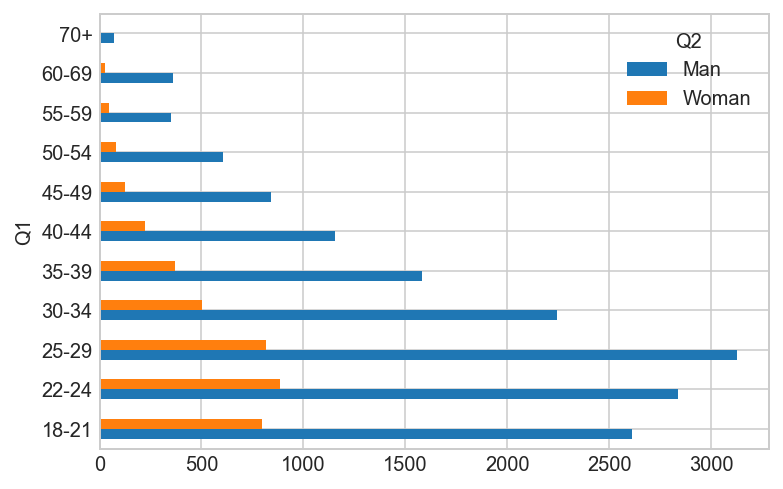

In [34]:
# 텍스트가 길 때에는, x축 보다는 y축에 그리는것이 가독성이 좋음 (plt.barh())
q1q2[['Man', 'Woman']].plot.barh()

<AxesSubplot:title={'center':'Age & Gender'}, ylabel='Q1'>

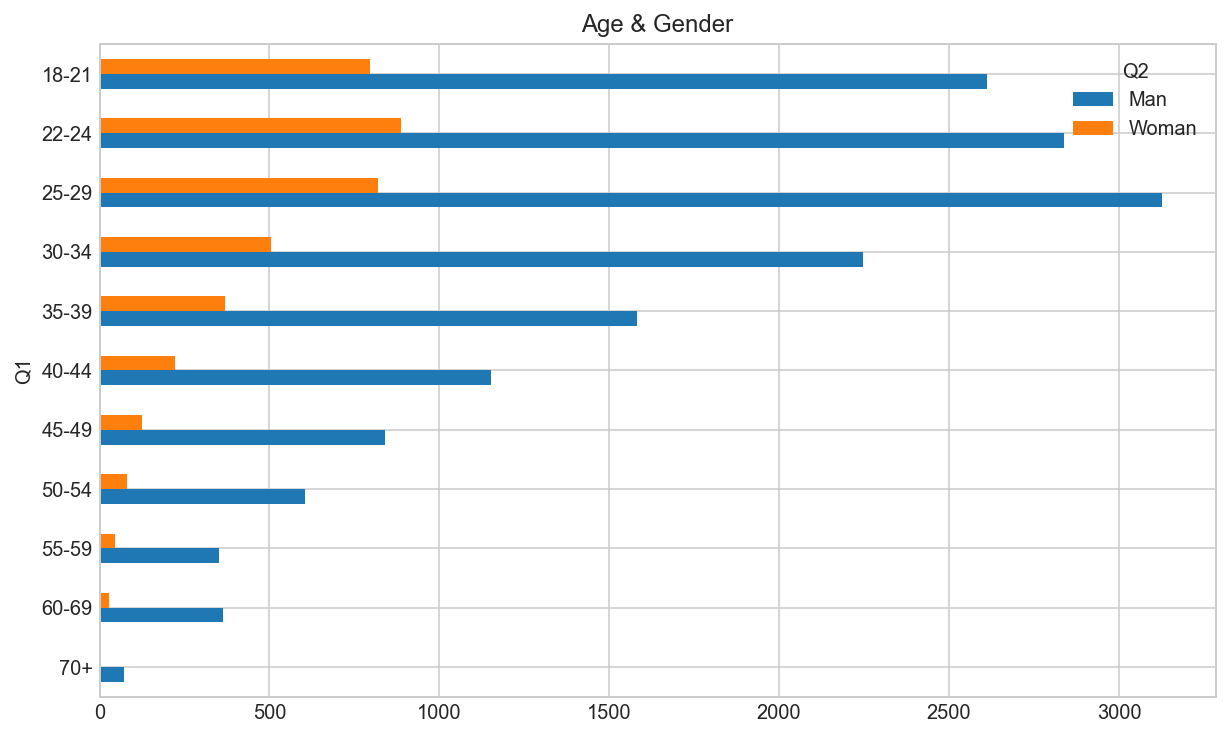

In [35]:
# 연령대가 낮은순에서 높은순으로 정렬 (인덱스 값으로 정렬하는데, 오름차순으로 정렬)
q1q2[['Man', 'Woman']].sort_index(ascending=False).plot.barh(figsize=(10, 6), title = 'Age & Gender')

#### Seaborn을 사용해서 시각화

<AxesSubplot:xlabel='Q1', ylabel='count'>

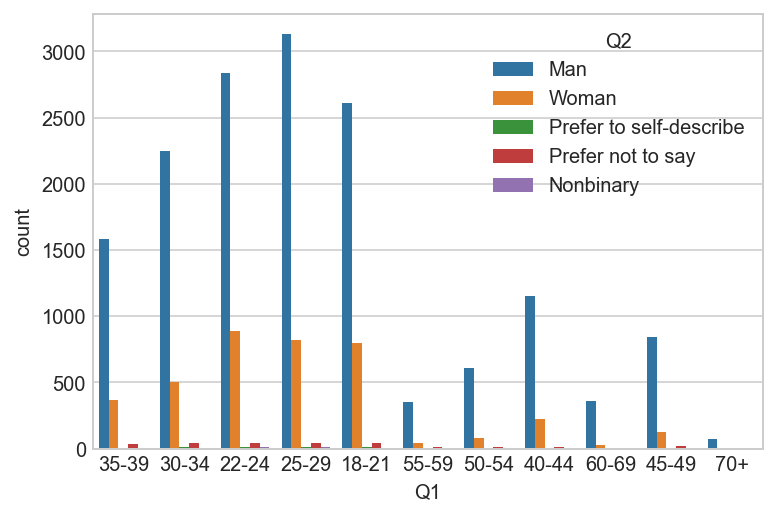

In [36]:
sns.countplot(data=answer,x='Q1', 
              hue='Q2')  # Q2에 따라 색상을 다르게 표시

Text(0.5, 1.0, 'Age & Gender')

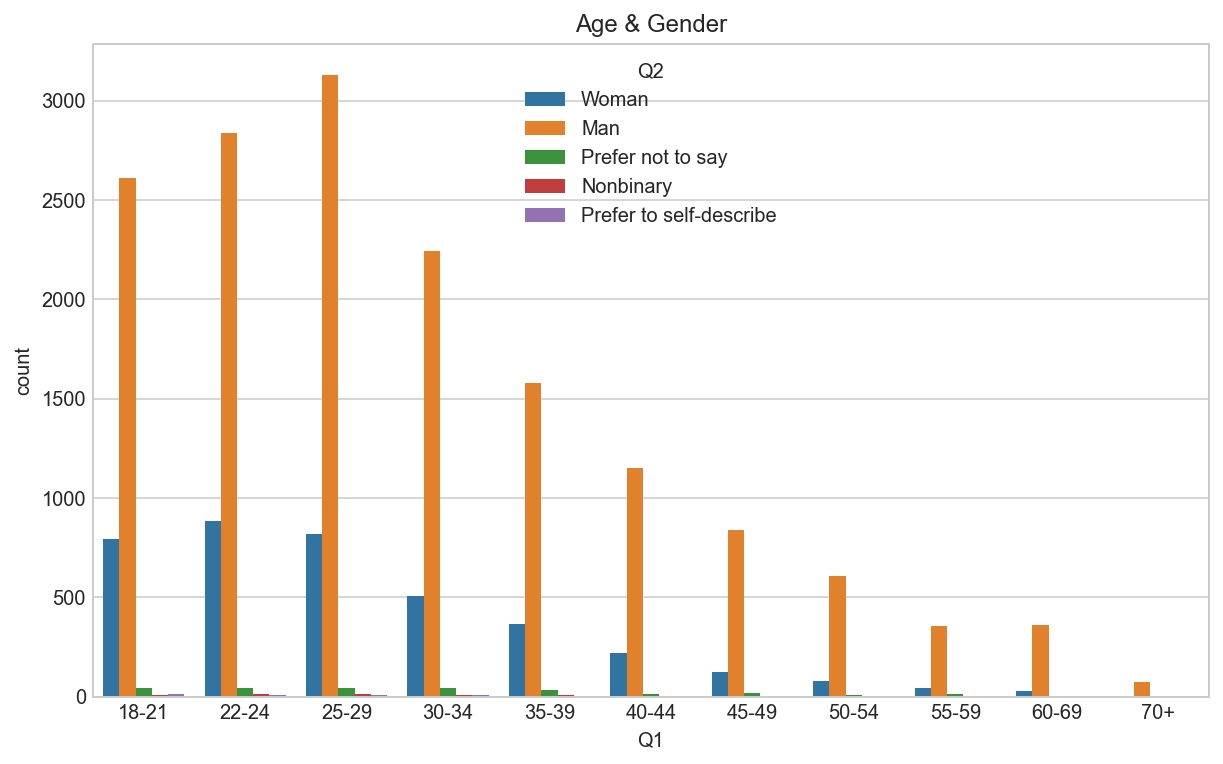

In [37]:
# 연령대가 낮은 순으로 정렬
plt.figure(figsize=(10, 6))
sns.countplot(data=answer.sort_values('Q1'),  # Q1을 기준으로 정렬
              x='Q1', 
              hue='Q2').set_title('Age & Gender')

## Q3 In which country do you currently reside?

### countplot 그리는 함수를 만들어서 반복작업 줄이기

In [38]:
answer

Time from Start to Finish (seconds)     Q1     Q2  \
1                                    1838  35-39    Man   
2                                  289287  30-34    Man   
3                                     860  35-39    Man   
4                                     507  30-34    Man   
5                                      78  30-34    Man   
...                                   ...    ...    ...   
20032                                 126  18-21    Man   
20033                                 566  55-59  Woman   
20034                                 238  30-34    Man   
20035                                 625  22-24    Man   
20036                                1031  22-24    Man   

                                                      Q3  \
1                                               Colombia   
2                               United States of America   
3                                              Argentina   
4                               United States of America   
5                                                  Japan   
...                                                  ...   
20032                                             Turkey   
20033  United Kingdom of Great Britain and Northern I...   
20034                                             Brazil   
20035                                              India   
20036                                           Pakistan   

                                                      Q4  \
1                                        Doctoral degree   
2                                        Master’s degree   
3                                      Bachelor’s degree   
4                                        Master’s degree   
5                                        Master’s degree   
...                                                  ...   
20032  Some college/university study without earning ...   
20033                                    Master’s degree   
20034                                    Master’s degree   
20035                                  Bachelor’s degree   
20036                                    Master’s degree   

                              Q5           Q6 Q7_Part_1 Q7_Part_2 Q7_Part_3  \
1                        Student   5-10 years    Python         R       SQL   
2                  Data Engineer   5-10 years    Python         R       SQL   
3              Software Engineer  10-20 years       NaN       NaN       NaN   
4                 Data Scientist   5-10 years    Python       NaN       SQL   
5              Software Engineer    3-5 years    Python       NaN       NaN   
...                          ...          ...       ...       ...       ...   
20032                        NaN          NaN       NaN       NaN       NaN   
20033     Currently not employed    20+ years    Python       NaN       NaN   
20034         Research Scientist    < 1 years    Python       NaN       NaN   
20035          Software Engineer    3-5 years    Python       NaN       SQL   
20036  Machine Learning Engineer    < 1 years    Python       NaN       NaN   

       ...        Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4   Q35_B_Part_5  \
1      ...                 NaN          NaN          NaN   TensorBoard    
2      ...                 NaN          NaN          NaN            NaN   
3      ...                 NaN          NaN          NaN            NaN   
4      ...                 NaN          NaN          NaN            NaN   
5      ...                 NaN          NaN          NaN            NaN   
...    ...                 ...          ...          ...            ...   
20032  ...                 NaN          NaN          NaN            NaN   
20033  ...                 NaN          NaN          NaN            NaN   
20034  ...                 NaN          NaN          NaN            NaN   
20035  ...   Weights & Biases           NaN          NaN   TensorBoard    
20036  ...   Weights & Biases           NaN          NaN            NaN   

     

### 📊define show_countplot_by_qno

#### 1. countplot 그리기
질문 번호를 qno라는 변수로 받아서 반복작업 줄이기

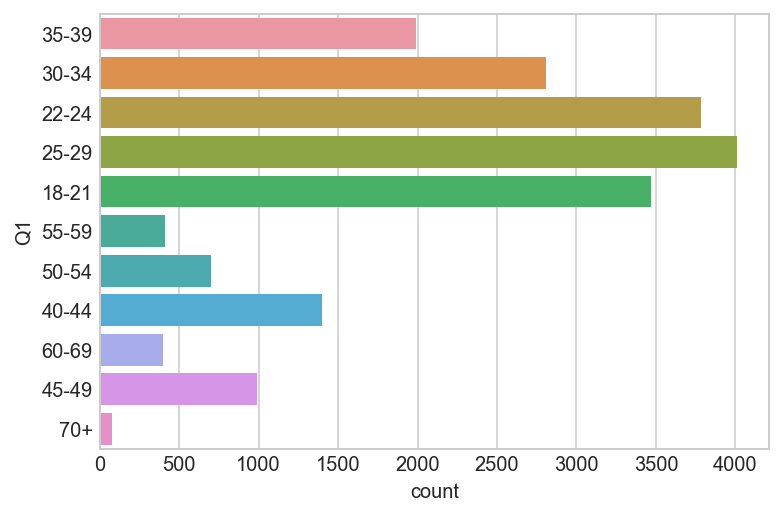

In [39]:
def show_countplot_by_qno(qno):
    sns.countplot(data=answer, y=qno)

show_countplot_by_qno("Q1")

In [40]:
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

#### 2. 질문의 내용으로 title 설정하기

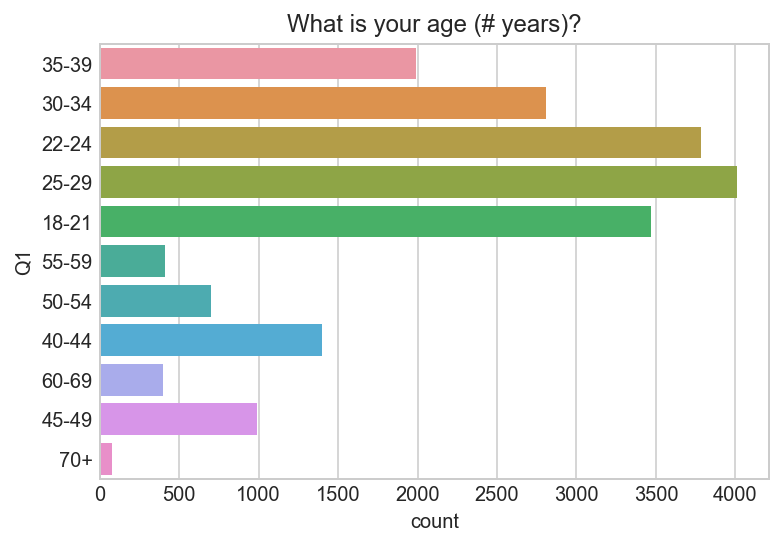

In [41]:
def show_countplot_by_qno(qno):
    sns.countplot(data=answer, y=qno).set_title(question[qno])  # 타이틀 옵션 추가

show_countplot_by_qno("Q1")

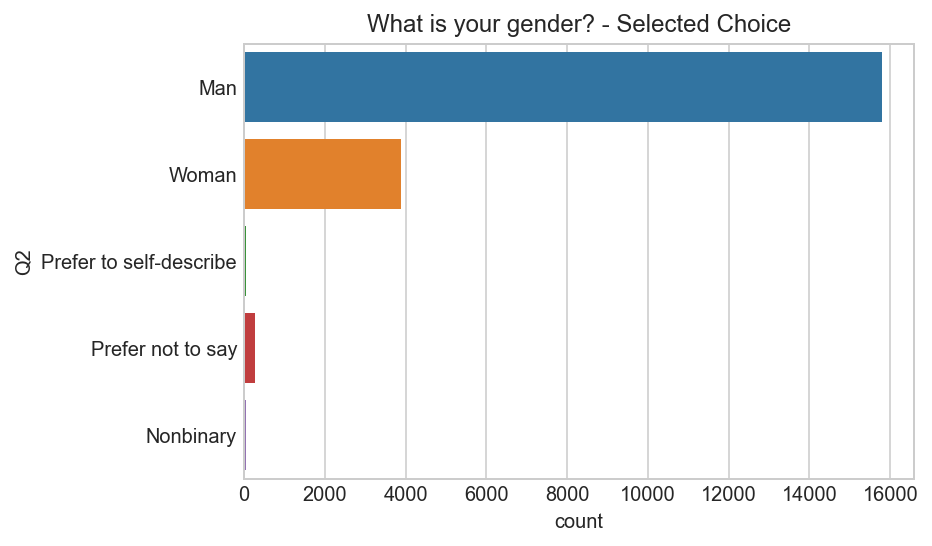

In [42]:
show_countplot_by_qno("Q2")

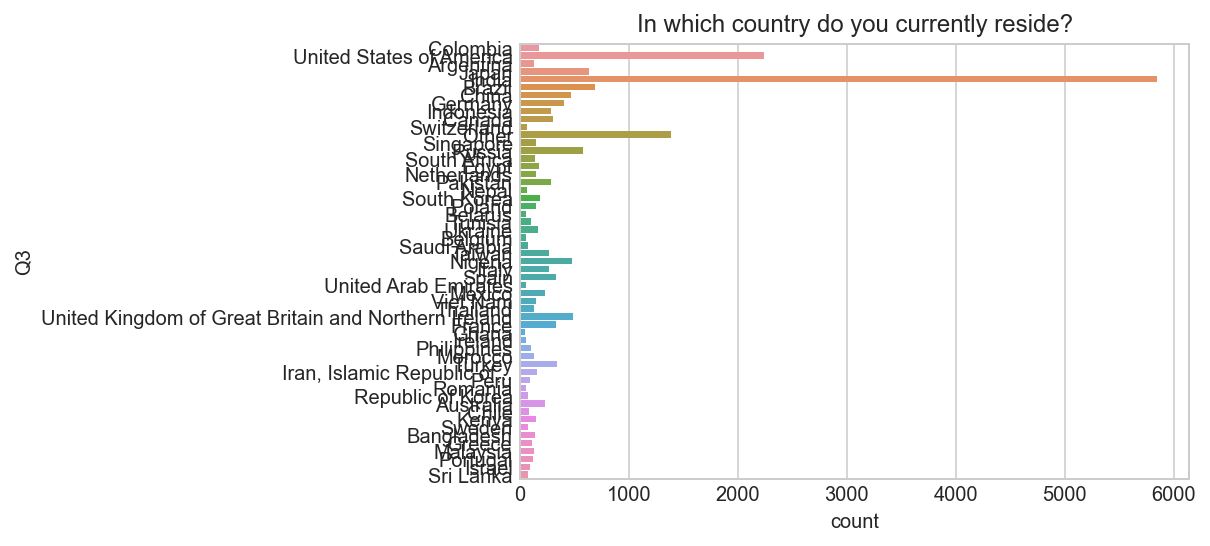

In [43]:
show_countplot_by_qno("Q3")

#### 3. 그래프 사이즈를 설정할 수 있는 변수 추가하기

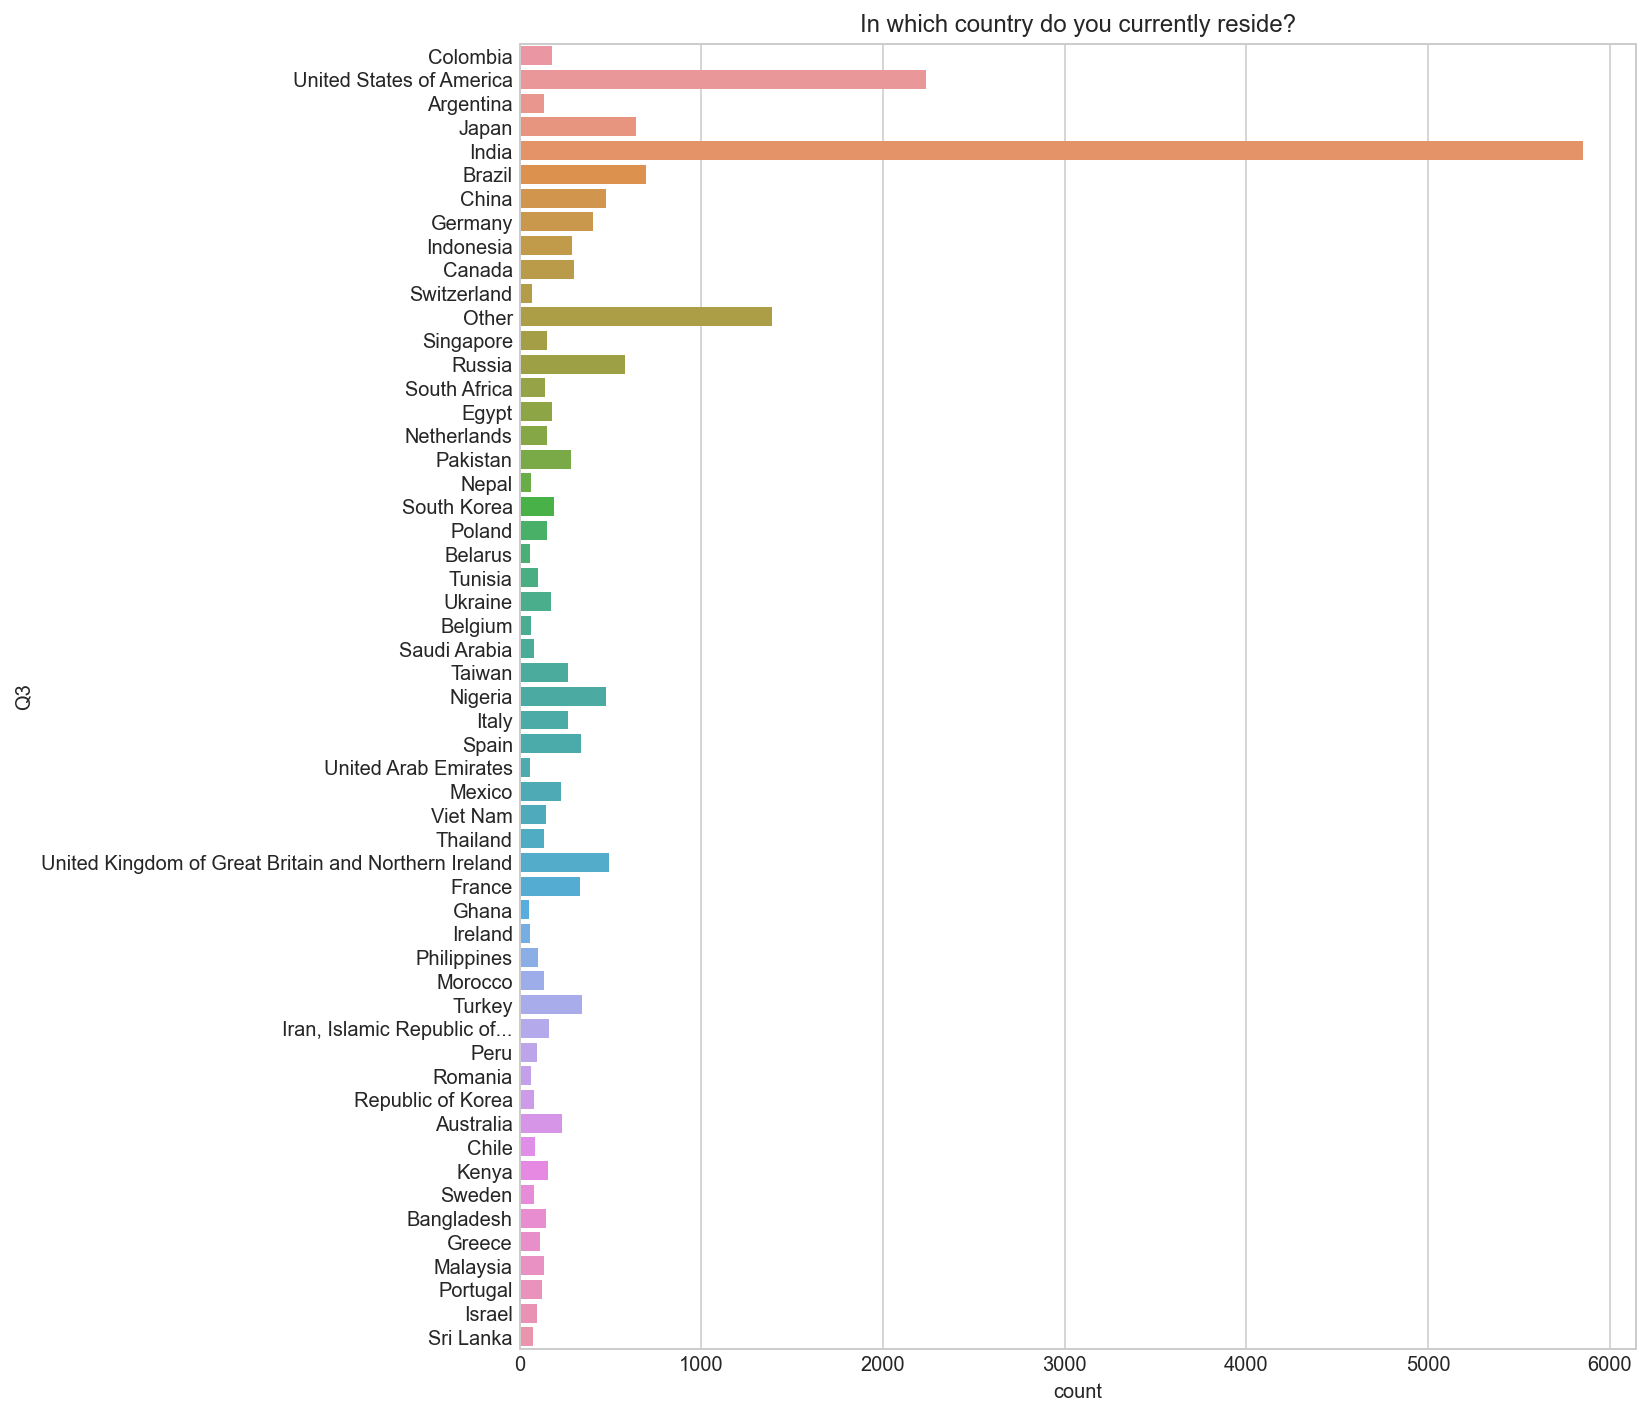

In [44]:
def show_countplot_by_qno(qno, fsize=(10, 6)): # 그래프 사이즈 기본값 추가
    plt.figure(figsize=fsize)                  
    sns.countplot(data=answer, y=qno).set_title(question[qno]) 

show_countplot_by_qno("Q3", fsize=(10, 12))    # 그래프 사이즈 설정할 수 있는 변수 추가

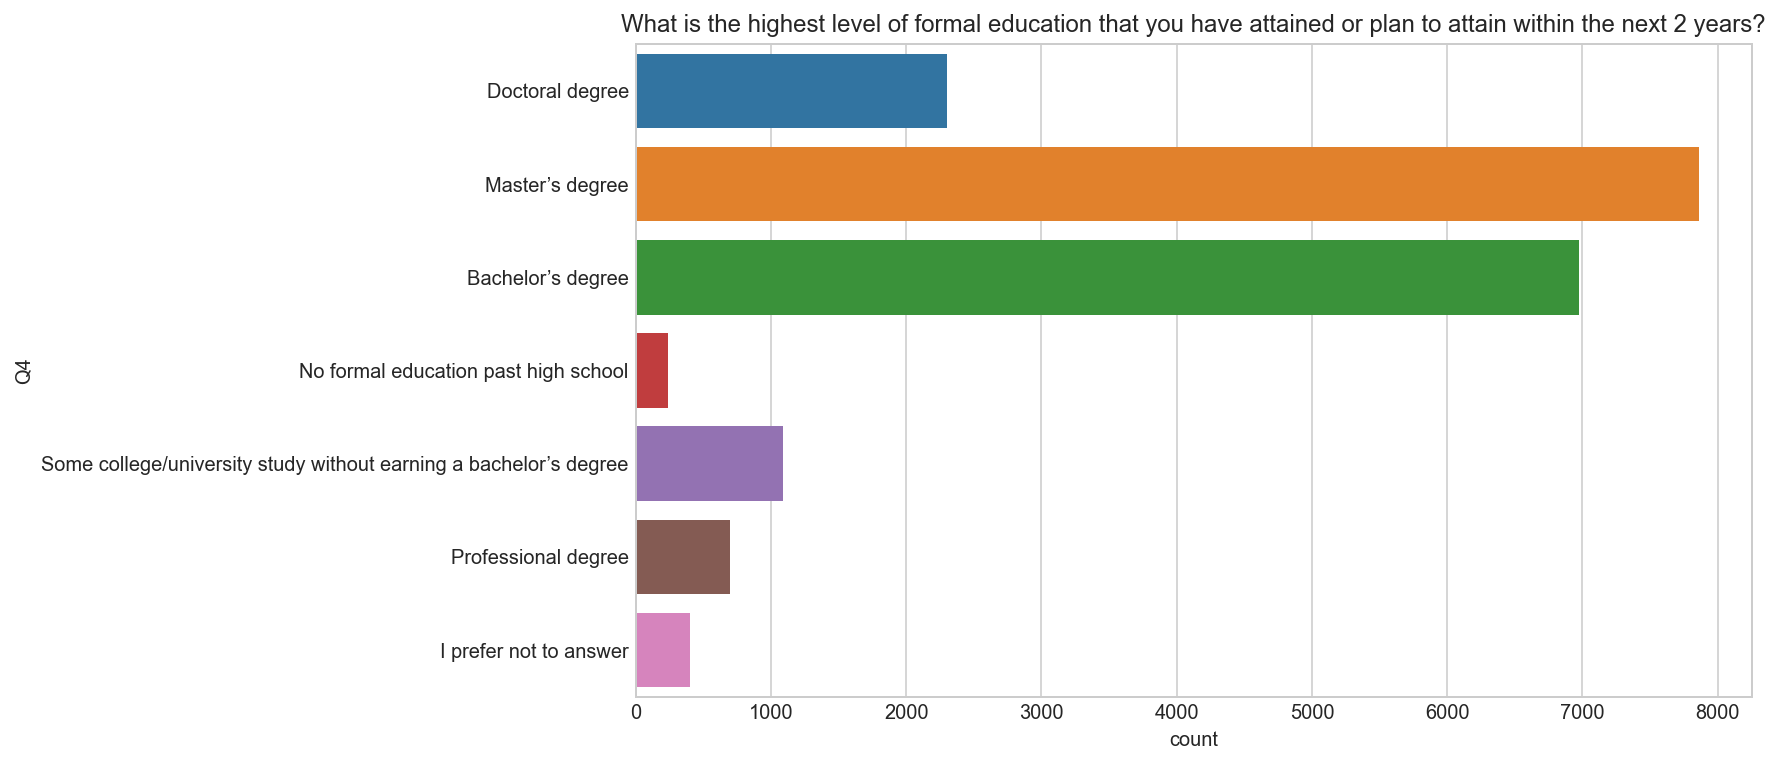

In [45]:
show_countplot_by_qno("Q4")

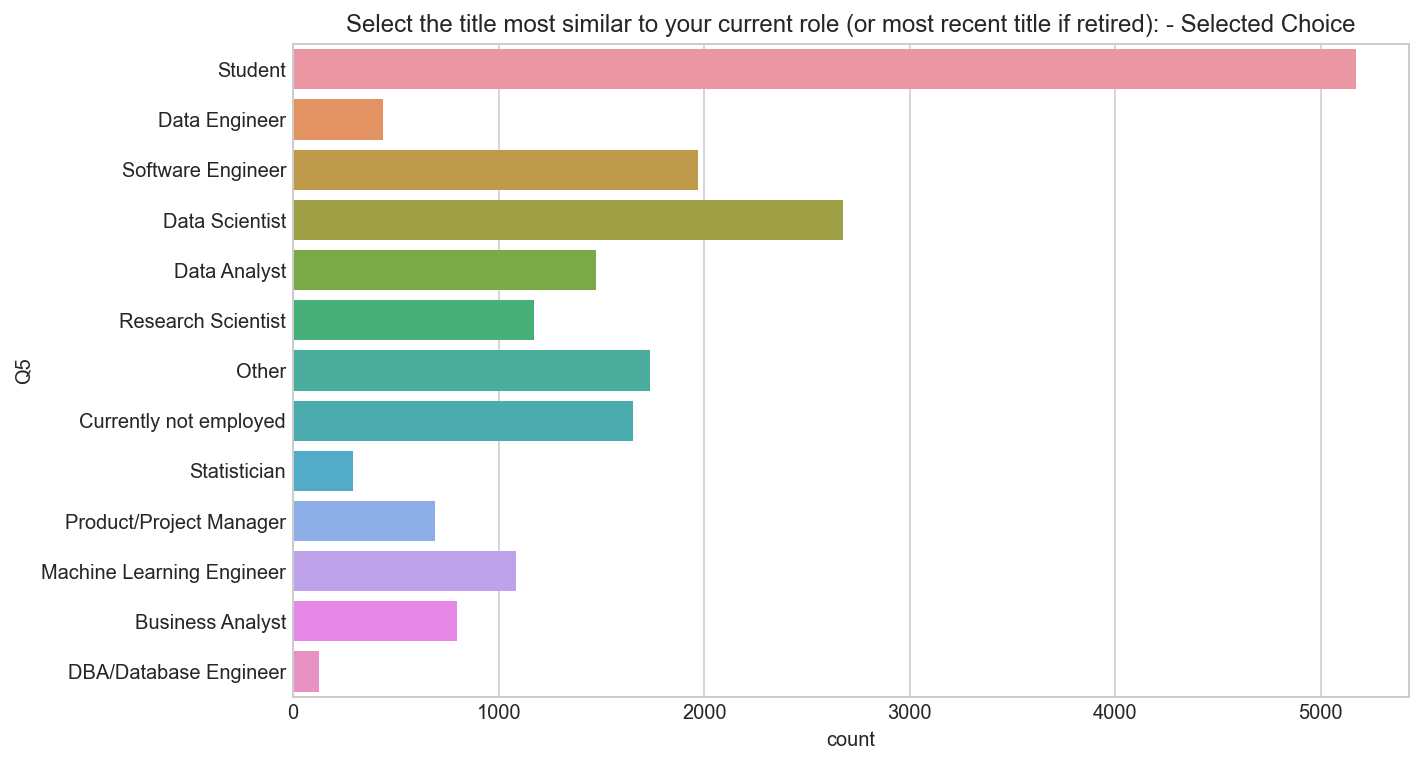

In [46]:
show_countplot_by_qno("Q5")

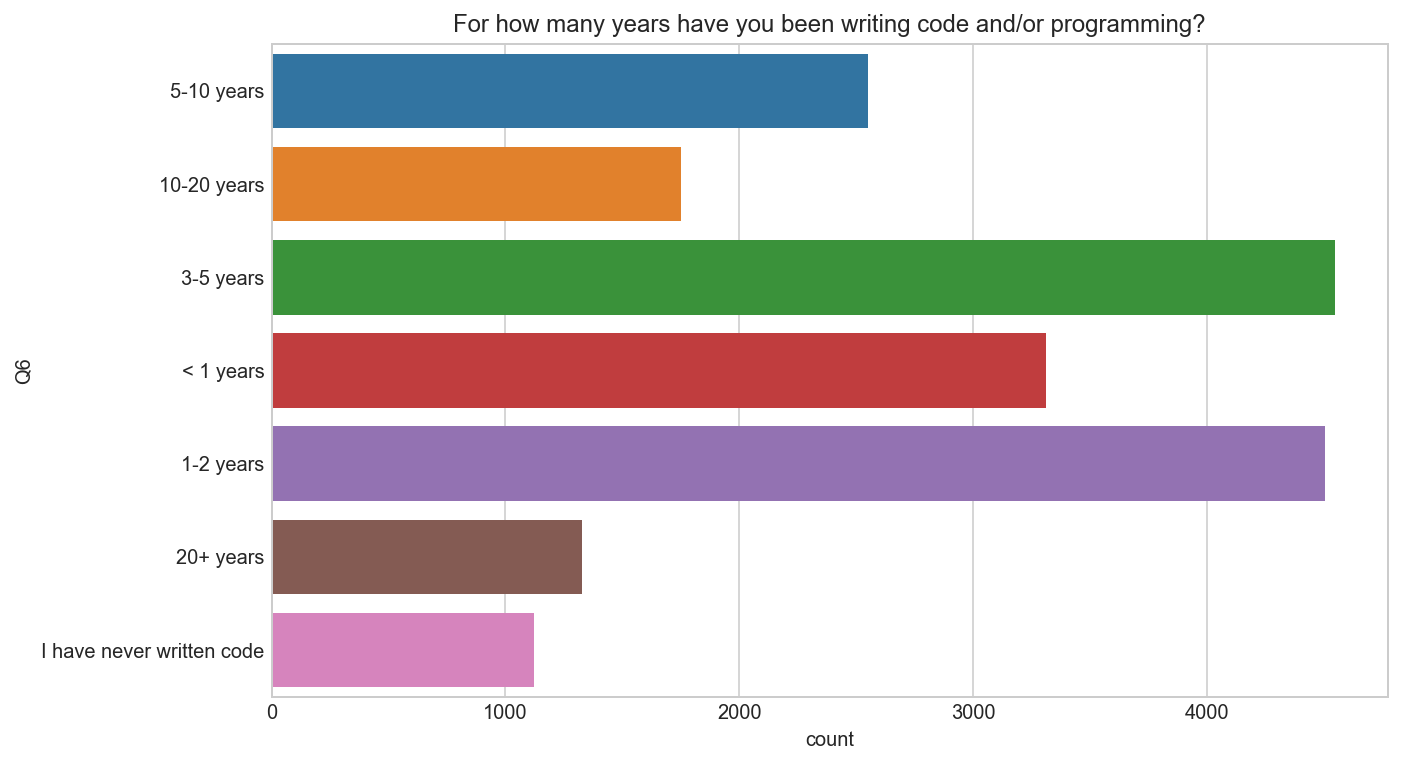

In [47]:
show_countplot_by_qno("Q6")

#### 4. 데이터를 정렬하는 변수 추가

In [48]:
answer['Q1'].value_counts()   # 대답의 "빈도가 높은 순"으로 "빈도수" 확인

25-29    4011
22-24    3786
18-21    3469
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

In [49]:
answer['Q1'].value_counts().index   # 대답의 "빈도가 높은 순"으로 "인덱스" 확인

Index(['25-29', '22-24', '18-21', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-69', '70+'],
      dtype='object')

In [50]:
answer['Q1'].value_counts().sort_index()   # 대답의 "인덱스 값 순으로" "빈도수" 확인

18-21    3469
22-24    3786
25-29    4011
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

In [51]:
answer['Q1'].value_counts().sort_index().index   # 대답의 "인덱스 값 순으로" "인덱스" 확인

Index(['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-69', '70+'],
      dtype='object')

In [52]:
# Q1 대답의 인덱스값을 리스트 형태로 저장
q1_cols = answer['Q1'].value_counts().sort_index().index.tolist()
q1_cols

['18-21',
 '22-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-69',
 '70+']

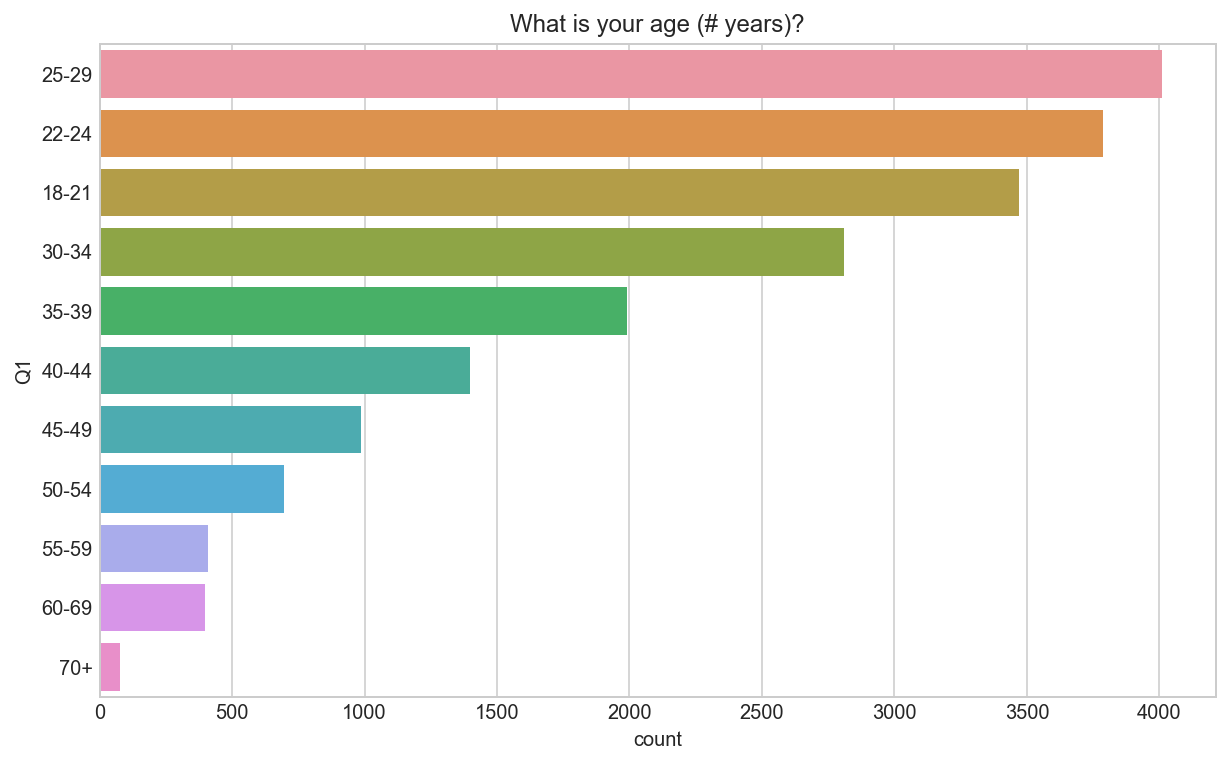

In [53]:
def show_countplot_by_qno(qno, fsize=(10, 6), order=None): # 데이터 정렬 기준(order) 변수 추가
     
    if not order:                                          # order 값을 따로 입력하지 않았다면,
        order = answer[qno].value_counts().index           # 빈도수가 높은 인덱스 순으로 정렬 (기본값)
        
    plt.figure(figsize=fsize)                  
    sns.countplot(data=answer, y=qno, 
                  order=order           
                 ).set_title(question[qno]) 

show_countplot_by_qno("Q1")

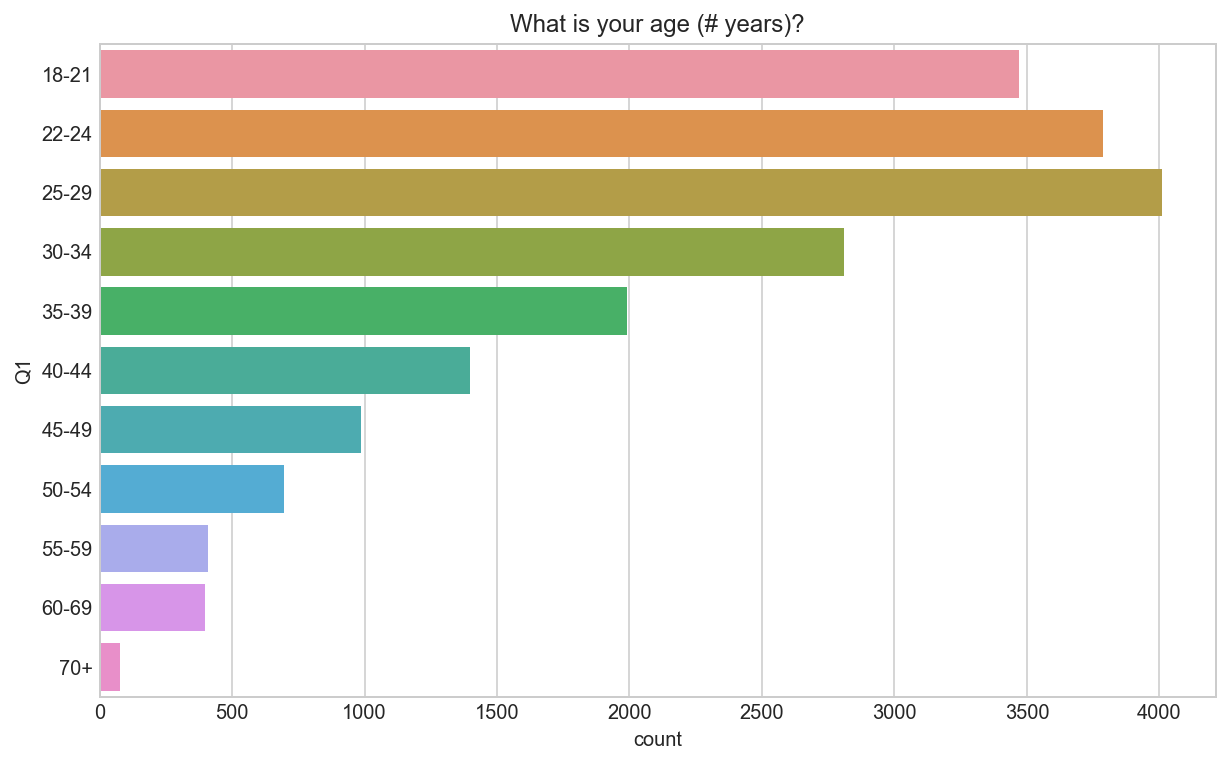

In [54]:
# 인덱스 순서대로 정렬
show_countplot_by_qno("Q1", order=q1_cols)

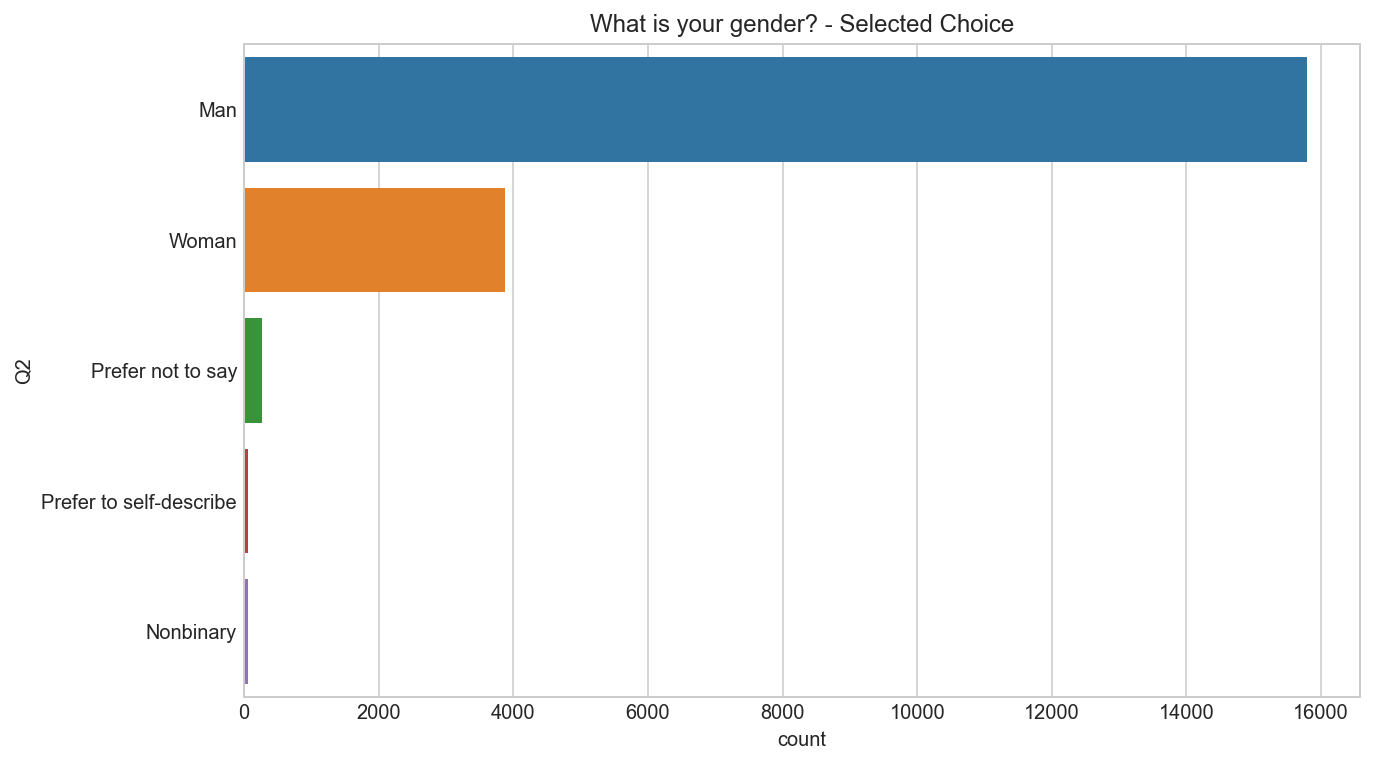

In [55]:
show_countplot_by_qno("Q2")

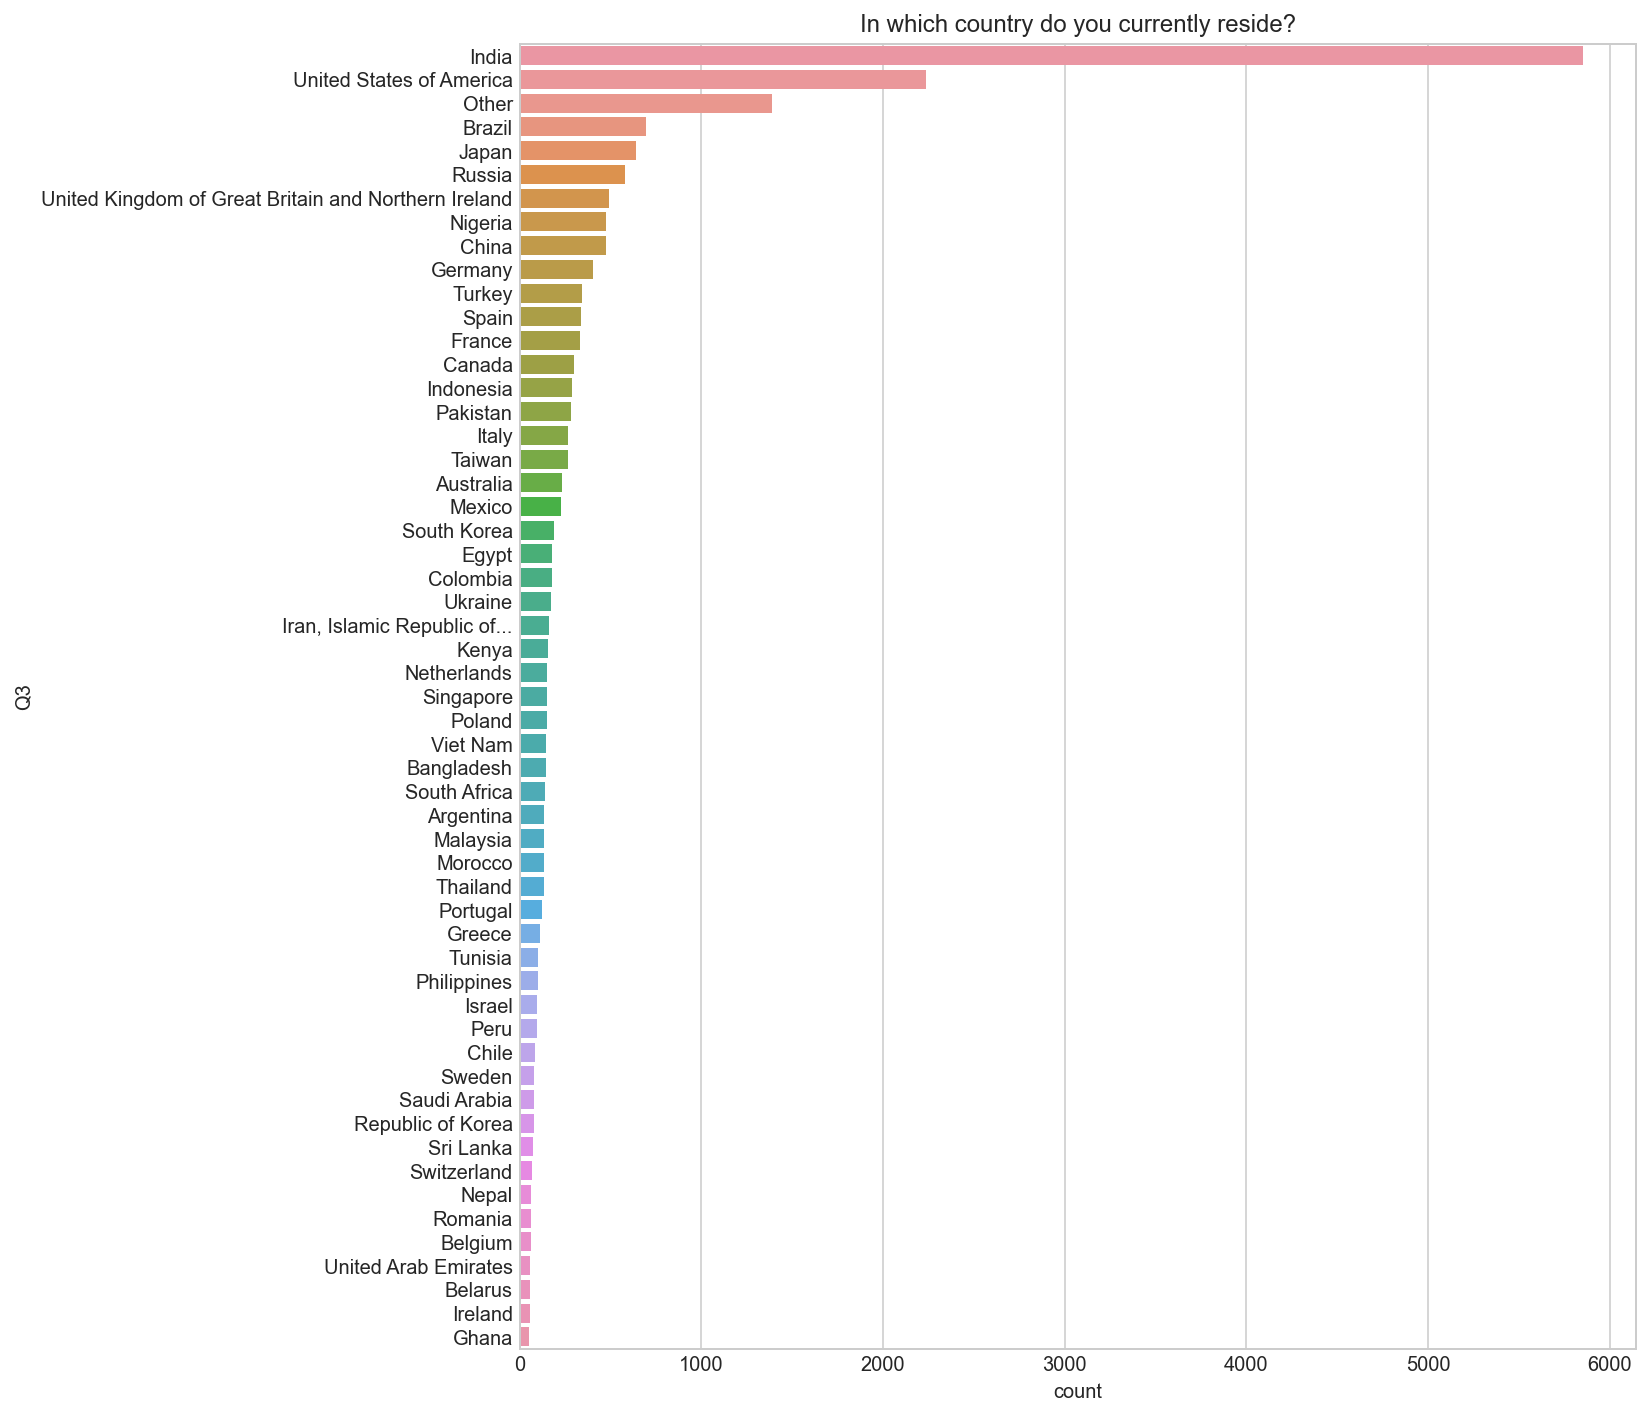

In [56]:
show_countplot_by_qno("Q3", fsize=(10, 12))

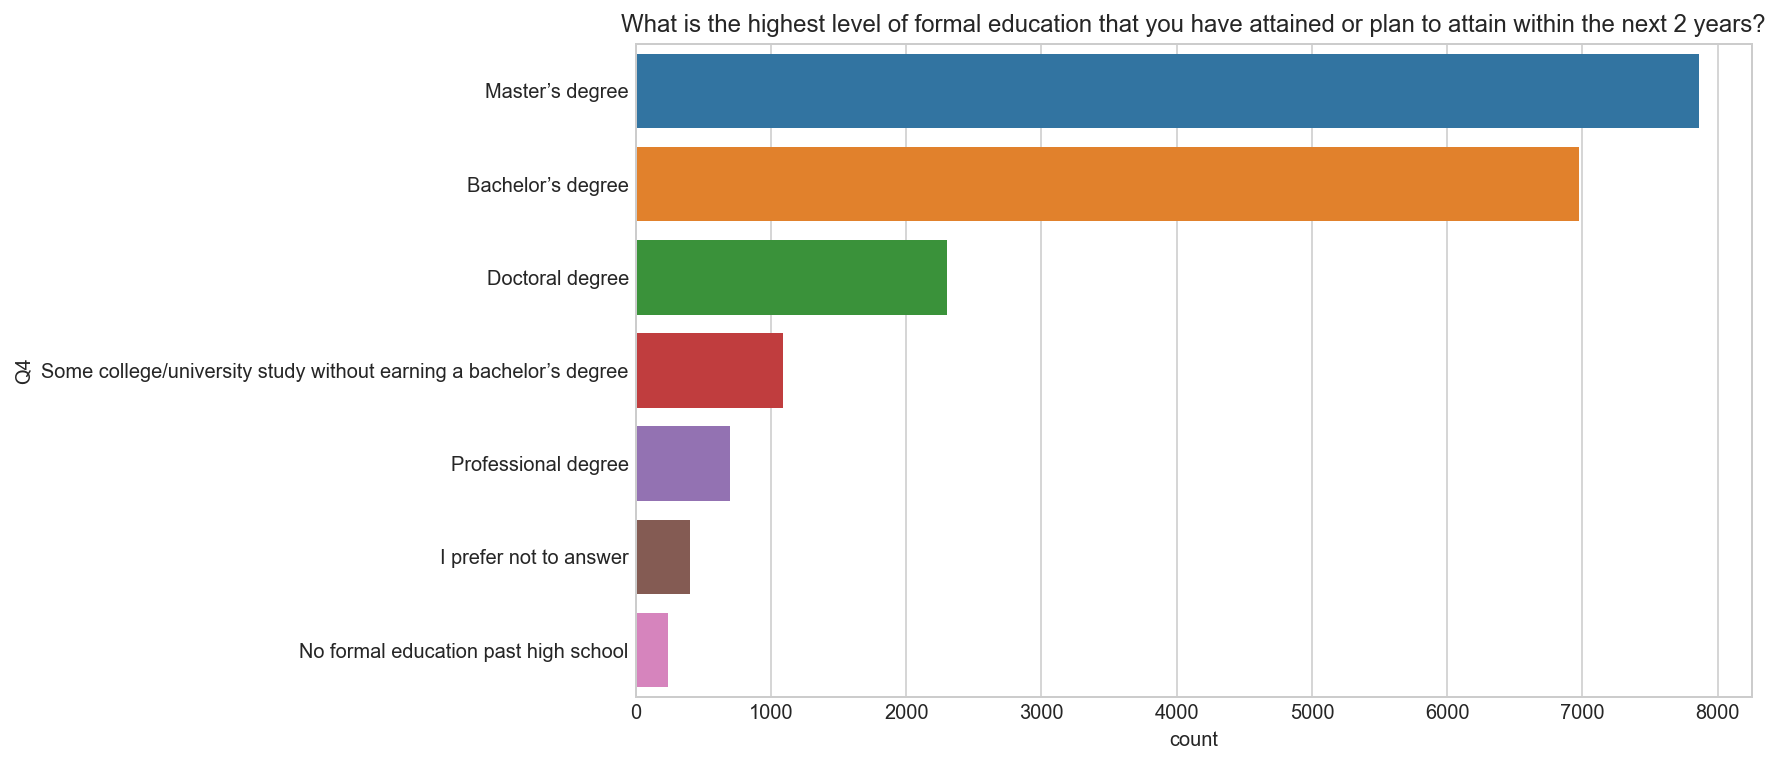

In [57]:
show_countplot_by_qno("Q4")

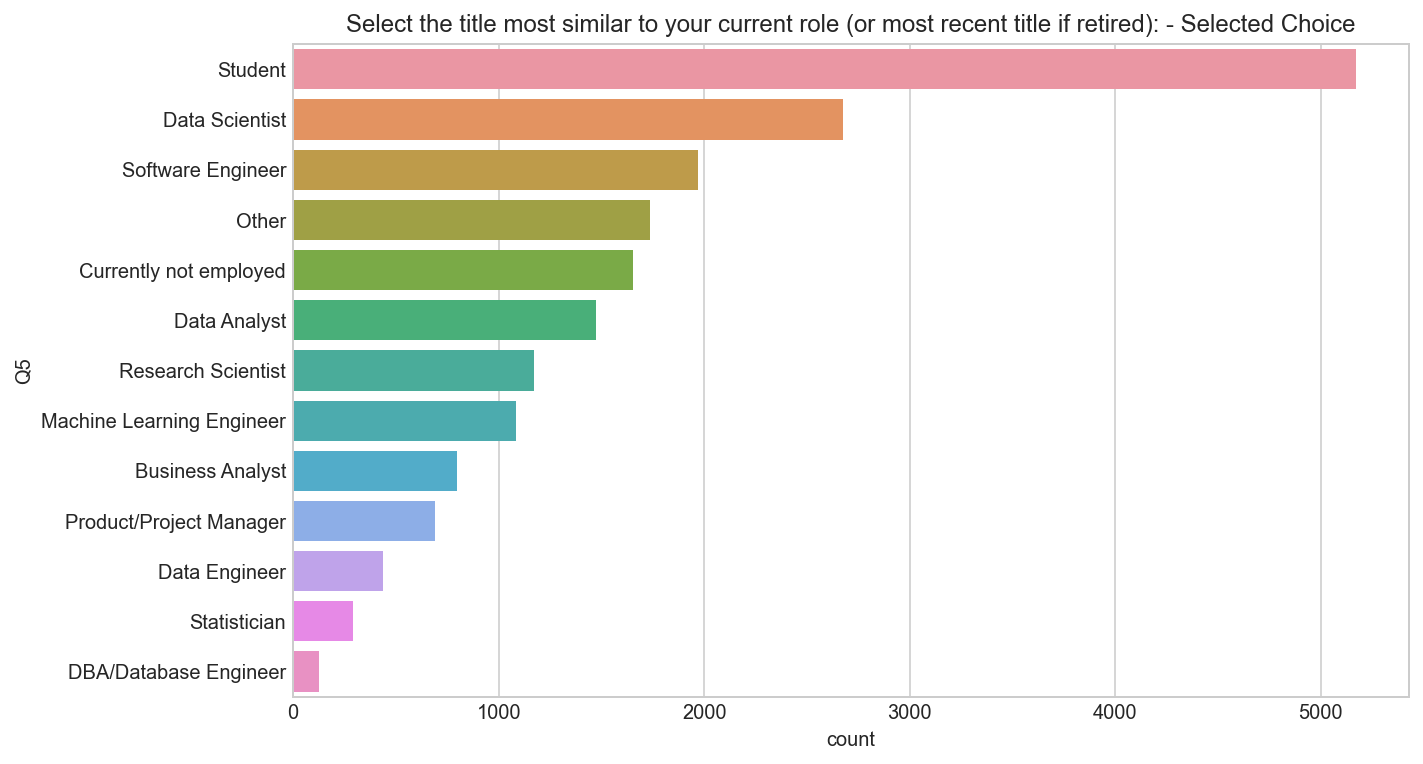

In [58]:
show_countplot_by_qno("Q5")

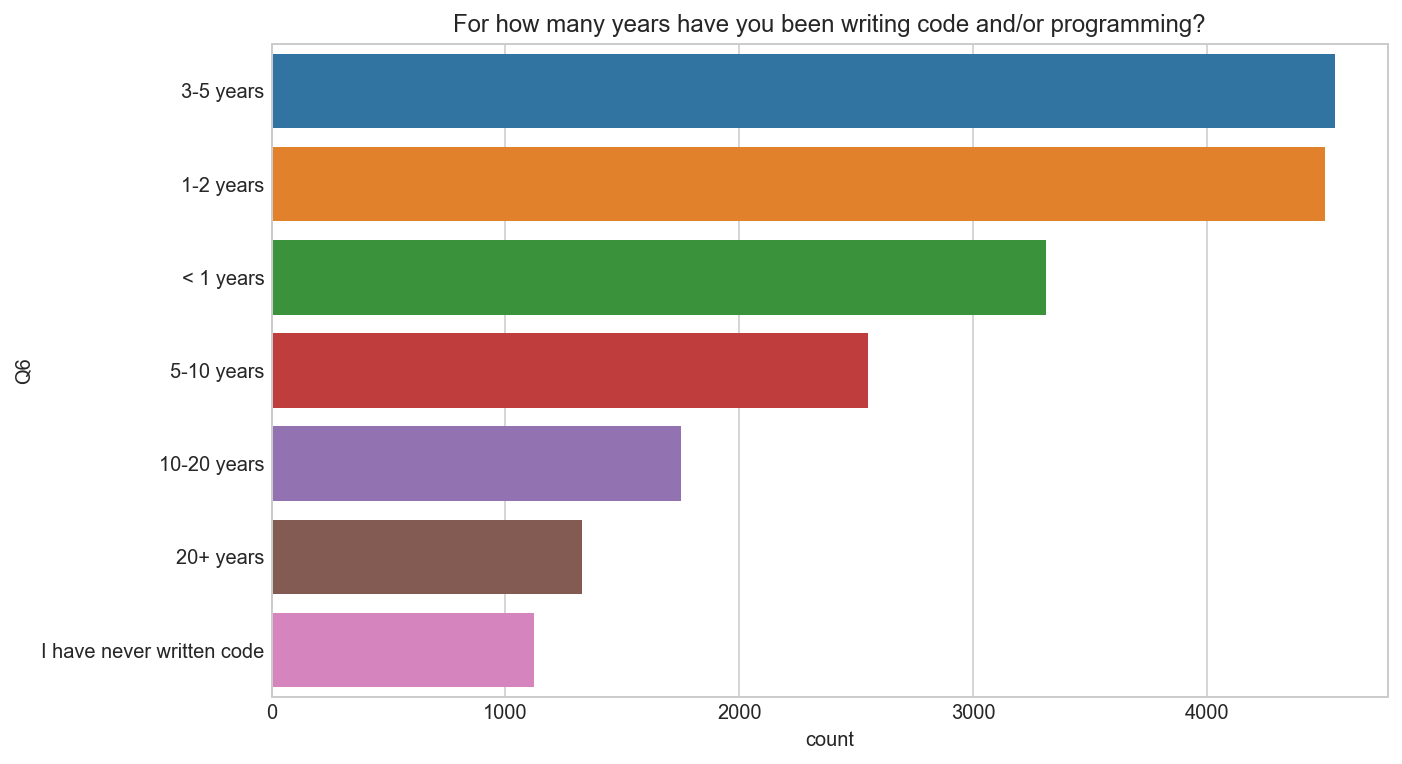

In [59]:
show_countplot_by_qno("Q6")

#### 5. palette 설정 추가

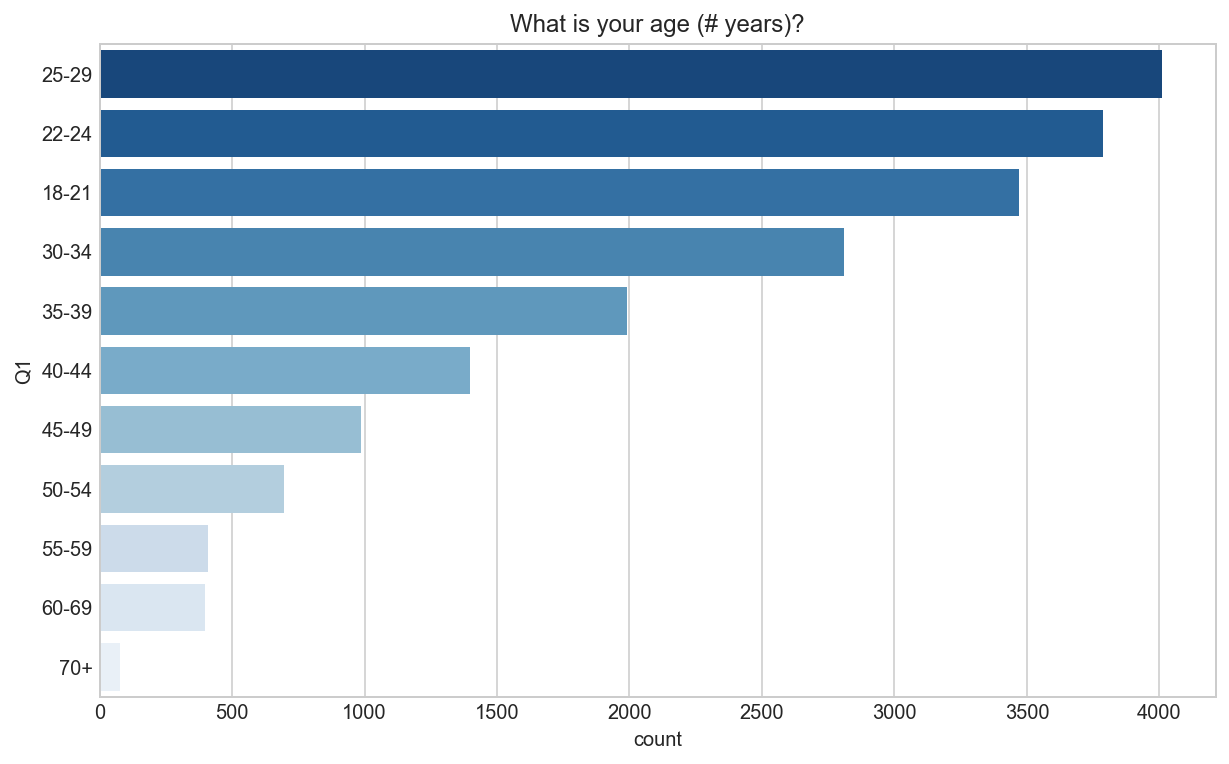

In [60]:
def show_countplot_by_qno(qno, fsize=(10, 6), order=None): 
     
    if not order:                                          
        order = answer[qno].value_counts().index           
        
    plt.figure(figsize=fsize)                  
    sns.countplot(data=answer, y=qno, 
                  order=order, palette="Blues_r"  # palette 설정을 진한 블루 -> 연한블루로 그라데이션 되도록 설장            
                 ).set_title(question[qno]) 

show_countplot_by_qno("Q1")

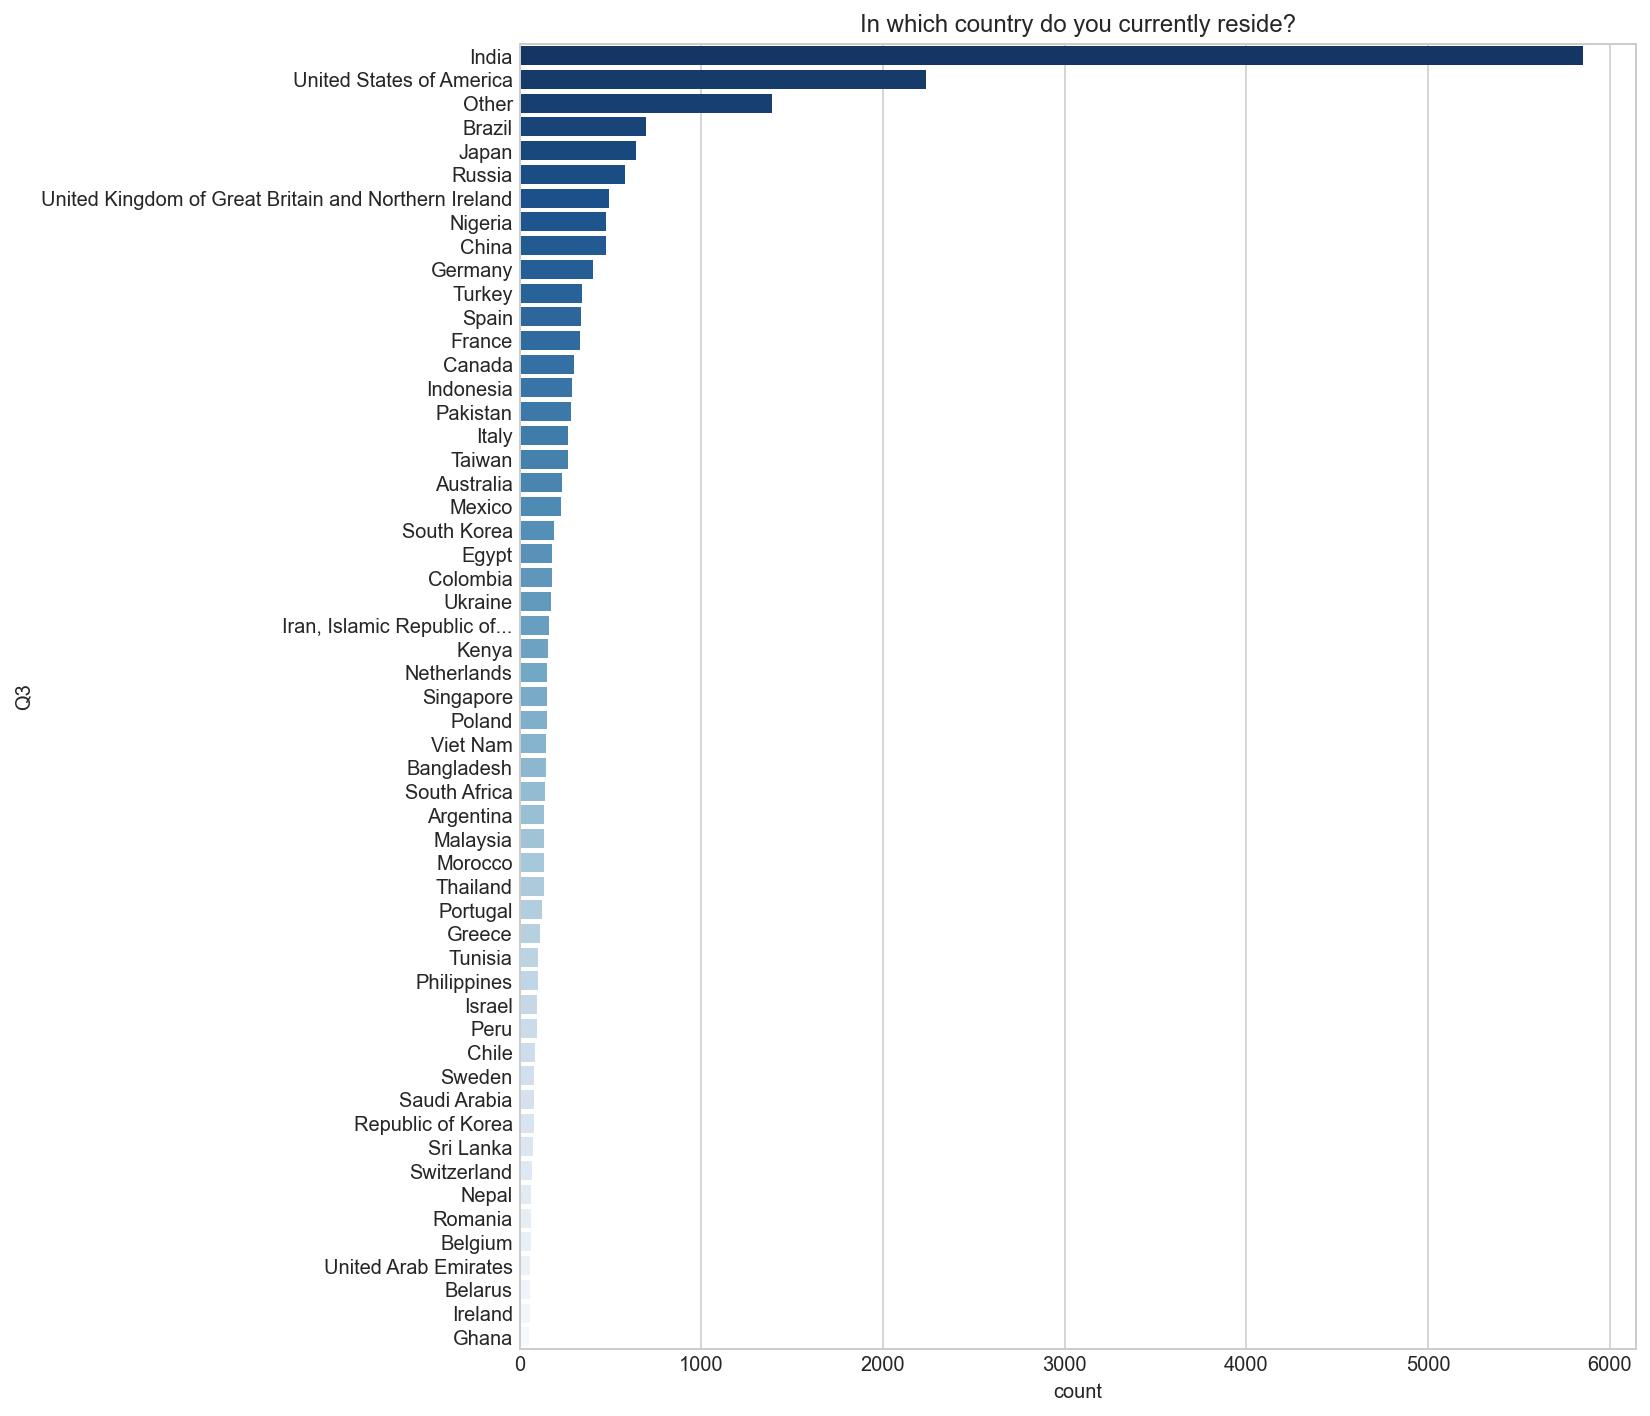

In [61]:
show_countplot_by_qno("Q3", fsize=(10, 12))

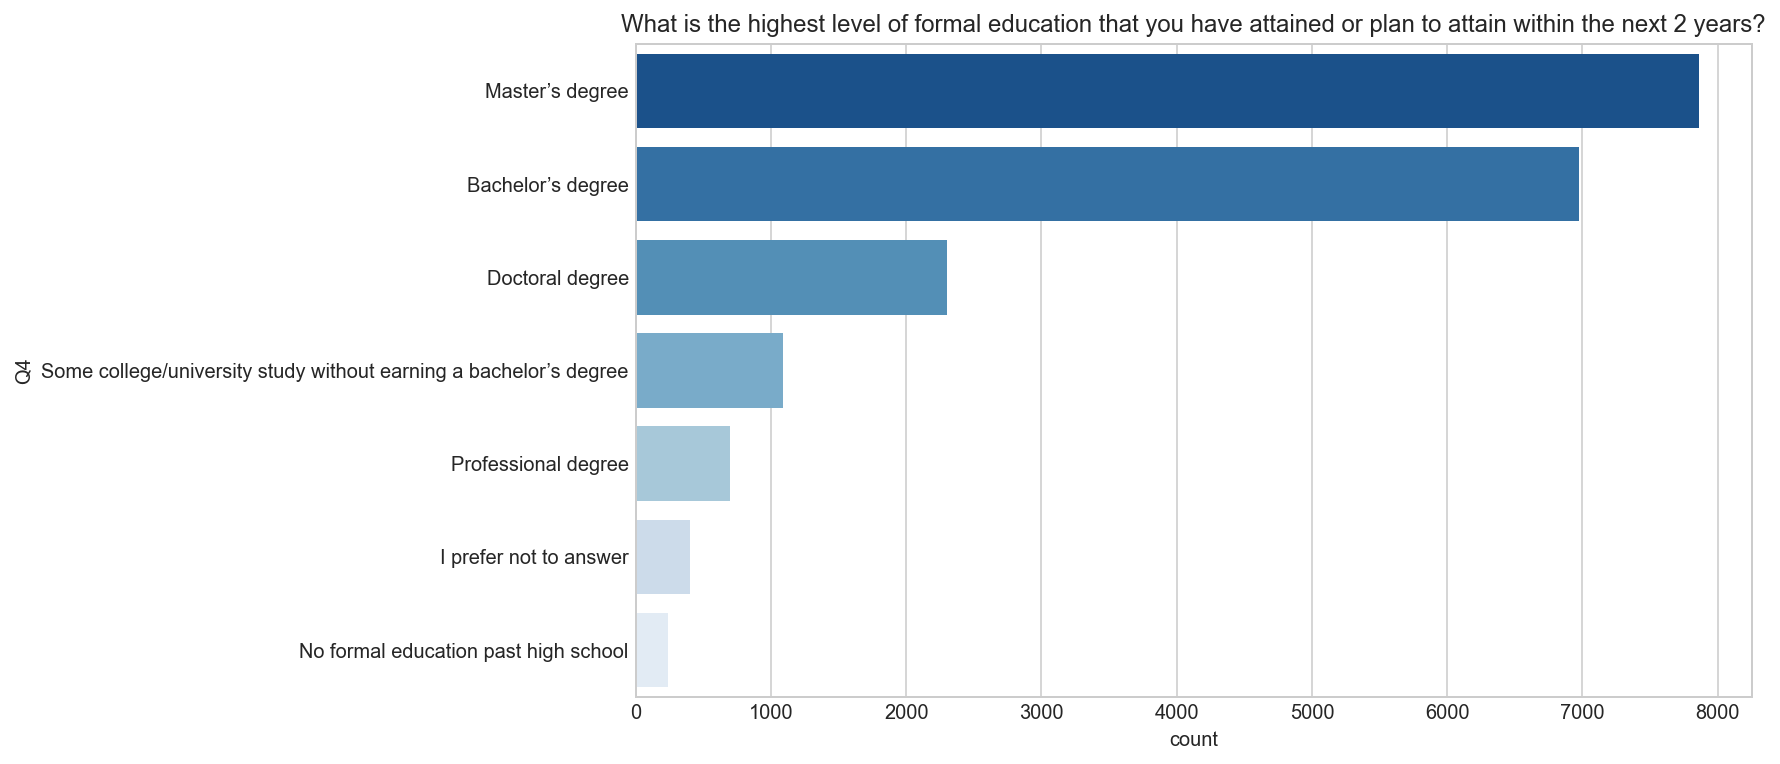

In [62]:
show_countplot_by_qno("Q4")

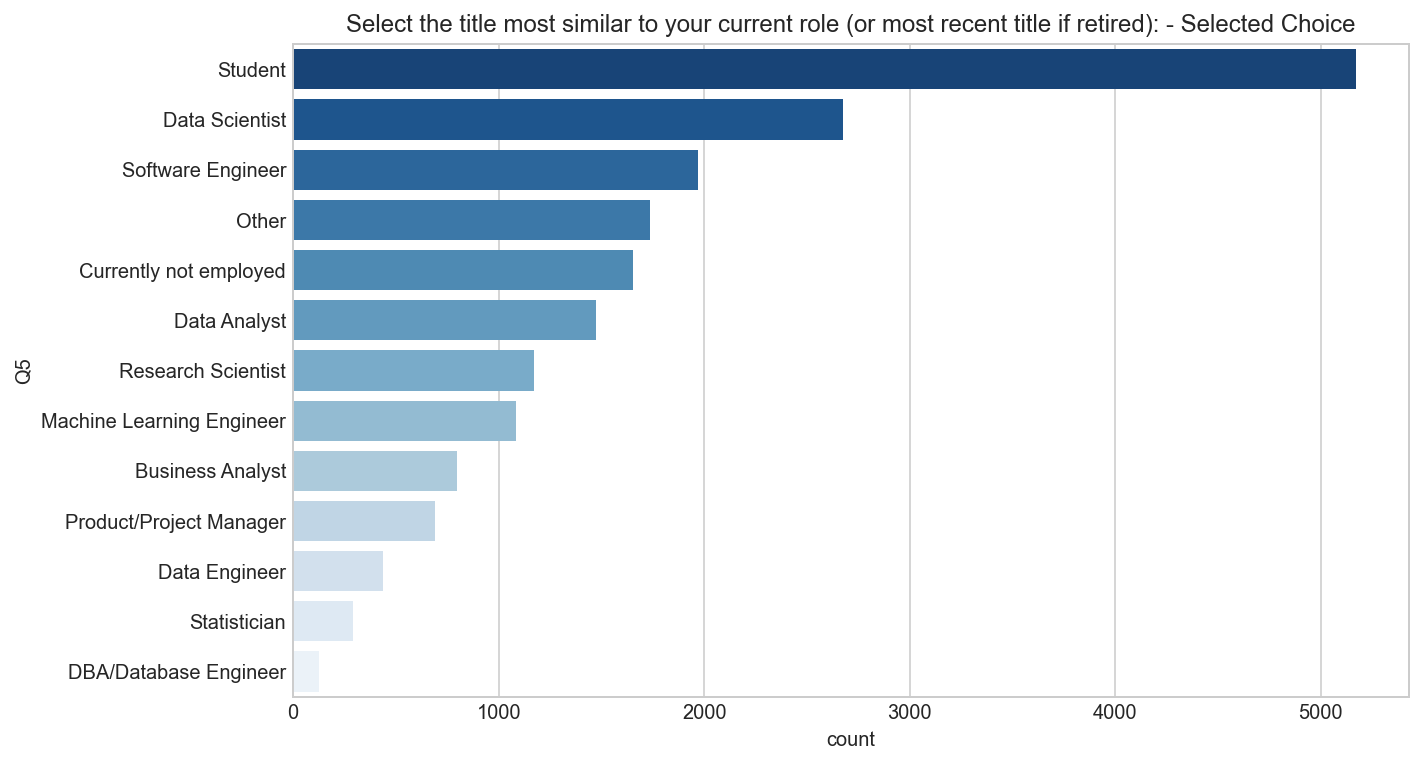

In [63]:
show_countplot_by_qno("Q5")

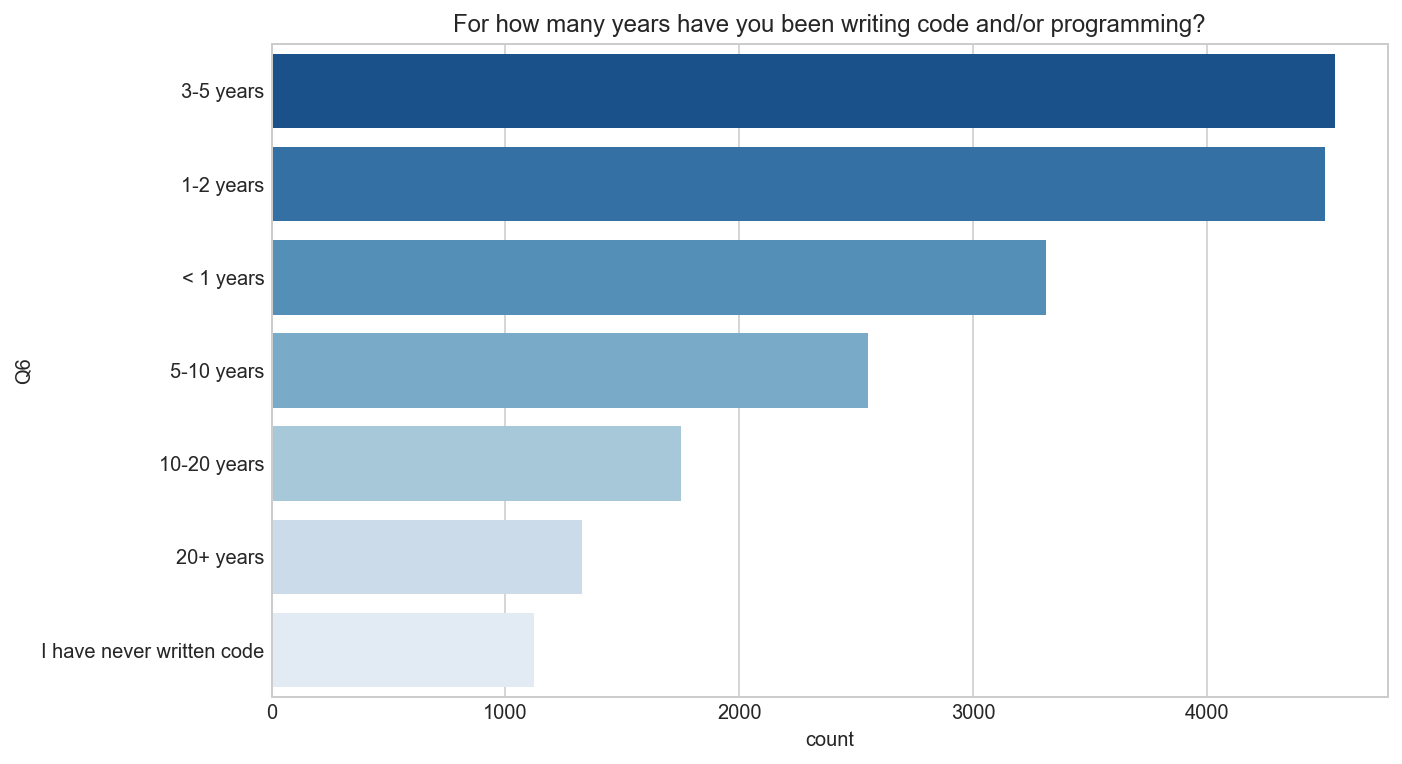

In [64]:
show_countplot_by_qno("Q6")

In [65]:
show_countplot_by_qno("Q7")  # 예외처리 필요

KeyError: 'Q7'

#### 5. 함수의 설명(Docstring) 추가

In [ ]:
def show_countplot_by_qno(qno, fsize=(10, 6), order=None):
    # Docstring 추가
    """
    qno : question no. ex) Q12
    fsize : figsize. default is (10,6)
    order : optional order list. default is `value_counts().index`
    """ 
    if not order:                                          
        order = answer[qno].value_counts().index           
        
    plt.figure(figsize=fsize)                  
    sns.countplot(data=answer, y=qno, 
                  order=order, palette="Blues_r"        
                 ).set_title(question[qno]) 

In [ ]:
# 함수의 사용법 확인
show_countplot_by_qno?

In [ ]:
# 함수의 소스코드 확인
show_countplot_by_qno??

In [ ]:
    show_countplot_by_qno("Q3", fsize=(12, 12))

## Q4 🎓 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

In [ ]:
show_countplot_by_qno("Q4")

## Q5 Select the title most similar to your current role (or most recent title if retired):

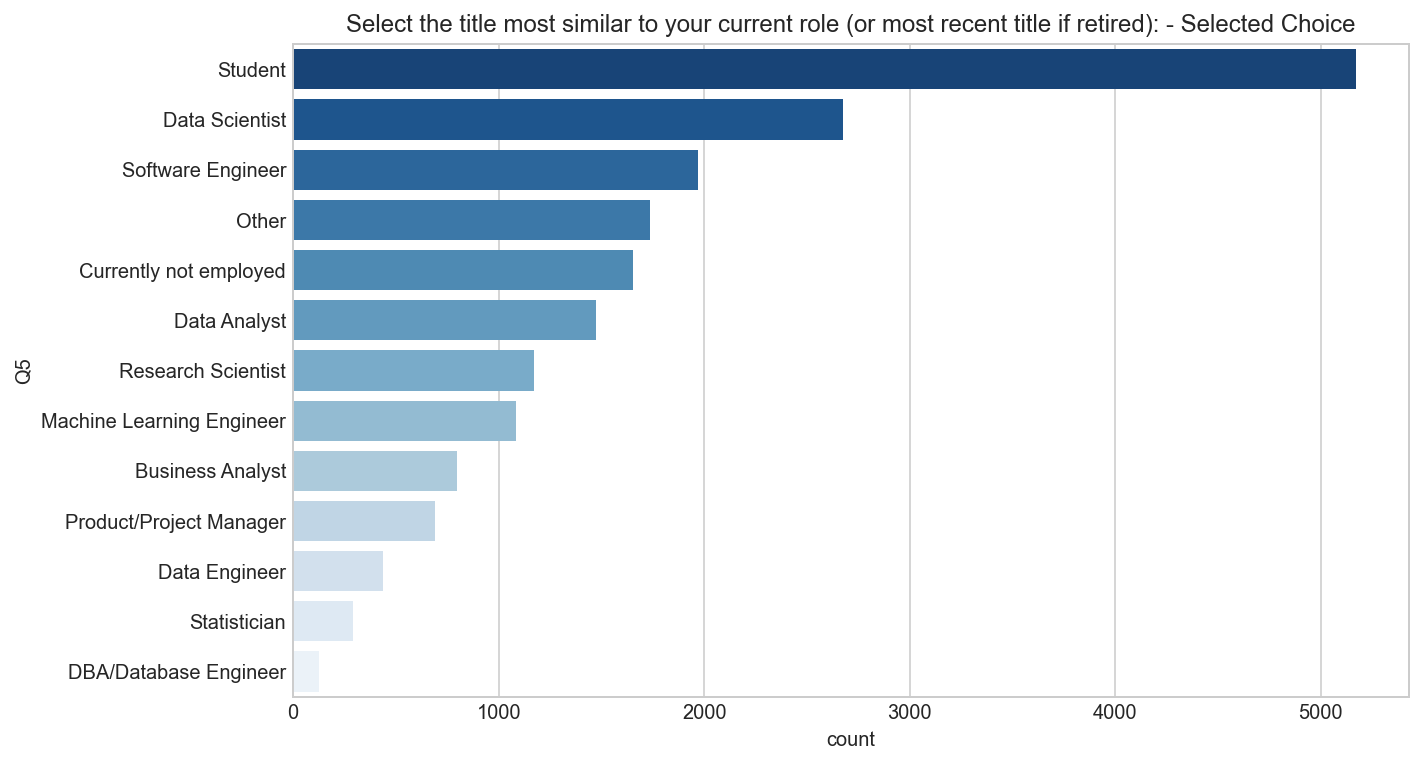

In [66]:
show_countplot_by_qno("Q5")

## Q6 For how many years have you been writing code and/or programming?

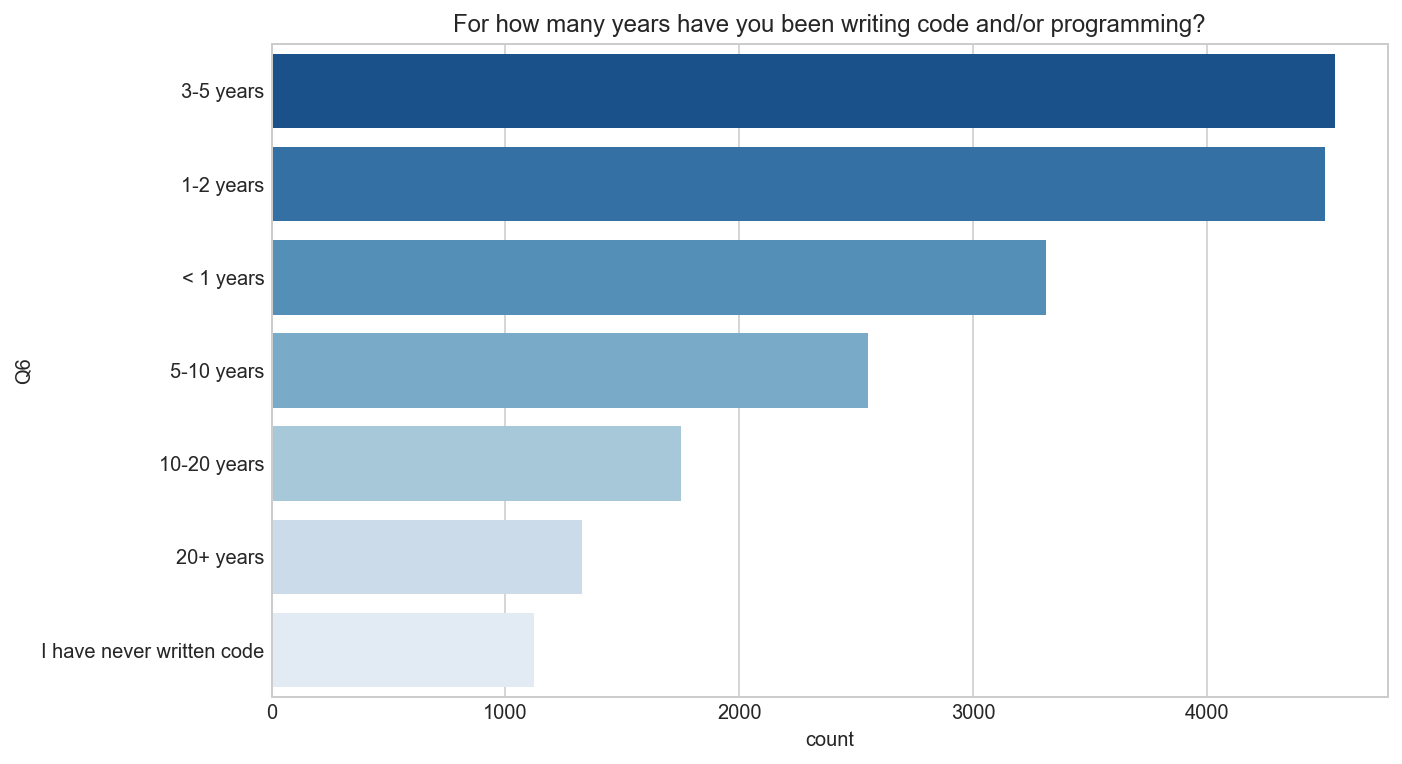

In [67]:
show_countplot_by_qno("Q6")

In [68]:
# Q6 대답의 빈도수를 빈도수 많은 순서가 아닌, 특정 순서대로 정렬하기 위해 order에 넣어줄 값 저장
q6_cols = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years',  
       '10-20 years', '20+ years']

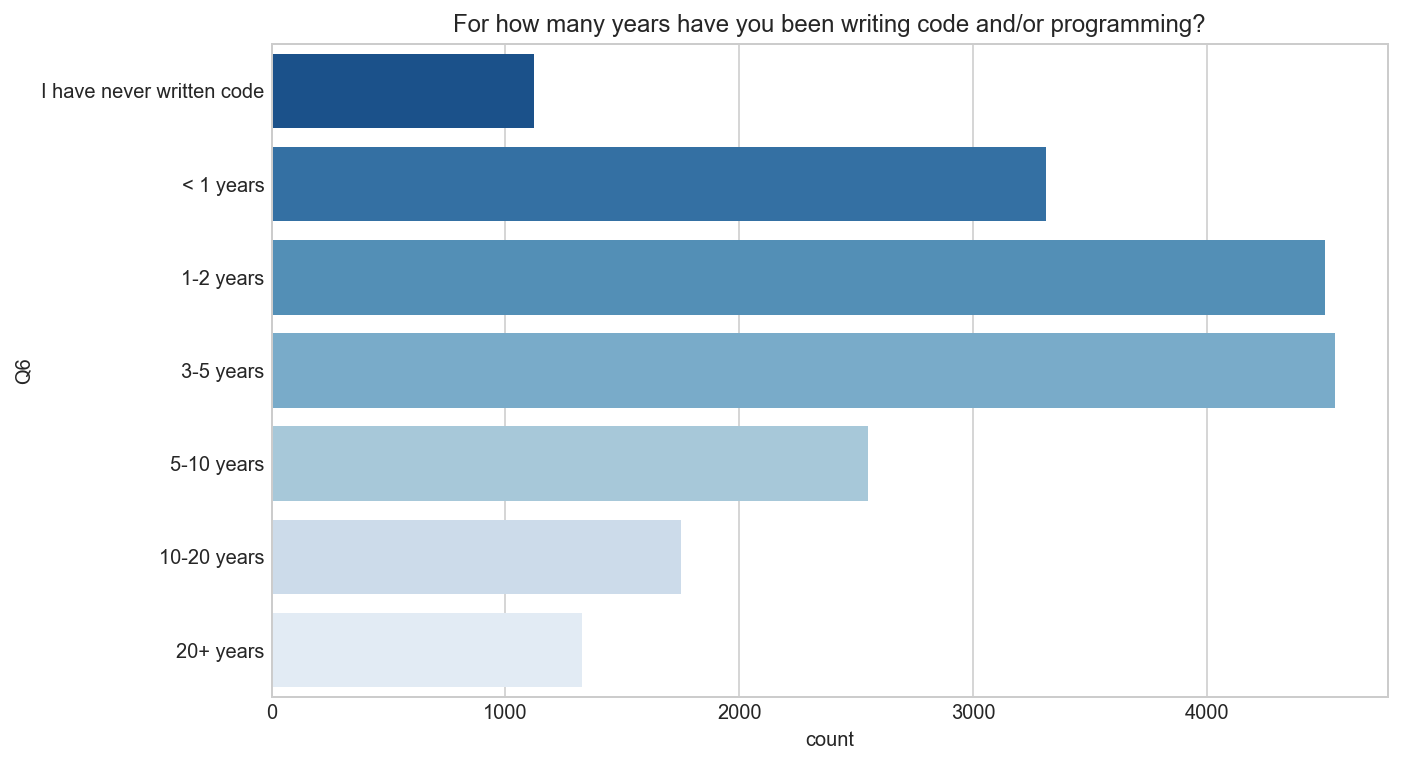

In [69]:
show_countplot_by_qno("Q6", order=q6_cols)

## Q7 What programming languages do you use on a regular basis? (Select all that apply)

### 🐼 pandas filter & describe 🗂

In [70]:
show_countplot_by_qno("Q7")

KeyError: 'Q7'

In [71]:
answer.head()

Time from Start to Finish (seconds)     Q1   Q2                        Q3  \
1                                1838  35-39  Man                  Colombia   
2                              289287  30-34  Man  United States of America   
3                                 860  35-39  Man                 Argentina   
4                                 507  30-34  Man  United States of America   
5                                  78  30-34  Man                     Japan   

                  Q4                 Q5           Q6 Q7_Part_1 Q7_Part_2  \
1    Doctoral degree            Student   5-10 years    Python         R   
2    Master’s degree      Data Engineer   5-10 years    Python         R   
3  Bachelor’s degree  Software Engineer  10-20 years       NaN       NaN   
4    Master’s degree     Data Scientist   5-10 years    Python       NaN   
5    Master’s degree  Software Engineer    3-5 years    Python       NaN   

  Q7_Part_3  ... Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4   Q35_B_Part_5  \
1       SQL  ...          NaN          NaN          NaN   TensorBoard    
2       SQL  ...          NaN          NaN          NaN            NaN   
3       NaN  ...          NaN          NaN          NaN            NaN   
4       SQL  ...          NaN          NaN          NaN            NaN   
5       NaN  ...          NaN          NaN          NaN            NaN   

  Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8 Q35_B_Part_9 Q35_B_Part_10  \
1          NaN          NaN          NaN          NaN           NaN   
2          NaN          NaN          NaN          NaN           NaN   
3          NaN          NaN          NaN          NaN          None   
4          NaN          NaN          NaN          NaN           NaN   
5          NaN          NaN          NaN          NaN           NaN   

  Q35_B_OTHER  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  

[5 rows x 355 columns]

Q7 부터는 파트가 여러개로 나뉘어져 있는 것을 확인할 수 있다.  
-> pandas의 filter 기능을 사용해서 질문에 Q7이 들어가있는 것만 뽑아올 수 있다

In [72]:
# Q7이 포함된 질문에 대한 대답값 뽑아오기
answer_Q7 = answer.filter(regex="Q7")
answer_Q7.head()

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6   Q7_Part_7  \
1    Python         R       SQL         C       NaN       NaN  Javascript   
2    Python         R       SQL       NaN       NaN       NaN         NaN   
3       NaN       NaN       NaN       NaN       NaN      Java  Javascript   
4    Python       NaN       SQL       NaN       NaN       NaN         NaN   
5    Python       NaN       NaN       NaN       NaN       NaN         NaN   

  Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12 Q7_OTHER  
1       NaN       NaN        NaN     MATLAB        NaN    Other  
2       NaN       NaN        NaN        NaN        NaN      NaN  
3       NaN       NaN       Bash        NaN        NaN      NaN  
4       NaN       NaN       Bash        NaN        NaN      NaN  
5       NaN       NaN        NaN        NaN        NaN      NaN

In [73]:
question["Q1"]

'What is your age (# years)?'

In [74]:
question["Q7"]

KeyError: 'Q7'

In [ ]:
# "Q7"이 포함된 질문값 가져오기
question.filter(regex='Q7')

In [ ]:
# "Q7"이 포함된 첫번째 질문 가져오기
question.filter(regex='Q7')[0]

In [75]:
# "Q7"이 포함된 두번째 질문 가져오기
question.filter(regex='Q7')[1]

'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R'

In [76]:
# 질문값을 "-"로 구분해서 나누기
question.filter(regex='Q7')[0].split("-")

['What programming languages do you use on a regular basis? (Select all that apply) ',
 ' Selected Choice ',
 ' Python']

In [77]:
question.filter(regex="Q7")[0].split("-")[0]

'What programming languages do you use on a regular basis? (Select all that apply) '

In [78]:
answer_Q7 = answer.filter(regex="Q7")
answer_Q7

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6   Q7_Part_7  \
1        Python         R       SQL         C       NaN       NaN  Javascript   
2        Python         R       SQL       NaN       NaN       NaN         NaN   
3           NaN       NaN       NaN       NaN       NaN      Java  Javascript   
4        Python       NaN       SQL       NaN       NaN       NaN         NaN   
5        Python       NaN       NaN       NaN       NaN       NaN         NaN   
...         ...       ...       ...       ...       ...       ...         ...   
20032       NaN       NaN       NaN       NaN       NaN       NaN         NaN   
20033    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20034    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20035    Python       NaN       SQL         C       NaN      Java  Javascript   
20036    Python       NaN       NaN       NaN       NaN       NaN         NaN   

      Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12 Q7_OTHER  
1           NaN       NaN        NaN     MATLAB        NaN    Other  
2           NaN       NaN        NaN        NaN        NaN      NaN  
3           NaN       NaN       Bash        NaN        NaN      NaN  
4           NaN       NaN       Bash        NaN        NaN      NaN  
5           NaN       NaN        NaN        NaN        NaN      NaN  
...         ...       ...        ...        ...        ...      ...  
20032       NaN       NaN        NaN        NaN        NaN      NaN  
20033       NaN       NaN        NaN        NaN        NaN      NaN  
20034       NaN       NaN        NaN        NaN        NaN      NaN  
20035       NaN       NaN        NaN        NaN        NaN      NaN  
20036       NaN       NaN        NaN        NaN        NaN      NaN  

[20036 rows x 13 columns]

Q7_part_1의 answer값을 보면, Python과 Nan으로 이루어져있음.  
-> 결측치인 Nan을 제외하고 Python으로 대답한 개수를 더해주면 몇명이 Python으로 대답했는지 알 수 있다.

In [79]:
answer_Q7.isnull()  # null값만 True로 표시

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
1          False      False      False      False       True       True   
2          False      False      False       True       True       True   
3           True       True       True       True       True      False   
4          False       True      False       True       True       True   
5          False       True       True       True       True       True   
...          ...        ...        ...        ...        ...        ...   
20032       True       True       True       True       True       True   
20033      False       True       True       True       True       True   
20034      False       True       True       True       True       True   
20035      False       True      False      False       True      False   
20036      False       True       True       True       True       True   

       Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
1          False       True       True        True       False        True   
2           True       True       True        True        True        True   
3          False       True       True       False        True        True   
4           True       True       True       False        True        True   
5           True       True       True        True        True        True   
...          ...        ...        ...         ...         ...         ...   
20032       True       True       True        True        True        True   
20033       True       True       True        True        True        True   
20034       True       True       True        True        True        True   
20035      False       True       True        True        True        True   
20036       True       True       True        True        True        True   

       Q7_OTHER  
1         False  
2          True  
3          True  
4          True  
5          True  
...         ...  
20032      True  
20033      True  
20034      True  
20035      True  
20036      True  

[20036 rows x 13 columns]

In [80]:
answer_Q7.isnull().sum()  # null값이 True(=1)이니까, "null값이 총 몇개"인지 확인할 수 있음

Q7_Part_1      4506
Q7_Part_2     15759
Q7_Part_3     12501
Q7_Part_4     16721
Q7_Part_5     16209
Q7_Part_6     16669
Q7_Part_7     17041
Q7_Part_8     19774
Q7_Part_9     19838
Q7_Part_10    18260
Q7_Part_11    17819
Q7_Part_12    19830
Q7_OTHER      18091
dtype: int64

In [81]:
answer_Q7.notnull()  # null이 아닌 값만 True로 표시

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  Q7_Part_5  Q7_Part_6  \
1           True       True       True       True      False      False   
2           True       True       True      False      False      False   
3          False      False      False      False      False       True   
4           True      False       True      False      False      False   
5           True      False      False      False      False      False   
...          ...        ...        ...        ...        ...        ...   
20032      False      False      False      False      False      False   
20033       True      False      False      False      False      False   
20034       True      False      False      False      False      False   
20035       True      False       True       True      False       True   
20036       True      False      False      False      False      False   

       Q7_Part_7  Q7_Part_8  Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
1           True      False      False       False        True       False   
2          False      False      False       False       False       False   
3           True      False      False        True       False       False   
4          False      False      False        True       False       False   
5          False      False      False       False       False       False   
...          ...        ...        ...         ...         ...         ...   
20032      False      False      False       False       False       False   
20033      False      False      False       False       False       False   
20034      False      False      False       False       False       False   
20035       True      False      False       False       False       False   
20036      False      False      False       False       False       False   

       Q7_OTHER  
1          True  
2         False  
3         False  
4         False  
5         False  
...         ...  
20032     False  
20033     False  
20034     False  
20035     False  
20036     False  

[20036 rows x 13 columns]

In [82]:
answer_Q7.notnull().sum()  # notnull값이 True(=1)이니까, "null이 아닌 값이 총 몇개"인지 확인할 수 있음

Q7_Part_1     15530
Q7_Part_2      4277
Q7_Part_3      7535
Q7_Part_4      3315
Q7_Part_5      3827
Q7_Part_6      3367
Q7_Part_7      2995
Q7_Part_8       262
Q7_Part_9       198
Q7_Part_10     1776
Q7_Part_11     2217
Q7_Part_12      206
Q7_OTHER       1945
dtype: int64

In [83]:
# 기술통계값 확인
answer_Q7.describe()

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6  \
count      15530      4277      7535      3315      3827      3367   
unique         1         1         1         1         1         1   
top       Python         R       SQL         C       C++      Java   
freq       15530      4277      7535      3315      3827      3367   

         Q7_Part_7 Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12  \
count         2995       262       198       1776       2217        206   
unique           1         1         1          1          1          1   
top     Javascript     Julia     Swift       Bash     MATLAB       None   
freq          2995       262       198       1776       2217        206   

       Q7_OTHER  
count      1945  
unique        1  
top       Other  
freq       1945

1. count 값은 null값을 제외한 값의 갯수  
2. 각 질문별 unique값(null값이 아닌 값)이 모두 1 이며, freq와 count값이 동일함  
> Nan 값이 아닌 값(=unique)이 곧 top값(가장 많이 나온 값)이라 유추할 수 있다.  
> freq와 count값이 곧 대답한 값의 갯수가 됨

In [84]:
# 기술통계값을 변수에 저장
answer_Q7_desc = answer_Q7.describe()
answer_Q7_desc

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6  \
count      15530      4277      7535      3315      3827      3367   
unique         1         1         1         1         1         1   
top       Python         R       SQL         C       C++      Java   
freq       15530      4277      7535      3315      3827      3367   

         Q7_Part_7 Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12  \
count         2995       262       198       1776       2217        206   
unique           1         1         1          1          1          1   
top     Javascript     Julia     Swift       Bash     MATLAB       None   
freq          2995       262       198       1776       2217        206   

       Q7_OTHER  
count      1945  
unique        1  
top       Other  
freq       1945

In [85]:
# 행의 값을 가져올때에는 .loc로 인덱싱
answer_Q7_desc.loc["top"]   # "top" 행의 값

Q7_Part_1         Python
Q7_Part_2              R
Q7_Part_3            SQL
Q7_Part_4              C
Q7_Part_5            C++
Q7_Part_6           Java
Q7_Part_7     Javascript
Q7_Part_8          Julia
Q7_Part_9          Swift
Q7_Part_10          Bash
Q7_Part_11        MATLAB
Q7_Part_12          None
Q7_OTHER           Other
Name: top, dtype: object

In [86]:
answer_Q7_desc.loc[["top", "count"]]   # "top", "count" 행의 값 (2개이상을 가져오려면, 리스트 형태로 넣어줘야함)

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6   Q7_Part_7  \
top      Python         R       SQL         C       C++      Java  Javascript   
count     15530      4277      7535      3315      3827      3367        2995   

      Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12 Q7_OTHER  
top       Julia     Swift       Bash     MATLAB       None    Other  
count       262       198       1776       2217        206     1945

In [87]:
answer_Q7_desc.loc[["top", "count"]].set_index("top")   # top을 인덱스로 만들기
                                                        # top이 컬럼이 아닌 row 값이기 때문에, 에러남

KeyError: "None of ['top'] are in the columns"

In [88]:
answer_Q7_desc.loc[["top", "count"]].T  # 전치(Transpose)해서 top을 row ->  column으로 변환시키기

top  count
Q7_Part_1       Python  15530
Q7_Part_2            R   4277
Q7_Part_3          SQL   7535
Q7_Part_4            C   3315
Q7_Part_5          C++   3827
Q7_Part_6         Java   3367
Q7_Part_7   Javascript   2995
Q7_Part_8        Julia    262
Q7_Part_9        Swift    198
Q7_Part_10        Bash   1776
Q7_Part_11      MATLAB   2217
Q7_Part_12        None    206
Q7_OTHER         Other   1945

In [89]:
answer_Q7_desc.loc[["top", "count"]].T.set_index("top")   # top을 인덱스로 만들기

count
top              
Python      15530
R            4277
SQL          7535
C            3315
C++          3827
Java         3367
Javascript   2995
Julia         262
Swift         198
Bash         1776
MATLAB       2217
None          206
Other        1945

-> 각 언어에 대한 빈도수를 확인할 수 있음.

#### pandas의 plot을 사용하여 각 언어에 대한 빈도수를 시각화

<AxesSubplot:xlabel='top'>

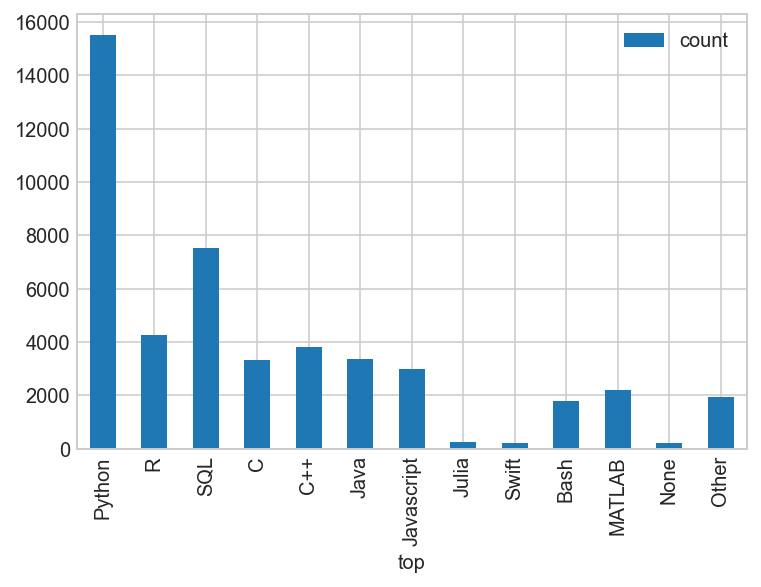

In [90]:
answer_Q7_desc.loc[["top", "count"]].T.set_index("top").plot.bar()

In [91]:
# 정리
answer_Q7_count = answer_Q7_desc.loc[["top", "count"]].T
answer_Q7_count = answer_Q7_count.set_index("top")
answer_Q7_count = answer_Q7_count.sort_values("count", ascending=False)  #  빈도수 높은순(내림차순)으로 정렬
answer_Q7_count

count
top              
Python      15530
SQL          7535
R            4277
C++          3827
Java         3367
C            3315
Javascript   2995
MATLAB       2217
Other        1945
Bash         1776
Julia         262
None          206
Swift         198

<AxesSubplot:xlabel='top'>

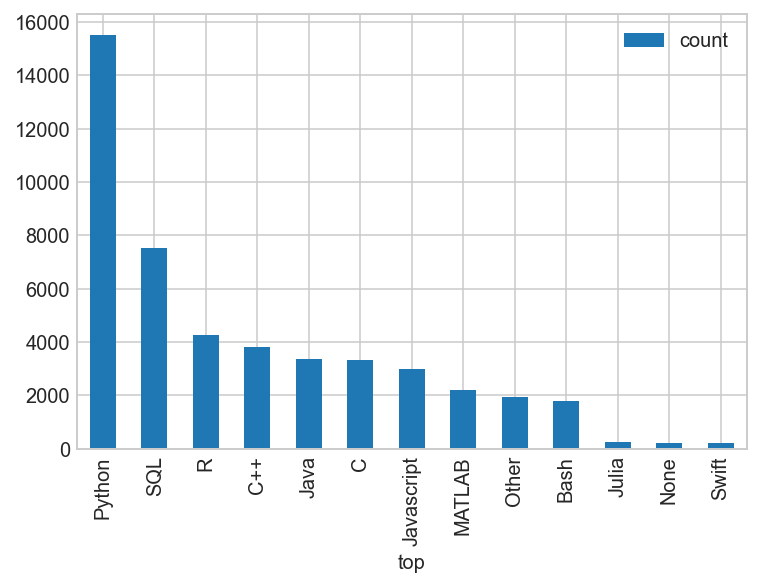

In [92]:
answer_Q7_count.plot.bar()

#### seaborn의 countplot을 사용하여 Q7에 대한 대답의 빈도수를 시각화

<AxesSubplot:xlabel='count', ylabel='top'>

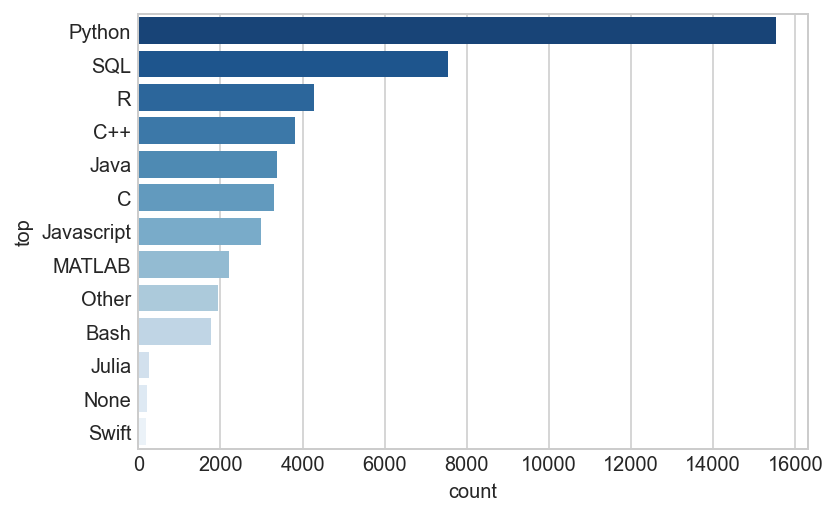

In [93]:
sns.barplot(data=answer_Q7_count, 
            y=answer_Q7_count.index, x="count",
            palette="Blues_r")

### 여러개의 질문을 타이틀로 가져오는 함수 만들기

### 🗂 How to get title in multiple choice question

In [94]:
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [95]:
# 질문 가져오기
question["Q6"]

'For how many years have you been writing code and/or programming?'

In [96]:
# Q7이 포함된 질문만 가져오기
question.filter(regex="Q7")

Q7_Part_1     What programming languages do you use on a reg...
Q7_Part_2     What programming languages do you use on a reg...
Q7_Part_3     What programming languages do you use on a reg...
Q7_Part_4     What programming languages do you use on a reg...
Q7_Part_5     What programming languages do you use on a reg...
Q7_Part_6     What programming languages do you use on a reg...
Q7_Part_7     What programming languages do you use on a reg...
Q7_Part_8     What programming languages do you use on a reg...
Q7_Part_9     What programming languages do you use on a reg...
Q7_Part_10    What programming languages do you use on a reg...
Q7_Part_11    What programming languages do you use on a reg...
Q7_Part_12    What programming languages do you use on a reg...
Q7_OTHER      What programming languages do you use on a reg...
Name: 0, dtype: object

In [97]:
question.filter(regex="Q7")[0]

'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'

In [98]:
question.filter(regex="Q7")[0].split('-')

['What programming languages do you use on a regular basis? (Select all that apply) ',
 ' Selected Choice ',
 ' Python']

In [99]:
question.filter(regex="Q7")[0].split('-')[0]

'What programming languages do you use on a regular basis? (Select all that apply) '

In [100]:
# Q7의 타이틀을 변수에 저장
q7_title = question.filter(regex="Q7")[0].split('-')[0]
q7_title

'What programming languages do you use on a regular basis? (Select all that apply) '

Text(0.5, 1.0, 'What programming languages do you use on a regular basis? (Select all that apply) ')

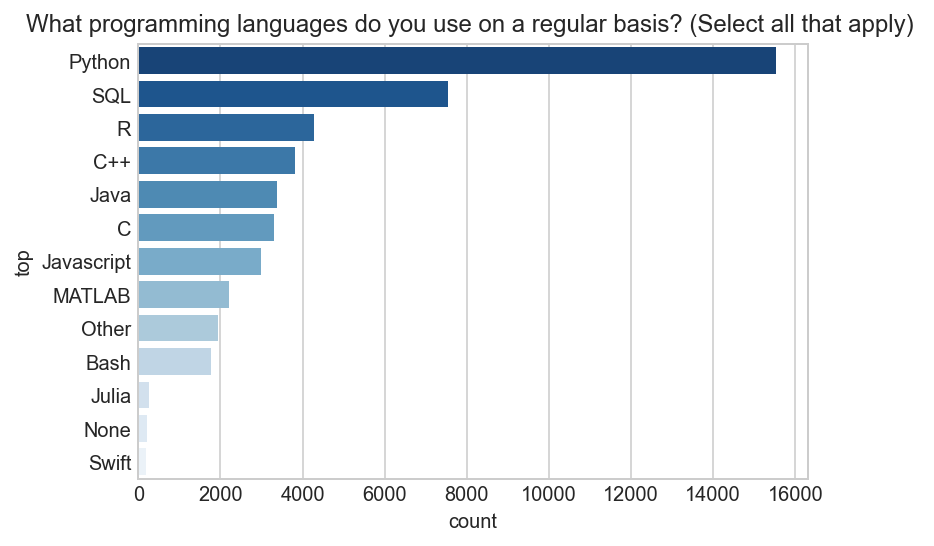

In [101]:
# Q7의 타이틀을 넣어서 그래프 그리기
sns.barplot(data=answer_Q7_count, 
            y=answer_Q7_count.index, x="count", palette="Blues_r").set_title(q7_title)

### 🏷 define get_question_title function

In [102]:
question.index

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [103]:
question["Q1"]

'What is your age (# years)?'

In [104]:
question.filter(regex="Q7")[0].split("-")[0]

'What programming languages do you use on a regular basis? (Select all that apply) '

In [105]:
def get_question_title_by_qno(qno):
    if qno in question.index:
        return question[qno]
    else:
        q_no = question.filter(regex=qno)[0].split("-")[0]
        return q_no

get_question_title_by_qno("Q7")

'What programming languages do you use on a regular basis? (Select all that apply) '

### 🗂 define get_multiple_choice_answer

#### 1. Q7이 들어간 질문에 대한 대답을 모두 반환

In [106]:
# Question별 answer 가져오는 함수
def get_multiple_choice_answer_by_qno(qno):
    df_answer = answer.filter(regex=qno)       # Q7이 들어간 질문에 대한 대답을 모두 반환
    return df_answer

get_multiple_choice_answer_by_qno("Q7")   

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6   Q7_Part_7  \
1        Python         R       SQL         C       NaN       NaN  Javascript   
2        Python         R       SQL       NaN       NaN       NaN         NaN   
3           NaN       NaN       NaN       NaN       NaN      Java  Javascript   
4        Python       NaN       SQL       NaN       NaN       NaN         NaN   
5        Python       NaN       NaN       NaN       NaN       NaN         NaN   
...         ...       ...       ...       ...       ...       ...         ...   
20032       NaN       NaN       NaN       NaN       NaN       NaN         NaN   
20033    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20034    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20035    Python       NaN       SQL         C       NaN      Java  Javascript   
20036    Python       NaN       NaN       NaN       NaN       NaN         NaN   

      Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12 Q7_OTHER  
1           NaN       NaN        NaN     MATLAB        NaN    Other  
2           NaN       NaN        NaN        NaN        NaN      NaN  
3           NaN       NaN       Bash        NaN        NaN      NaN  
4           NaN       NaN       Bash        NaN        NaN      NaN  
5           NaN       NaN        NaN        NaN        NaN      NaN  
...         ...       ...        ...        ...        ...      ...  
20032       NaN       NaN        NaN        NaN        NaN      NaN  
20033       NaN       NaN        NaN        NaN        NaN      NaN  
20034       NaN       NaN        NaN        NaN        NaN      NaN  
20035       NaN       NaN        NaN        NaN        NaN      NaN  
20036       NaN       NaN        NaN        NaN        NaN      NaN  

[20036 rows x 13 columns]

#### 2. Q7이 들어간 질문에 대한 대답을 기술통계로 반환

In [107]:
def get_multiple_choice_answer_by_qno(qno):
    df_answer = answer.filter(regex=qno)
    answer_desc = df_answer.describe()       # Q7이 들어간 질문에 대한 대답을 기술통계로 반환
    return answer_desc

get_multiple_choice_answer_by_qno("Q7")   

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6  \
count      15530      4277      7535      3315      3827      3367   
unique         1         1         1         1         1         1   
top       Python         R       SQL         C       C++      Java   
freq       15530      4277      7535      3315      3827      3367   

         Q7_Part_7 Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12  \
count         2995       262       198       1776       2217        206   
unique           1         1         1          1          1          1   
top     Javascript     Julia     Swift       Bash     MATLAB       None   
freq          2995       262       198       1776       2217        206   

       Q7_OTHER  
count      1945  
unique        1  
top       Other  
freq       1945

#### 3. Q7이 들어간 질문에 대한 대답값과 빈도수 반환 (전치처리 후 top값을 인덱스로 설정)

In [108]:
def get_multiple_choice_answer_by_qno(qno):
    df_answer = answer.filter(regex=qno)
    answer_desc = df_answer.describe()
    return answer_desc.loc[["top", "count"]].T.set_index("top")  # Q7이 들어간 질문에 대한 대답값과 빈도수 반환 (전치처리 후 top값을 인덱스로 설정)

get_multiple_choice_answer_by_qno("Q7")   

count
top              
Python      15530
R            4277
SQL          7535
C            3315
C++          3827
Java         3367
Javascript   2995
Julia         262
Swift         198
Bash         1776
MATLAB       2217
None          206
Other        1945

#### 4. Q7이 들어간 질문에 대한 대답값과 빈도수 반환 (빈도수 높은 순으로 정렬)

In [109]:
def get_multiple_choice_answer_by_qno(qno):
    df_answer = answer.filter(regex=qno)
    answer_desc = df_answer.describe()
    answer_count = answer_desc.loc[["top", "count"]].T.set_index("top")
    answer_count = answer_count.sort_values(by='count', ascending=False)  # Q7이 들어간 질문에 대한 대답값과 빈도수 반환 (빈도수 높은 순으로 정렬)
    return answer_count

get_multiple_choice_answer_by_qno("Q7")   

count
top              
Python      15530
SQL          7535
R            4277
C++          3827
Java         3367
C            3315
Javascript   2995
MATLAB       2217
Other        1945
Bash         1776
Julia         262
None          206
Swift         198

In [110]:
# Q9의 질문
get_question_title_by_qno("Q9")

"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) "

In [111]:
# Q9 질문에 대한 대답과 빈도를 빈도높은 순으로 정렬
get_multiple_choice_answer_by_qno("Q9")

count
top                                                 
Jupyter (JupyterLab, Jupyter Notebooks, etc)   11211
Visual Studio Code (VSCode)                     5873
 PyCharm                                        5099
 RStudio                                        3826
  Spyder                                        3290
  Notepad++                                     3132
  Sublime Text                                  2452
Visual Studio                                   2445
 MATLAB                                         1604
  Vim / Emacs                                   1502
Other                                           1162
None                                             386

### 질문별 대답과 빈도수를 시각화하는 함수 만들기

### 📊 define show_multiple_choice_bar_plot_by_qno function

#### 1. 질문 qno의 대답과 빈도수를 높은 순으로 가져오기

In [112]:
def show_multiple_choice_bar_plot_by_qno(qno):
    multiple_choice_answer = get_multiple_choice_answer_by_qno(qno)  # 질문 qno의 대답과 빈도수를 높은 순으로 가져오는 함수
    return multiple_choice_answer

show_multiple_choice_bar_plot_by_qno("Q7")

count
top              
Python      15530
SQL          7535
R            4277
C++          3827
Java         3367
C            3315
Javascript   2995
MATLAB       2217
Other        1945
Bash         1776
Julia         262
None          206
Swift         198

#### 2. 시각화 기능 추가

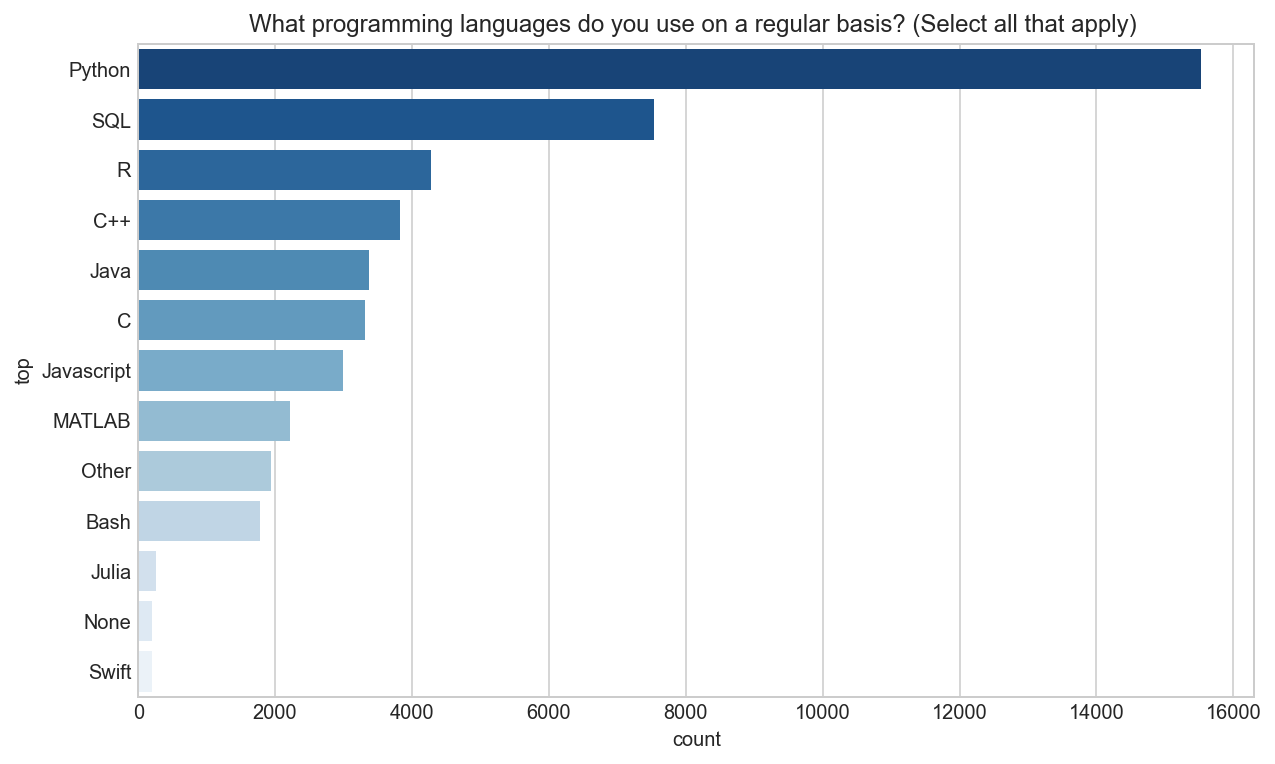

In [113]:
def show_multiple_choice_bar_plot_by_qno(qno, fsize = (10, 6)):
    multiple_choice_answer = get_multiple_choice_answer_by_qno(qno) 
    
    # 그래프 그리기
    plt.figure(figsize = fsize)
    sns.barplot(data = multiple_choice_answer,   # 질문에 대한 answer값을 반환하는 함수로 data 설정
               y = multiple_choice_answer.index, # top값 (answer값)
                x = "count",                     # answer의 빈도수
               palette = "Blues_r").set_title(get_question_title_by_qno(qno))

show_multiple_choice_bar_plot_by_qno("Q7")

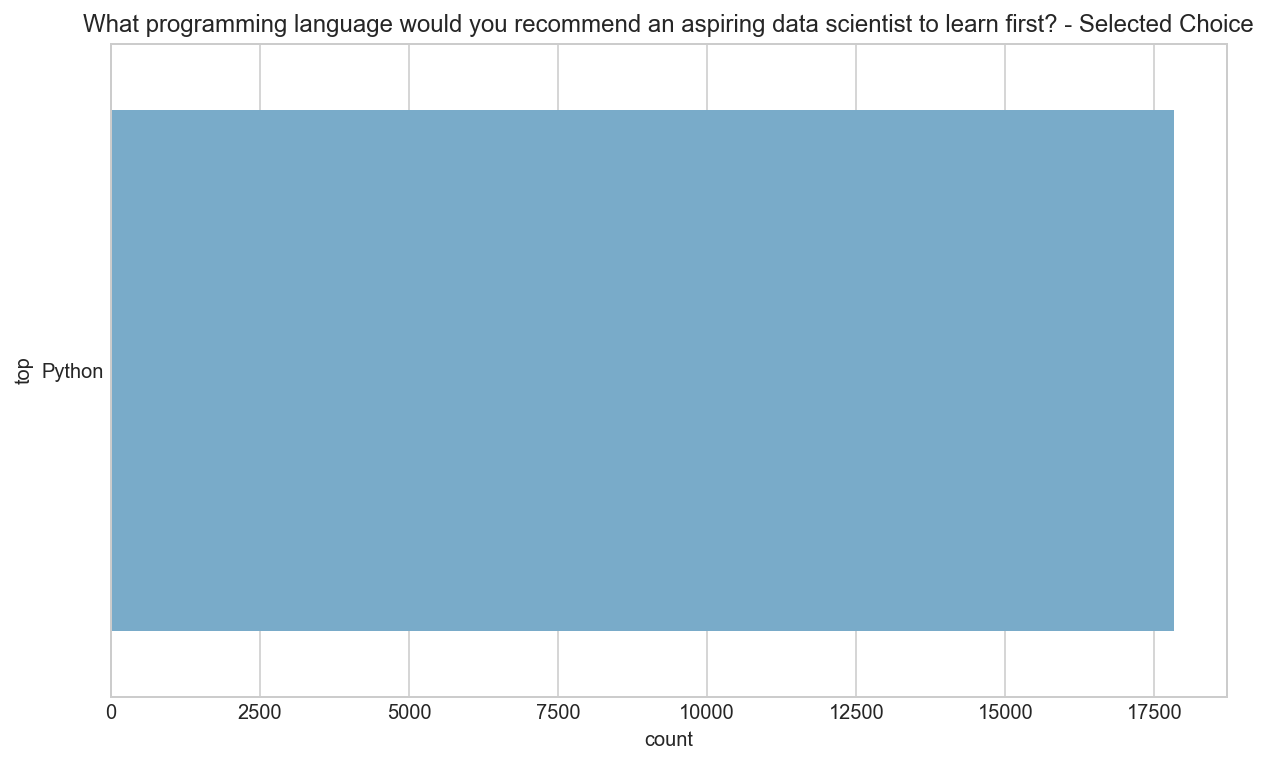

In [114]:
show_multiple_choice_bar_plot_by_qno("Q8")  # countplot으로 그리는게 적합

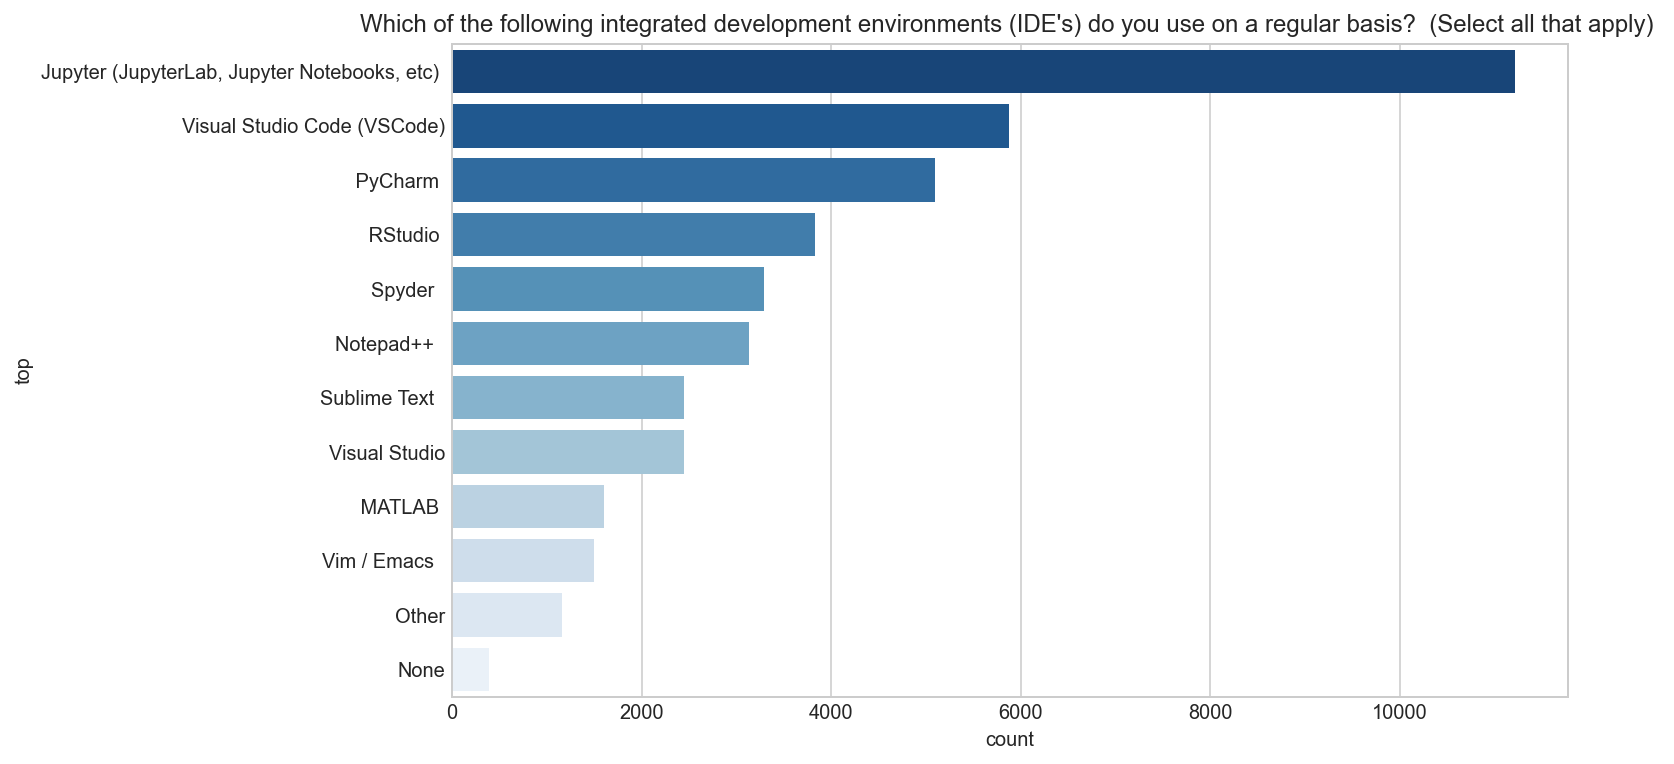

In [115]:
show_multiple_choice_bar_plot_by_qno("Q9")

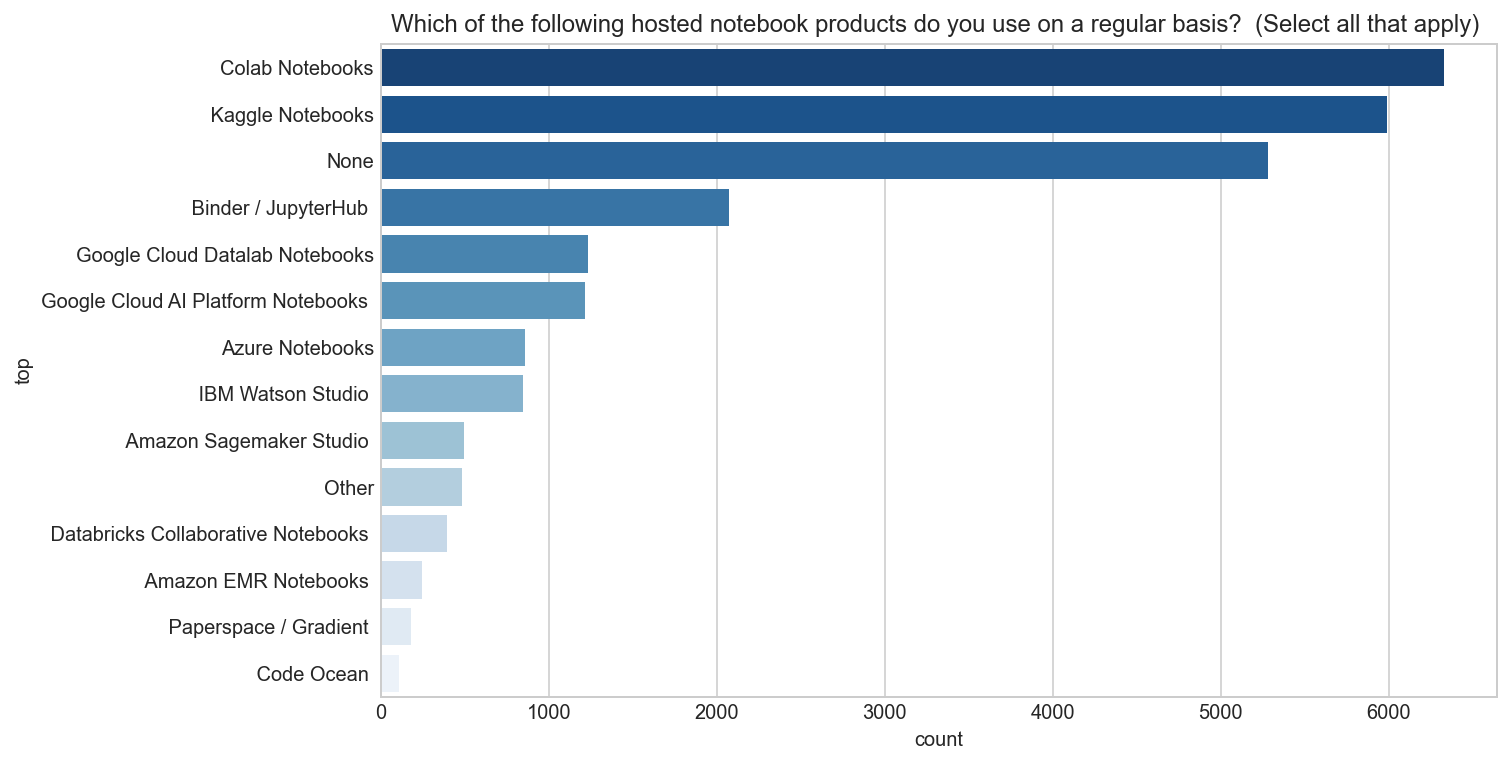

In [116]:
show_multiple_choice_bar_plot_by_qno("Q10")

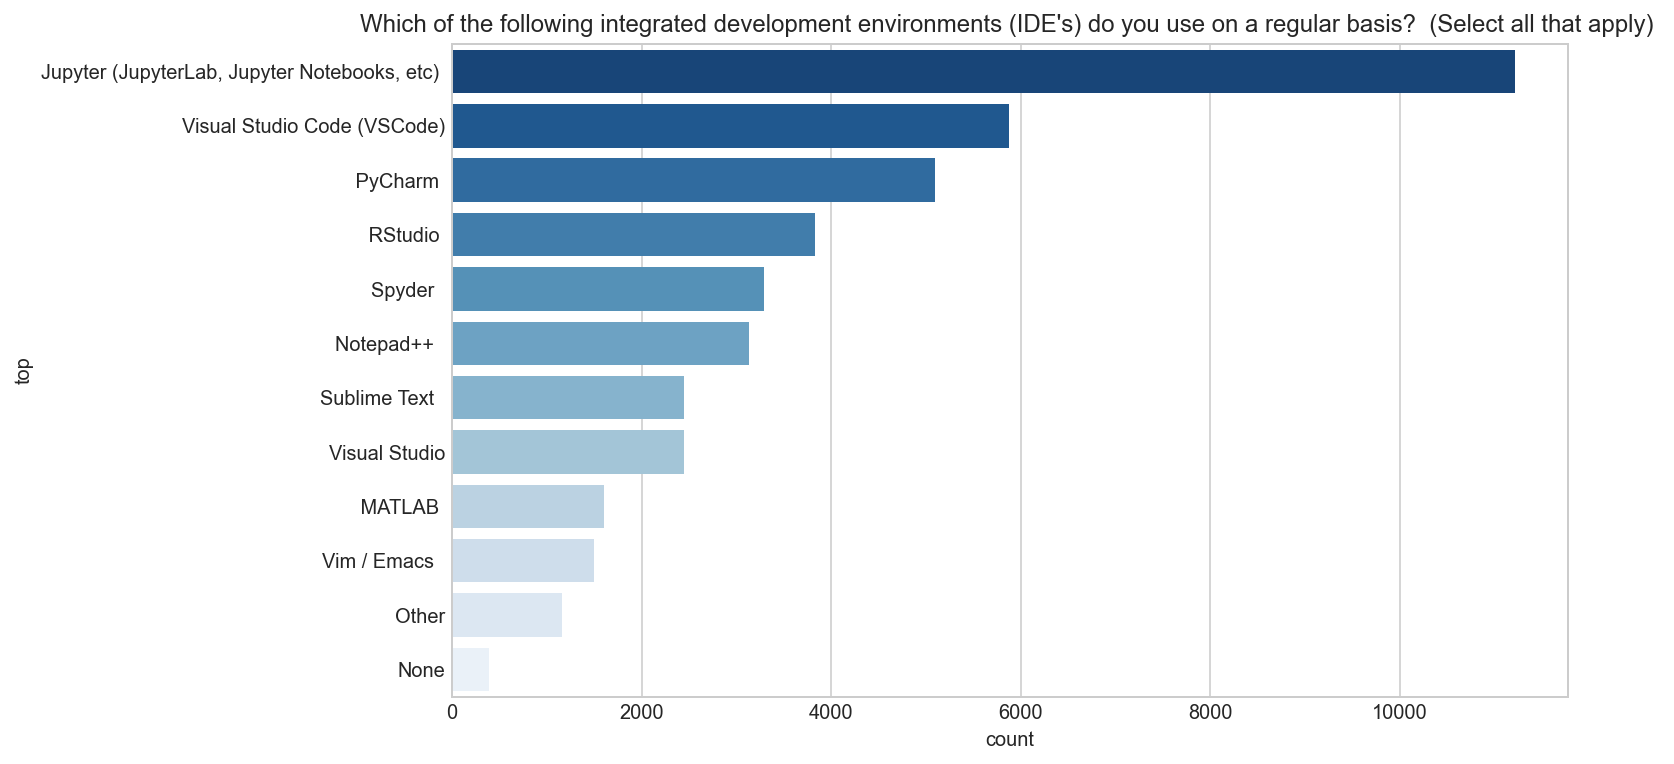

In [117]:
show_multiple_choice_bar_plot_by_qno("Q9")

#### multiple choice일때에는 crosstab으로 빈도수를 구할 수 없다.

In [118]:
# single choice 일 때에는, crosstab으로 2개 변수의 빈도수를 비교할 수 있음
pd.crosstab(answer['Q1'], answer['Q2'])

Q2      Man  Nonbinary  Prefer not to say  Prefer to self-describe  Woman
Q1                                                                       
18-21  2611          8                 42                       12    796
22-24  2838         12                 41                        9    886
25-29  3128         13                 42                        9    819
30-34  2246          8                 44                        9    504
35-39  1581          7                 33                        2    368
40-44  1153          2                 15                        5    222
45-49   840          1                 17                        4    126
50-54   605          0                 10                        2     81
55-59   353          0                 13                        0     45
60-69   362          1                  4                        2     29
70+      72          0                  2                        0      2

In [119]:
# multiple choice 일 때, crsstab으로 2개 변수의 빈도수 비교 불가
pd.crosstab(answer['Q7'], answer['Q2'])

KeyError: 'Q7'

#### multiple choice 일 때, 2개 변수의 빈도수를 어떻게 구할 수 있을까?🧐

In [120]:
# 컬럼명에 Q7이 포함된 컬럼만 가져오기
answer.filter(regex='Q7')

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6   Q7_Part_7  \
1        Python         R       SQL         C       NaN       NaN  Javascript   
2        Python         R       SQL       NaN       NaN       NaN         NaN   
3           NaN       NaN       NaN       NaN       NaN      Java  Javascript   
4        Python       NaN       SQL       NaN       NaN       NaN         NaN   
5        Python       NaN       NaN       NaN       NaN       NaN         NaN   
...         ...       ...       ...       ...       ...       ...         ...   
20032       NaN       NaN       NaN       NaN       NaN       NaN         NaN   
20033    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20034    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20035    Python       NaN       SQL         C       NaN      Java  Javascript   
20036    Python       NaN       NaN       NaN       NaN       NaN         NaN   

      Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12 Q7_OTHER  
1           NaN       NaN        NaN     MATLAB        NaN    Other  
2           NaN       NaN        NaN        NaN        NaN      NaN  
3           NaN       NaN       Bash        NaN        NaN      NaN  
4           NaN       NaN       Bash        NaN        NaN      NaN  
5           NaN       NaN        NaN        NaN        NaN      NaN  
...         ...       ...        ...        ...        ...      ...  
20032       NaN       NaN        NaN        NaN        NaN      NaN  
20033       NaN       NaN        NaN        NaN        NaN      NaN  
20034       NaN       NaN        NaN        NaN        NaN      NaN  
20035       NaN       NaN        NaN        NaN        NaN      NaN  
20036       NaN       NaN        NaN        NaN        NaN      NaN  

[20036 rows x 13 columns]

In [121]:
answer.filter(regex='Q7|Q2')  # 이렇게 하면, 컬럼명에 Q7과 Q2가 포함되는걸 다가져옴(Q20, Q21, Q22 등등 다 포함됨)

Q2 Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6  \
1        Man    Python         R       SQL         C       NaN       NaN   
2        Man    Python         R       SQL       NaN       NaN       NaN   
3        Man       NaN       NaN       NaN       NaN       NaN      Java   
4        Man    Python       NaN       SQL       NaN       NaN       NaN   
5        Man    Python       NaN       NaN       NaN       NaN       NaN   
...      ...       ...       ...       ...       ...       ...       ...   
20032    Man       NaN       NaN       NaN       NaN       NaN       NaN   
20033  Woman    Python       NaN       NaN       NaN       NaN       NaN   
20034    Man    Python       NaN       NaN       NaN       NaN       NaN   
20035    Man    Python       NaN       SQL         C       NaN      Java   
20036    Man    Python       NaN       NaN       NaN       NaN       NaN   

        Q7_Part_7 Q7_Part_8 Q7_Part_9  ...       Q29_B_Part_9 Q29_B_Part_10  \
1      Javascript       NaN       NaN  ...                NaN           NaN   
2             NaN       NaN       NaN  ...                NaN           NaN   
3      Javascript       NaN       NaN  ...                NaN           NaN   
4             NaN       NaN       NaN  ...                NaN           NaN   
5             NaN       NaN       NaN  ...                NaN           NaN   
...           ...       ...       ...  ...                ...           ...   
20032         NaN       NaN       NaN  ...                NaN           NaN   
20033         NaN       NaN       NaN  ...                NaN           NaN   
20034         NaN       NaN       NaN  ...                NaN           NaN   
20035  Javascript       NaN       NaN  ...                NaN           NaN   
20036         NaN       NaN       NaN  ...  Microsoft Access            NaN   

      Q29_B_Part_11 Q29_B_Part_12 Q29_B_Part_13           Q29_B_Part_14  \
1               NaN           NaN           NaN  Google Cloud BigQuery    
2               NaN           NaN           NaN                     NaN   
3               NaN           NaN           NaN                     NaN   
4               NaN           NaN           NaN                     NaN   
5               NaN           NaN           NaN                     NaN   
...             ...           ...           ...                     ...   
20032           NaN           NaN           NaN                     NaN   
20033           NaN           NaN           NaN                     NaN   
20034           NaN           NaN           NaN                     NaN   
20035           NaN           NaN           NaN                     NaN   
20036           NaN           NaN           NaN                     NaN   

           Q29_B_Part_15            Q29_B_Part_16 Q29_B_Part_17 Q29_B_OTHER  
1      Google Cloud SQL   Google Cloud Firestore            NaN         NaN  
2                    NaN                      NaN           NaN         NaN  
3                    NaN                      NaN           NaN         NaN  
4                    NaN                      NaN           NaN         NaN  
5                    NaN                      NaN           NaN         NaN  
...                  ...                      ...           ...         ...  
20032                NaN                      NaN           NaN         NaN  
20033                NaN                      NaN          None         NaN  
20034                NaN                      NaN          None         NaN  
20035                NaN                      NaN           NaN         NaN  
20036                NaN                      NaN           NaN         NaN  

[20036 rows x 133 columns]

In [122]:
q2q7 = answer.filter(regex='Q7|Q2$')  # Q2$ : Q2로 끝나는 문자가 포함된 컬럼만 가져오기
q2q7

Q2 Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6  \
1        Man    Python         R       SQL         C       NaN       NaN   
2        Man    Python         R       SQL       NaN       NaN       NaN   
3        Man       NaN       NaN       NaN       NaN       NaN      Java   
4        Man    Python       NaN       SQL       NaN       NaN       NaN   
5        Man    Python       NaN       NaN       NaN       NaN       NaN   
...      ...       ...       ...       ...       ...       ...       ...   
20032    Man       NaN       NaN       NaN       NaN       NaN       NaN   
20033  Woman    Python       NaN       NaN       NaN       NaN       NaN   
20034    Man    Python       NaN       NaN       NaN       NaN       NaN   
20035    Man    Python       NaN       SQL         C       NaN      Java   
20036    Man    Python       NaN       NaN       NaN       NaN       NaN   

        Q7_Part_7 Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12  \
1      Javascript       NaN       NaN        NaN     MATLAB        NaN   
2             NaN       NaN       NaN        NaN        NaN        NaN   
3      Javascript       NaN       NaN       Bash        NaN        NaN   
4             NaN       NaN       NaN       Bash        NaN        NaN   
5             NaN       NaN       NaN        NaN        NaN        NaN   
...           ...       ...       ...        ...        ...        ...   
20032         NaN       NaN       NaN        NaN        NaN        NaN   
20033         NaN       NaN       NaN        NaN        NaN        NaN   
20034         NaN       NaN       NaN        NaN        NaN        NaN   
20035  Javascript       NaN       NaN        NaN        NaN        NaN   
20036         NaN       NaN       NaN        NaN        NaN        NaN   

      Q7_OTHER  
1        Other  
2          NaN  
3          NaN  
4          NaN  
5          NaN  
...        ...  
20032      NaN  
20033      NaN  
20034      NaN  
20035      NaN  
20036      NaN  

[20036 rows x 14 columns]

In [123]:
q2q7_count = q2q7.groupby('Q2').count()  # Q2를 기준으로 groupby하고, 나머지 컬럼값에 대해 빈도수 구하기
q2q7_count

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  \
Q2                                                                    
Man                          12530       3299       5940       2552   
Nonbinary                       41         14         20          8   
Prefer not to say              182         48         97         36   
Prefer to self-describe         41          8         18         12   
Woman                         2736        908       1460        707   

                         Q7_Part_5  Q7_Part_6  Q7_Part_7  Q7_Part_8  \
Q2                                                                    
Man                           3063       2641       2487        238   
Nonbinary                       10          1          6          1   
Prefer not to say               43         42         41          5   
Prefer to self-describe         13          9         12          2   
Woman                          698        674        449         16   

                         Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
Q2                                                                       
Man                            171        1561        1679         149   
Nonbinary                        2          10           7           0   
Prefer not to say                4          31          28           6   
Prefer to self-describe          1          10           6           0   
Woman                           20         164         497          51   

                         Q7_OTHER  
Q2                                 
Man                          1634  
Nonbinary                       7  
Prefer not to say              31  
Prefer to self-describe         7  
Woman                         266

Q7의 각 질문들이 어떤것을 의미하는지 확인해보자

In [124]:
answer.filter(regex='Q7').describe()

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6  \
count      15530      4277      7535      3315      3827      3367   
unique         1         1         1         1         1         1   
top       Python         R       SQL         C       C++      Java   
freq       15530      4277      7535      3315      3827      3367   

         Q7_Part_7 Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12  \
count         2995       262       198       1776       2217        206   
unique           1         1         1          1          1          1   
top     Javascript     Julia     Swift       Bash     MATLAB       None   
freq          2995       262       198       1776       2217        206   

       Q7_OTHER  
count      1945  
unique        1  
top       Other  
freq       1945

In [125]:
# Q7 각 문항의 최반값(=unique값) 가져오기
answer.filter(regex='Q7').describe().loc['top']

Q7_Part_1         Python
Q7_Part_2              R
Q7_Part_3            SQL
Q7_Part_4              C
Q7_Part_5            C++
Q7_Part_6           Java
Q7_Part_7     Javascript
Q7_Part_8          Julia
Q7_Part_9          Swift
Q7_Part_10          Bash
Q7_Part_11        MATLAB
Q7_Part_12          None
Q7_OTHER           Other
Name: top, dtype: object

In [126]:
# 인덱스 값 빼고, value를 리스트 형태로 변환
q7_cols = answer.filter(regex='Q7').describe().loc['top'].tolist()
q7_cols

['Python',
 'R',
 'SQL',
 'C',
 'C++',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'None',
 'Other']

In [127]:
q2q7 = answer.filter(regex="Q7|Q2$")     # Q7과 Q2의 answer값
q2q7_count = q2q7.groupby("Q2").count()  # Q2를 기준으로 groupby하고, 나머지 컬럼값에 대해 빈도수 구하기
q2q7_count

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  \
Q2                                                                    
Man                          12530       3299       5940       2552   
Nonbinary                       41         14         20          8   
Prefer not to say              182         48         97         36   
Prefer to self-describe         41          8         18         12   
Woman                         2736        908       1460        707   

                         Q7_Part_5  Q7_Part_6  Q7_Part_7  Q7_Part_8  \
Q2                                                                    
Man                           3063       2641       2487        238   
Nonbinary                       10          1          6          1   
Prefer not to say               43         42         41          5   
Prefer to self-describe         13          9         12          2   
Woman                          698        674        449         16   

                         Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
Q2                                                                       
Man                            171        1561        1679         149   
Nonbinary                        2          10           7           0   
Prefer not to say                4          31          28           6   
Prefer to self-describe          1          10           6           0   
Woman                           20         164         497          51   

                         Q7_OTHER  
Q2                                 
Man                          1634  
Nonbinary                       7  
Prefer not to say              31  
Prefer to self-describe         7  
Woman                         266

In [128]:
q2q7_count.columns = q7_cols  # 컬럼명을 Q7의 answer 고유값으로 변경
q2q7_count

Python     R   SQL     C   C++  Java  Javascript  \
Q2                                                                          
Man                       12530  3299  5940  2552  3063  2641        2487   
Nonbinary                    41    14    20     8    10     1           6   
Prefer not to say           182    48    97    36    43    42          41   
Prefer to self-describe      41     8    18    12    13     9          12   
Woman                      2736   908  1460   707   698   674         449   

                         Julia  Swift  Bash  MATLAB  None  Other  
Q2                                                                
Man                        238    171  1561    1679   149   1634  
Nonbinary                    1      2    10       7     0      7  
Prefer not to say            5      4    31      28     6     31  
Prefer to self-describe      2      1    10       6     0      7  
Woman                       16     20   164     497    51    266

#### 남성과 여성에 대한 빈도수만 확인하기

In [129]:
q2q7_count.loc[['Man', 'Woman']]

Python     R   SQL     C   C++  Java  Javascript  Julia  Swift  Bash  \
Q2                                                                            
Man     12530  3299  5940  2552  3063  2641        2487    238    171  1561   
Woman    2736   908  1460   707   698   674         449     16     20   164   

       MATLAB  None  Other  
Q2                          
Man      1679   149   1634  
Woman     497    51    266

<AxesSubplot:xlabel='Q2'>

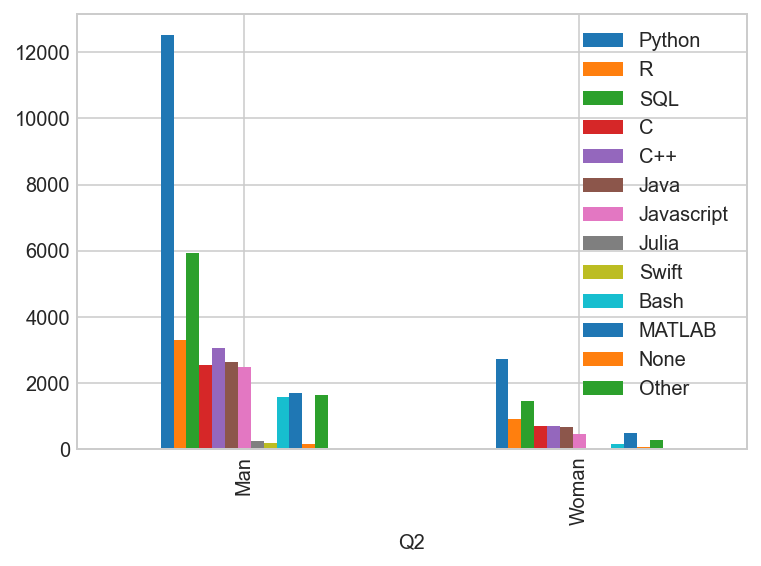

In [130]:
# 막대그래프로 확인
q2q7_count.loc[['Man', 'Woman']].plot.bar()

In [131]:
# Q7의 answer를 x축으로 설정하고, 남성일때와 여성일때를 각각 다른 컬러로 표현
# Q7의 answer를 인덱스로 변환
q2q7_count.loc[['Man', 'Woman']].T

Q2            Man  Woman
Python      12530   2736
R            3299    908
SQL          5940   1460
C            2552    707
C++          3063    698
Java         2641    674
Javascript   2487    449
Julia         238     16
Swift         171     20
Bash         1561    164
MATLAB       1679    497
None          149     51
Other        1634    266

<AxesSubplot:>

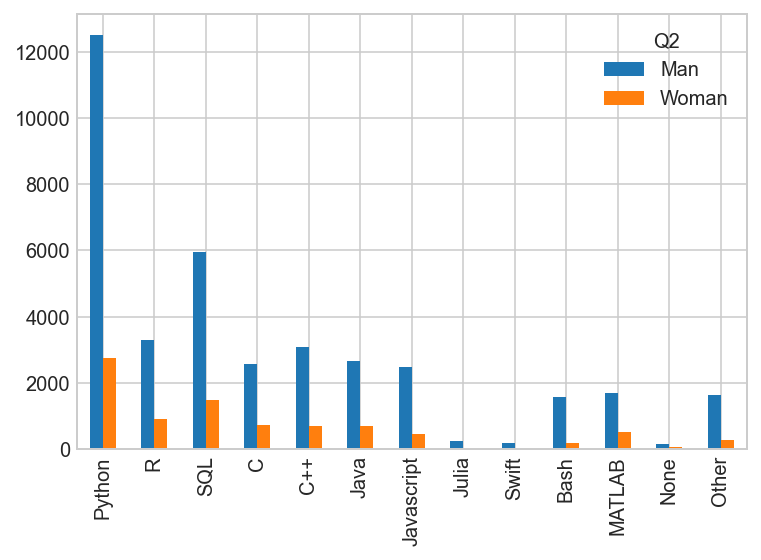

In [132]:
q2q7_count.loc[['Man', 'Woman']].T.plot.bar()

<AxesSubplot:>

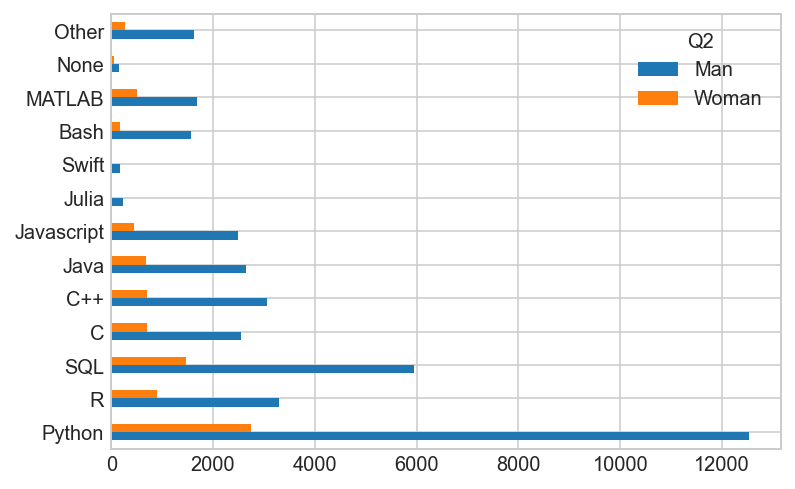

In [133]:
# Q7 answer값을 y축으로 (barh)
q2q7_count.loc[['Man', 'Woman']].T.plot.barh()

Text(0.5, 1.0, 'Gender & Programming Language')

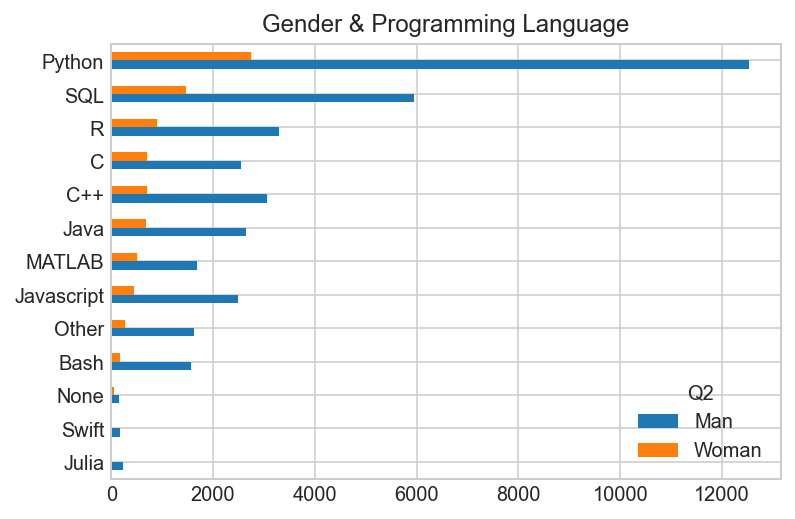

In [134]:
# 빈도수가 높은 순으로 정렬  (Woman 컬럼을 기준으로)
q2q7_count.loc[['Man', 'Woman']].T.sort_values('Woman').plot.barh().set_title('Gender & Programming Language')

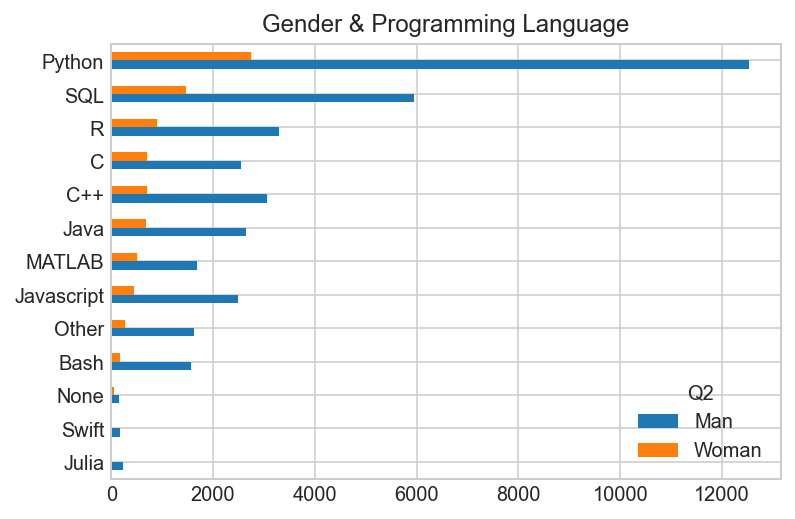

In [135]:
# 로그 없이 깔끔하게 출력하려면, 임의의 변수에 저장하면 됨 !
w = q2q7_count.loc[['Man', 'Woman']].T.sort_values('Woman').plot.barh(title='Gender & Programming Language')

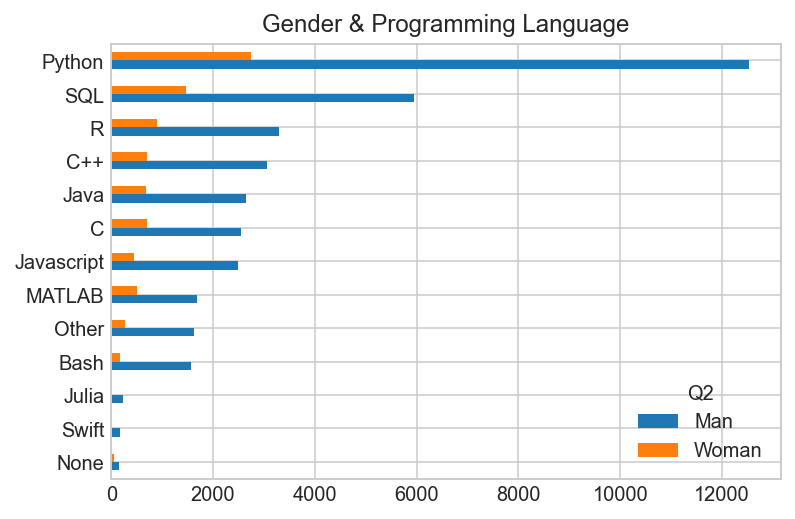

In [136]:
# 빈도수가 높은 순으로 정렬  (Man 컬럼을 기준으로)
m = q2q7_count.loc[['Man', 'Woman']].T.sort_values('Man').plot.barh(title='Gender & Programming Language')

### define 📊 show_plot_by_qno 

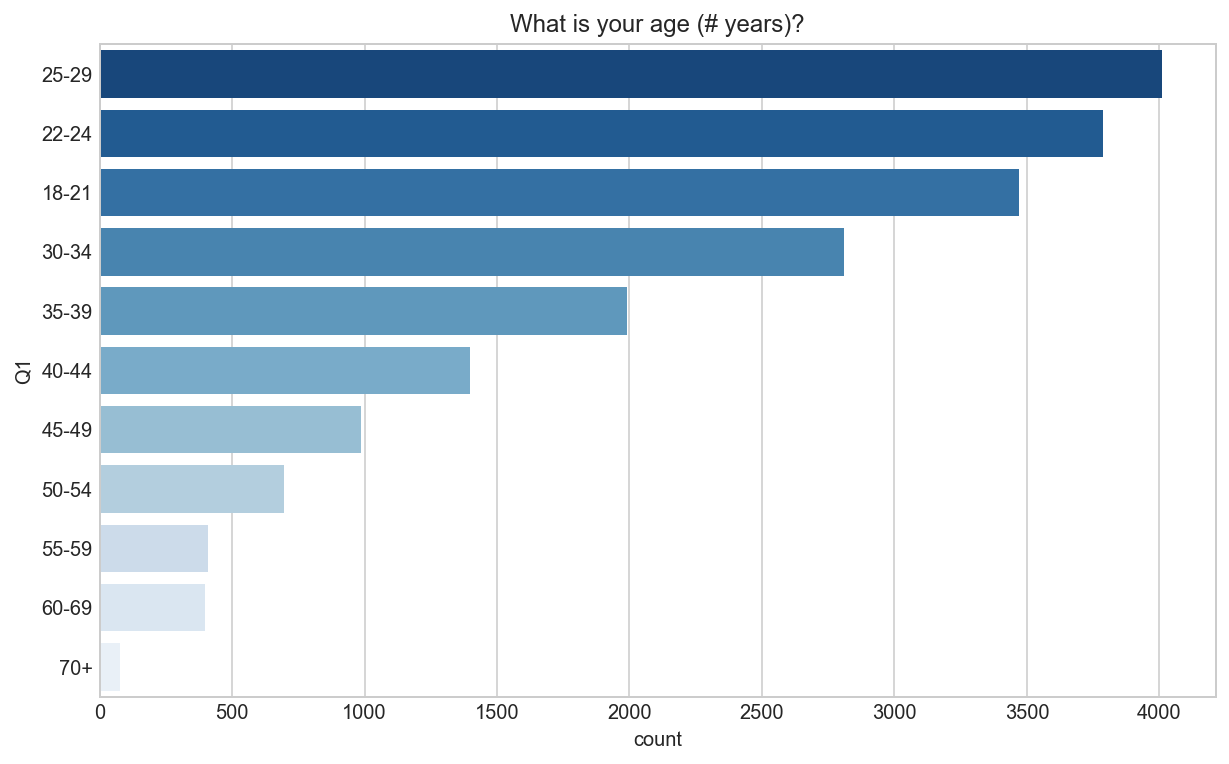

In [137]:
# single choice 그래프 그리기
show_countplot_by_qno('Q1')

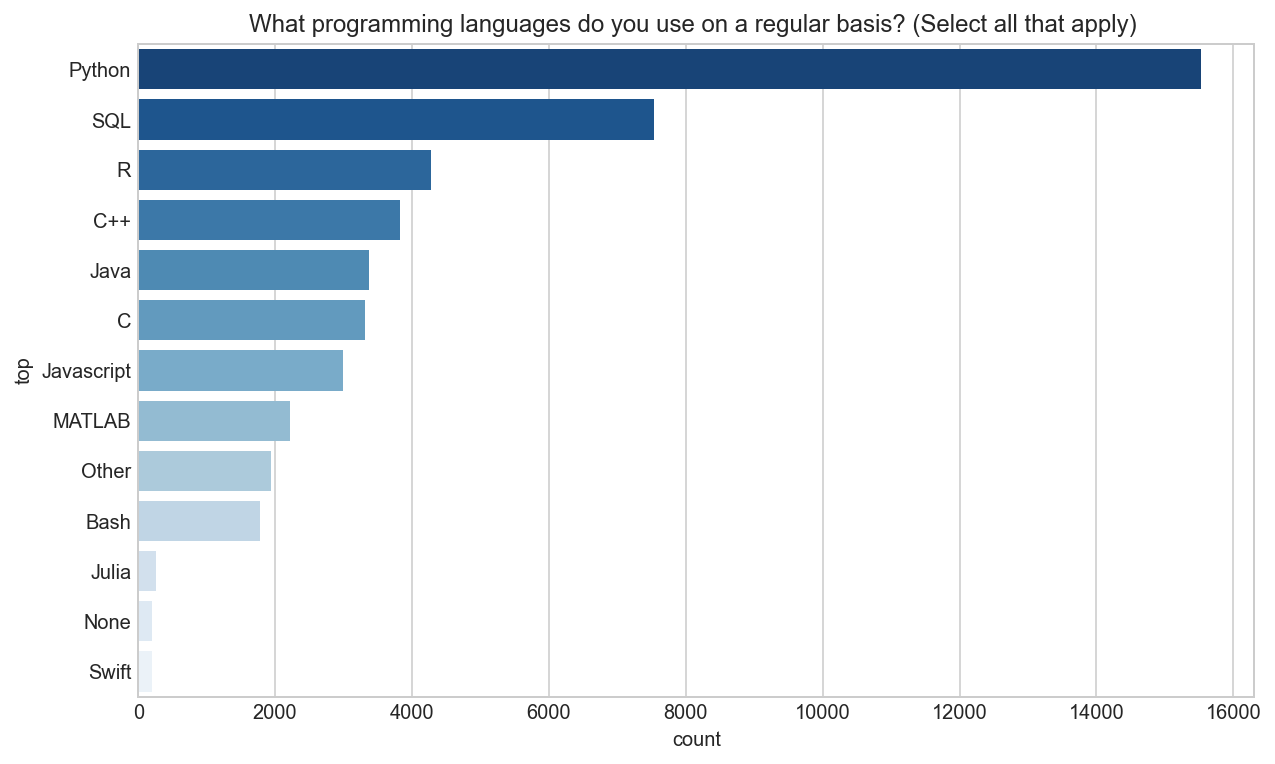

In [138]:
# multiple choice 그래프 그리기
show_multiple_choice_bar_plot_by_qno('Q7')

#### 문제 번호만 넘겨주면 single choice이든 multiple choice이든 그래프가 그려지도록 만들기

In [139]:
# 질문 인덱스
question.index

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [140]:
def show_plot_by_qno(qno):
    if qno in question.index:      # single choice인 경우
        show_countplot_by_qno(qno)
    else:
        show_multiple_choice_bar_plot_by_qno(qno)        

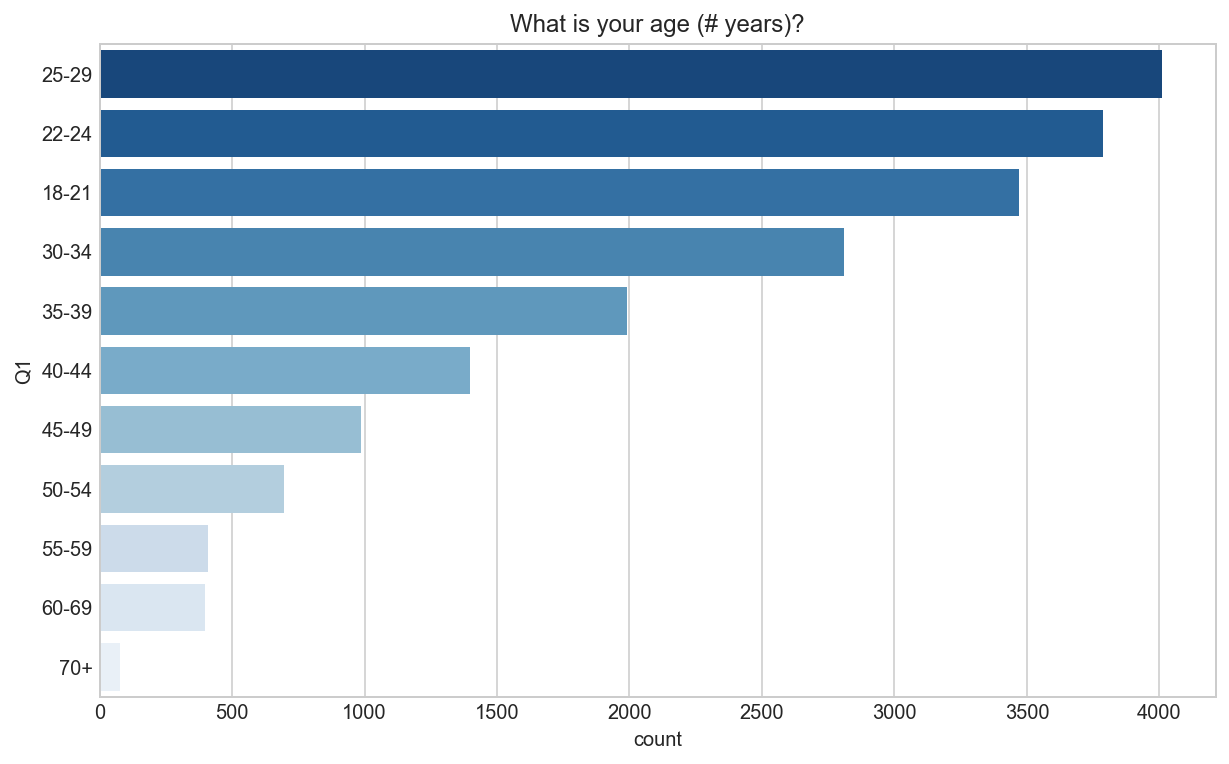

In [141]:
show_plot_by_qno('Q1')

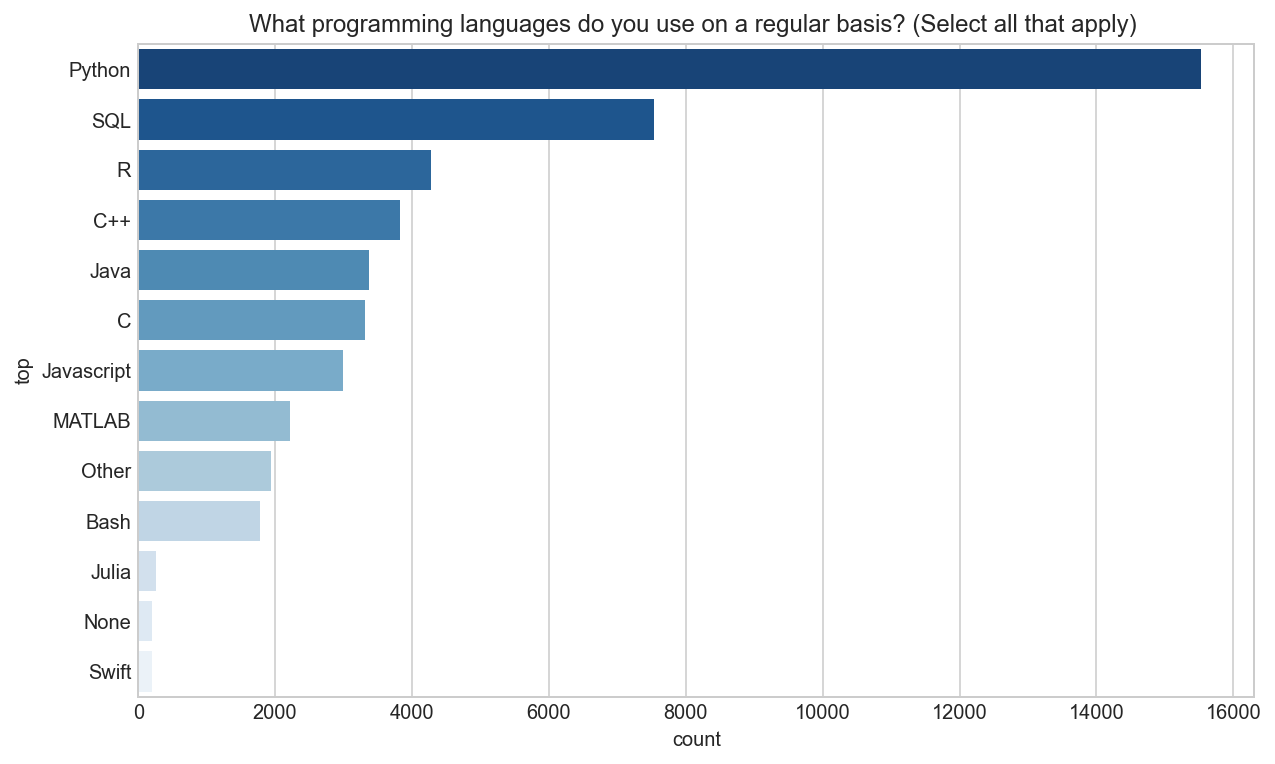

In [142]:
show_plot_by_qno("Q7")

## Q8 What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice

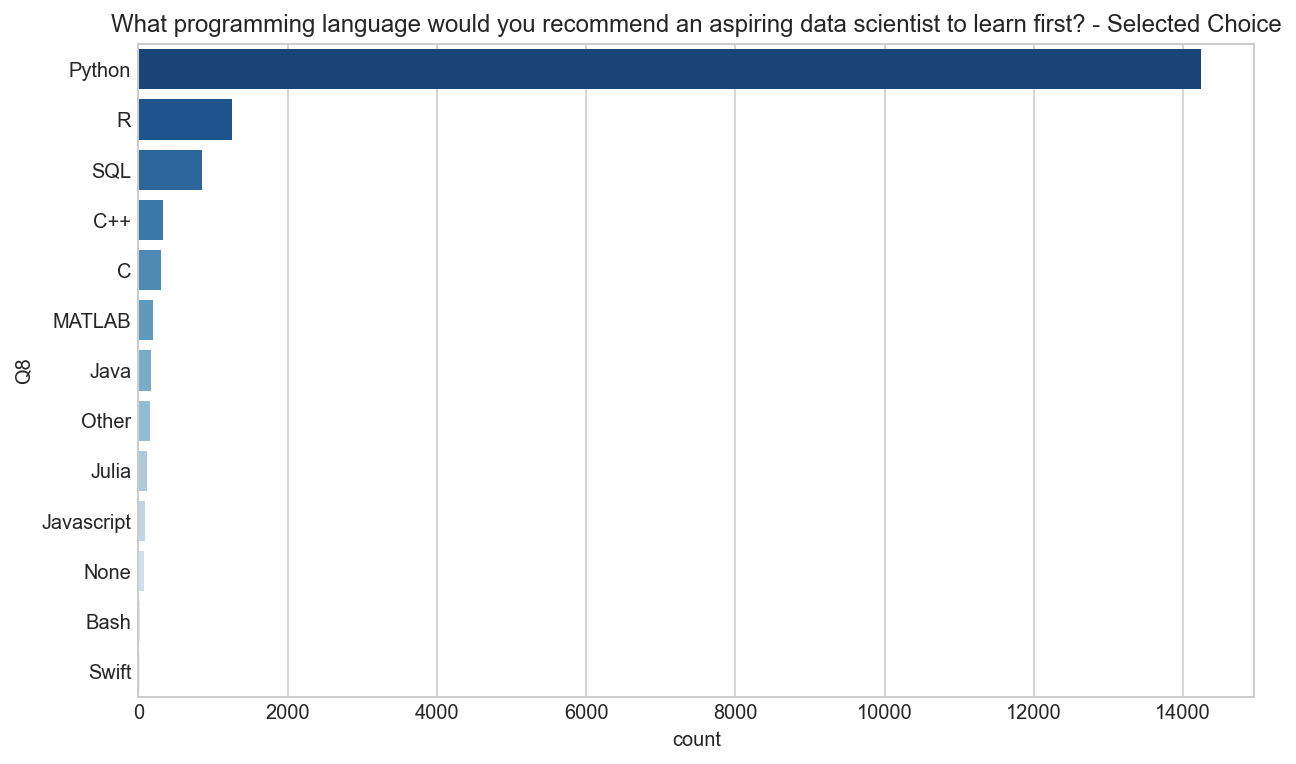

In [143]:
show_plot_by_qno("Q8")

## Q9 Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply)

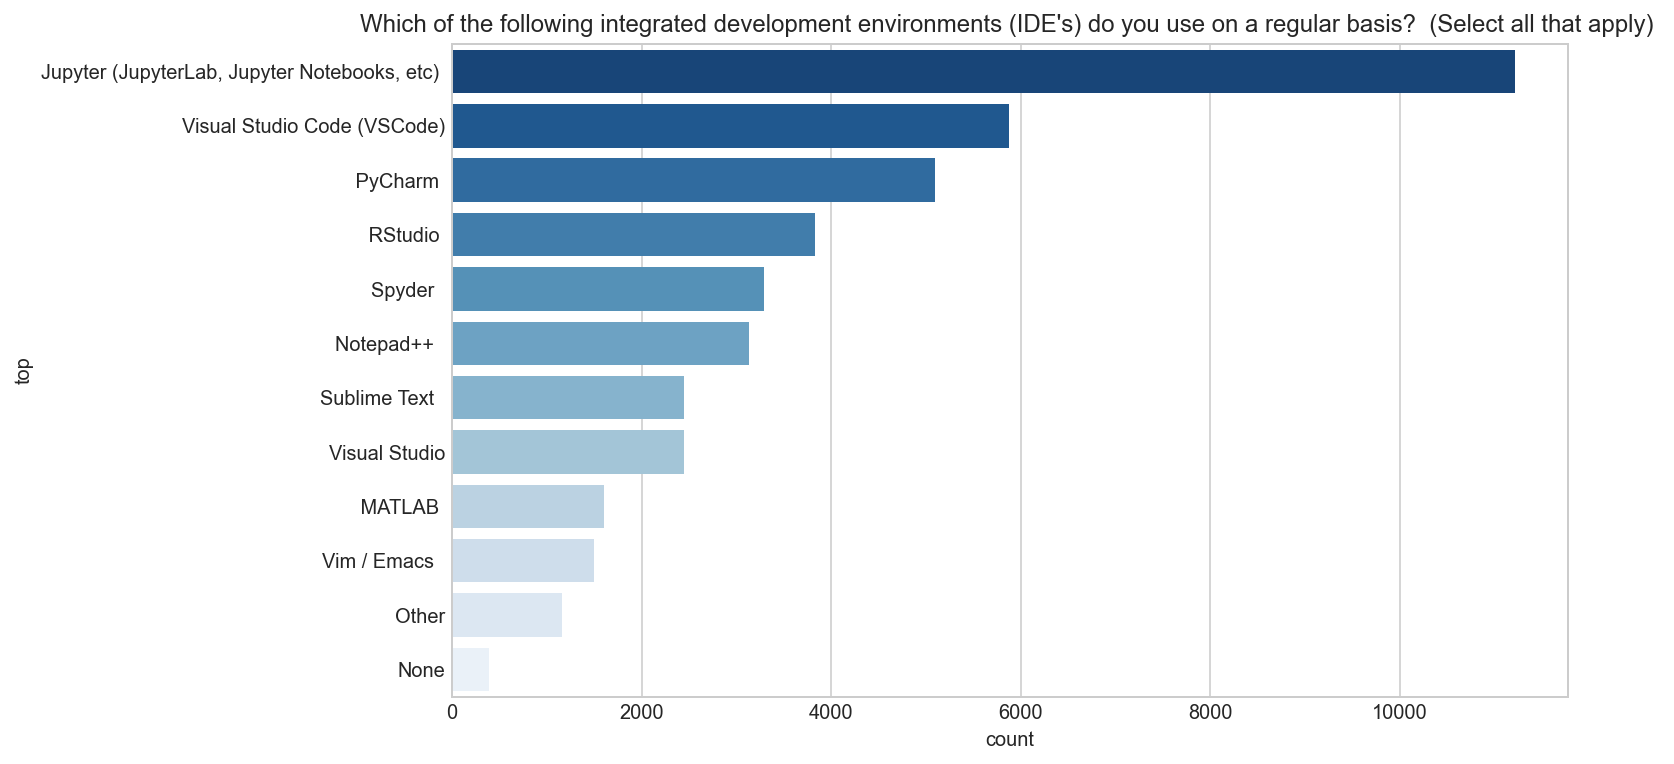

In [144]:
show_plot_by_qno("Q9")

## Q10 Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply)

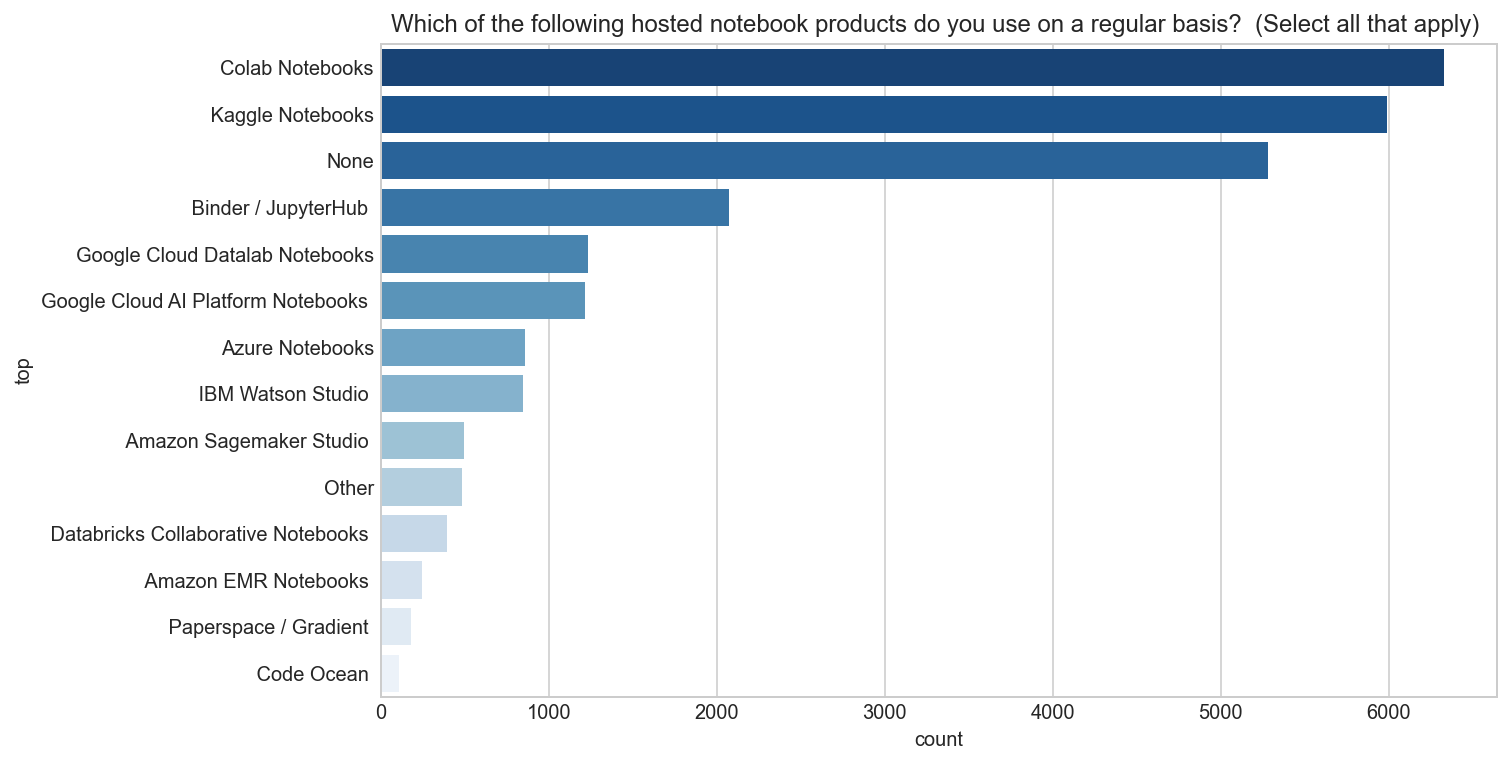

In [145]:
show_plot_by_qno("Q10")

## Q11 What type of computing platform do you use most often for your data science projects? - Selected Choice

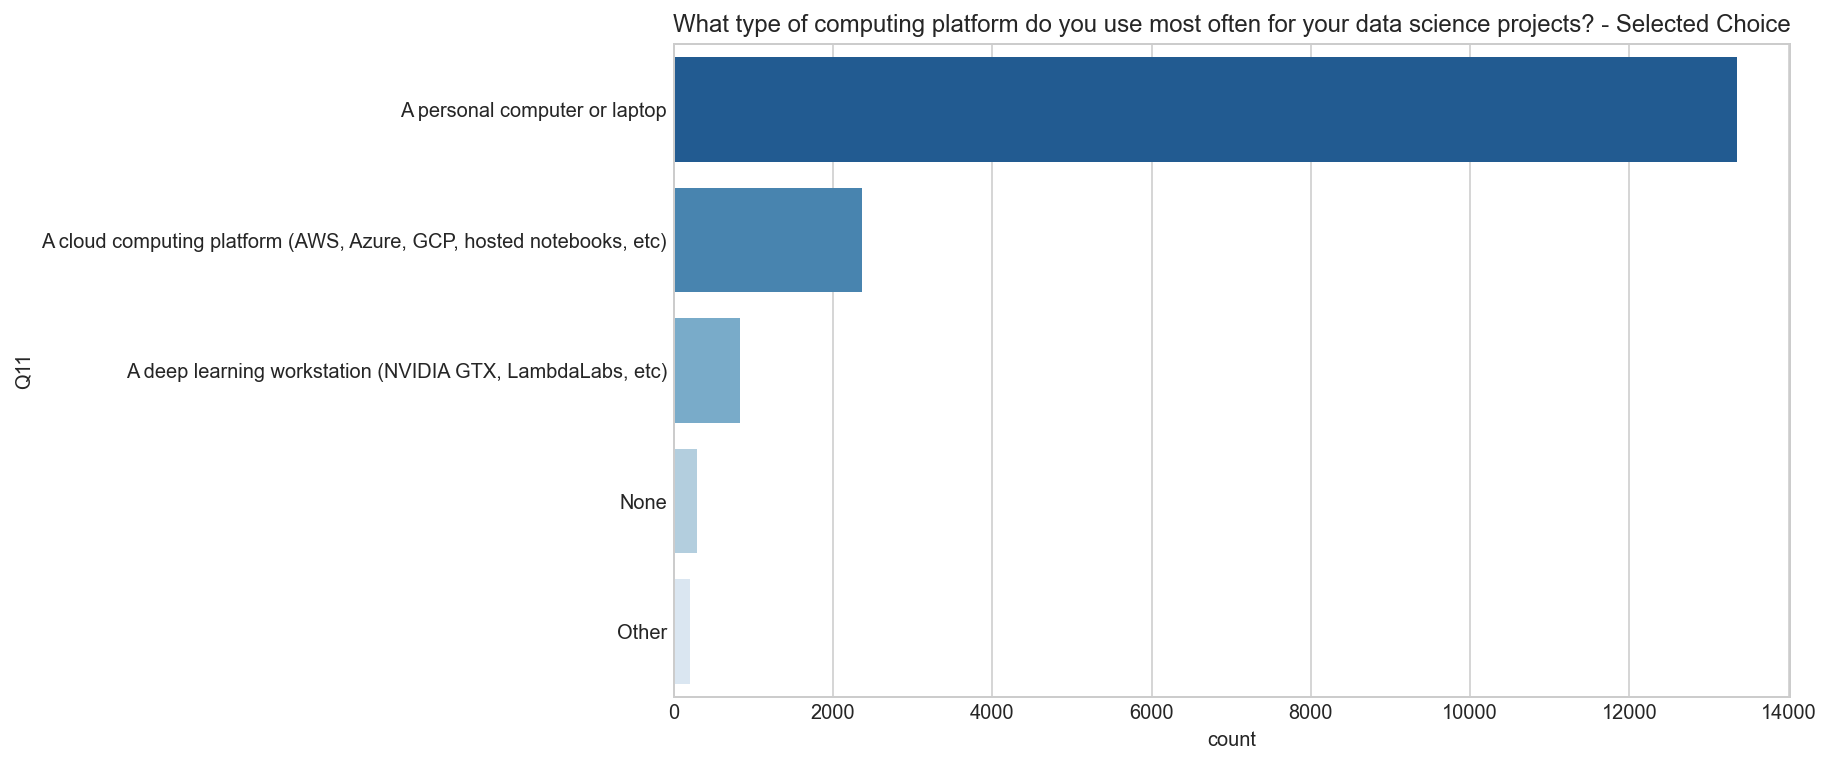

In [146]:
show_plot_by_qno("Q11")

## Q12 Which types of specialized hardware do you use on a regular basis?

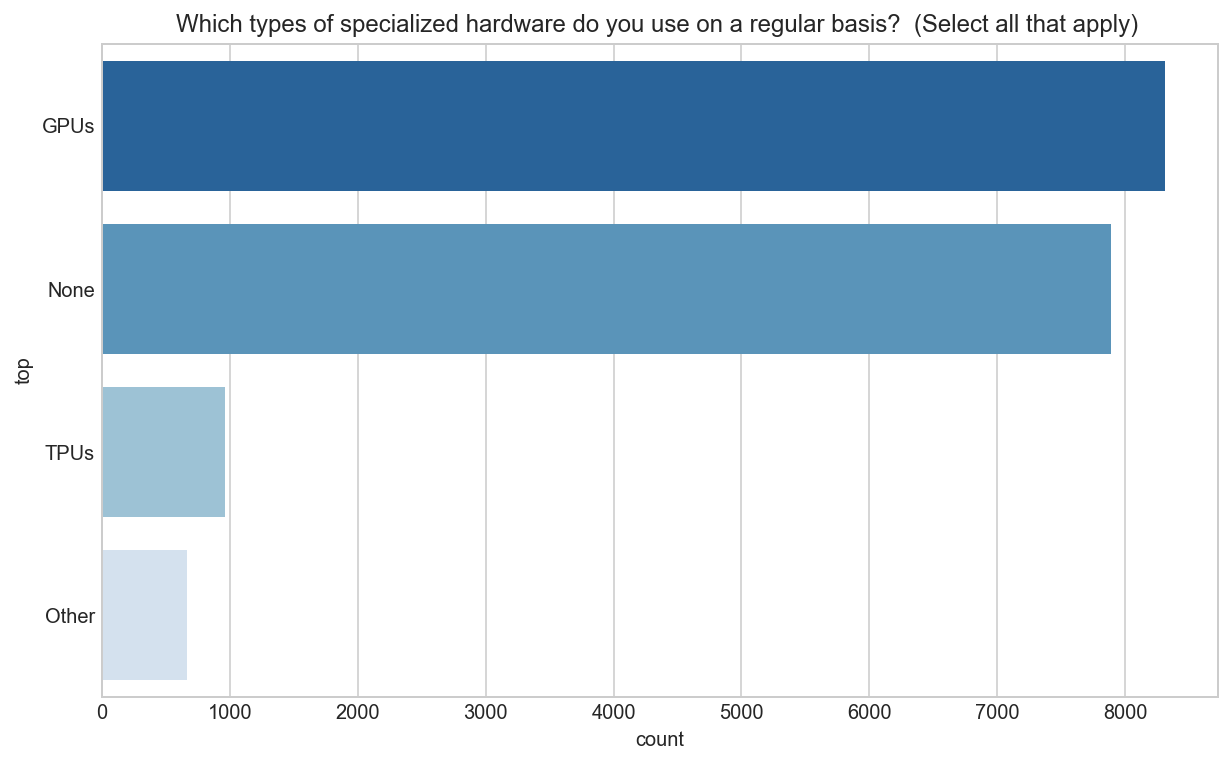

In [147]:
show_plot_by_qno("Q12")

## Q13 🧮 Approximately how many times have you used a TPU (tensor processing unit)?

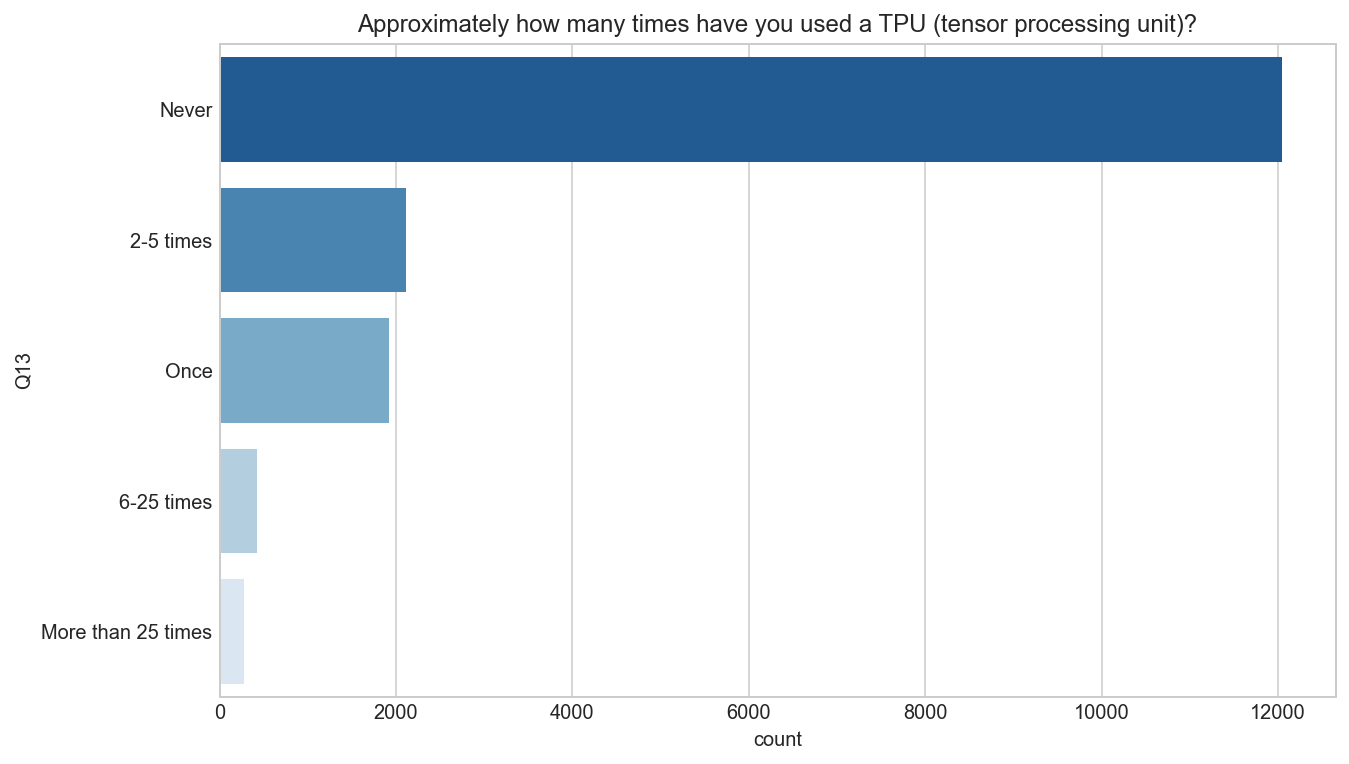

In [148]:
show_plot_by_qno("Q13")

## Q14 🎨 What data visualization libraries or tools do you use on a regular basis? (Select all that apply)

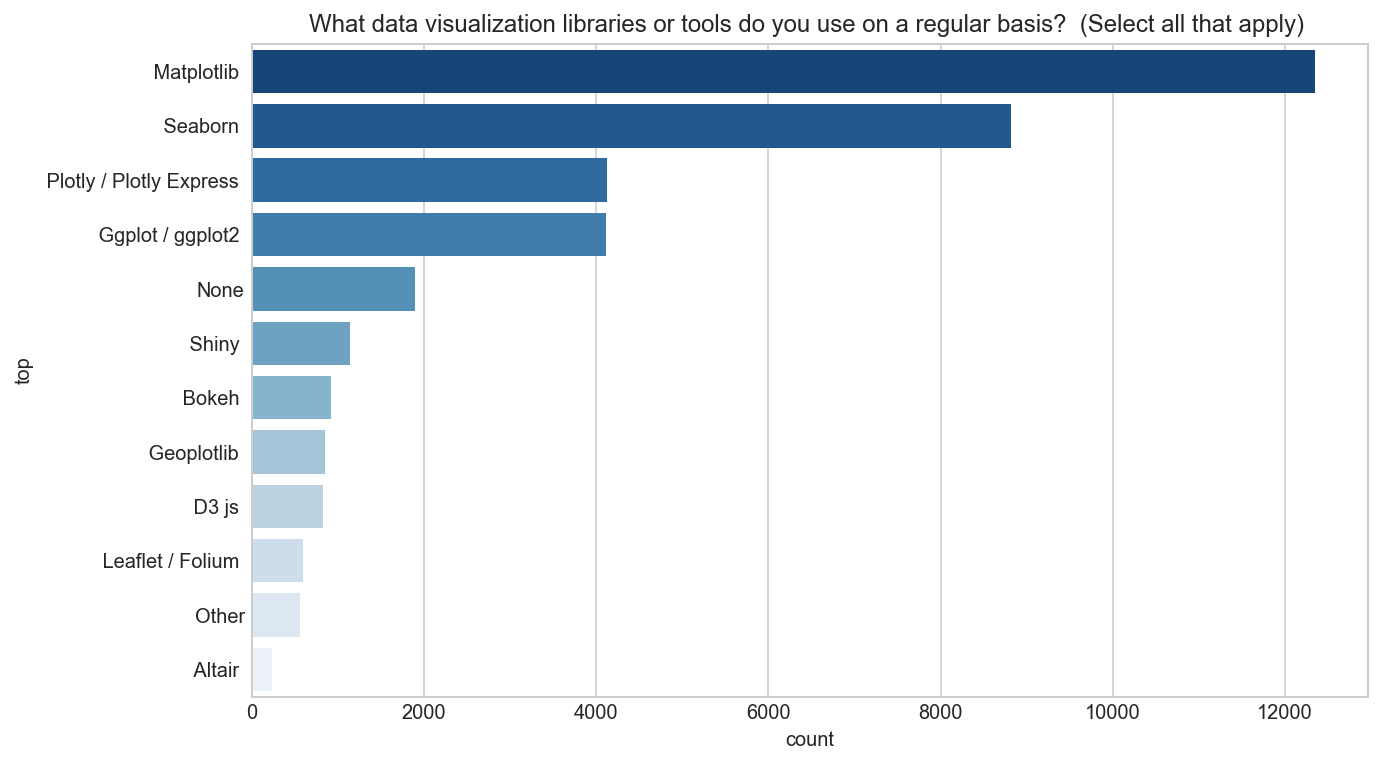

In [149]:
show_plot_by_qno("Q14")

## Q15 For how many years have you used machine learning methods?

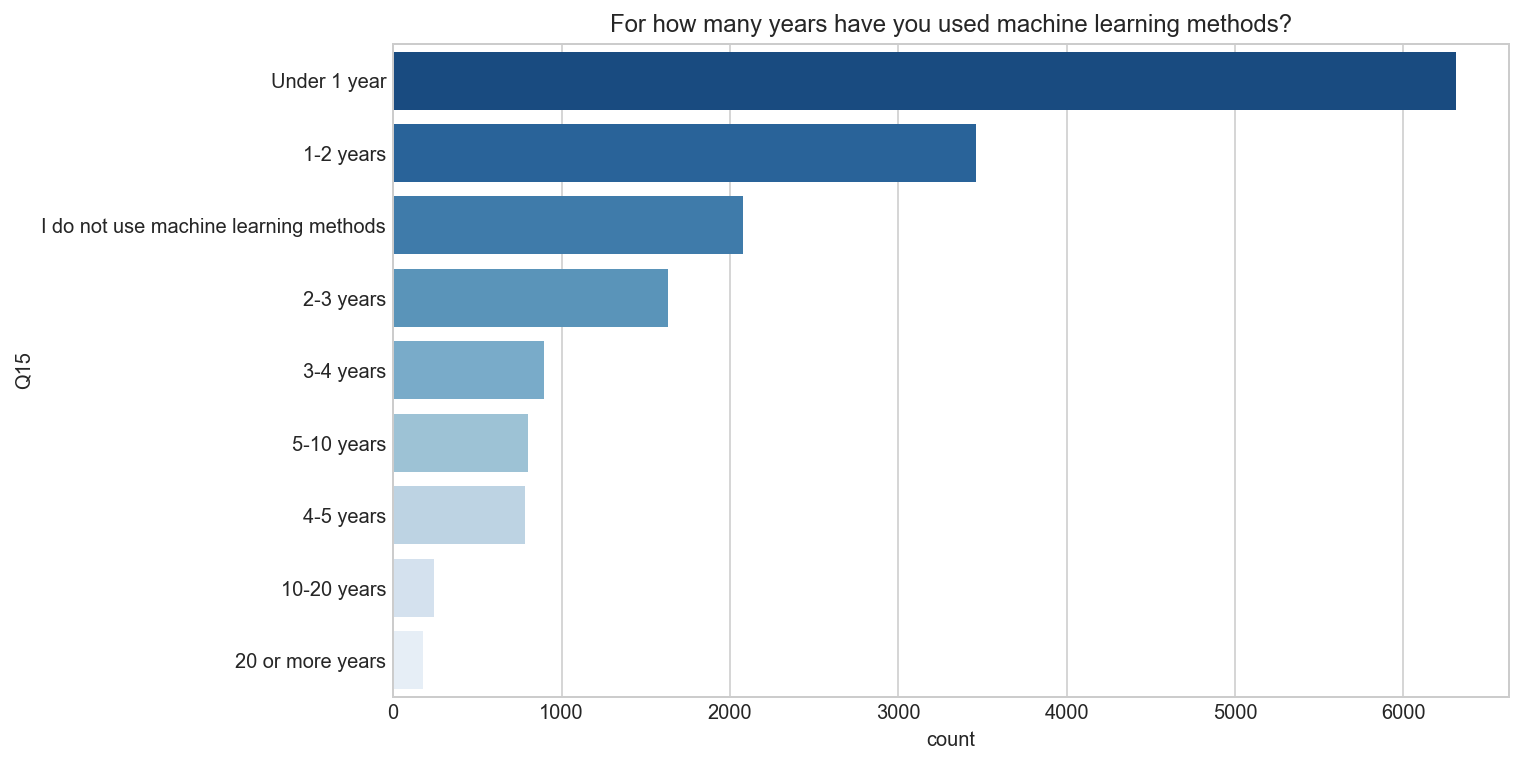

In [150]:
show_plot_by_qno("Q15")

## Q16 Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)

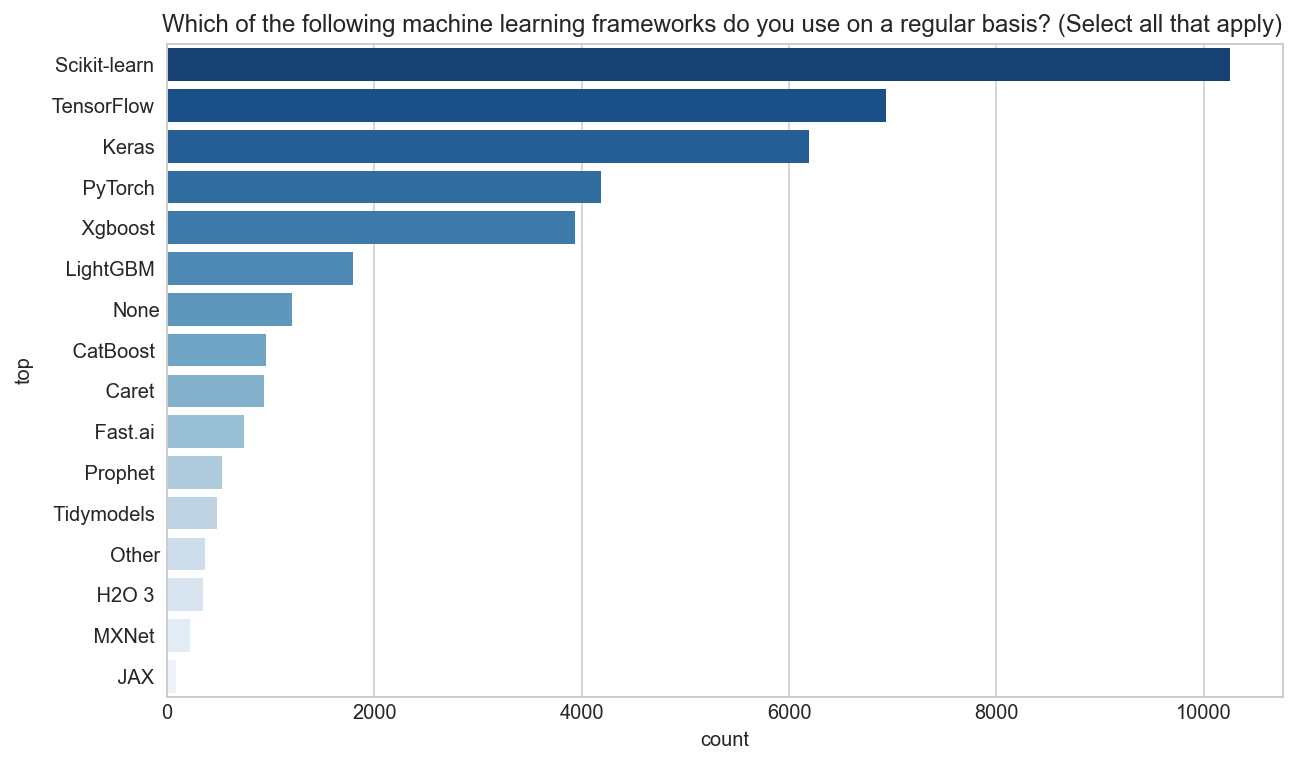

In [151]:
show_plot_by_qno("Q16")

## Q17 Which of the following ML algorithms do you use on a regular basis? (Select all that apply):

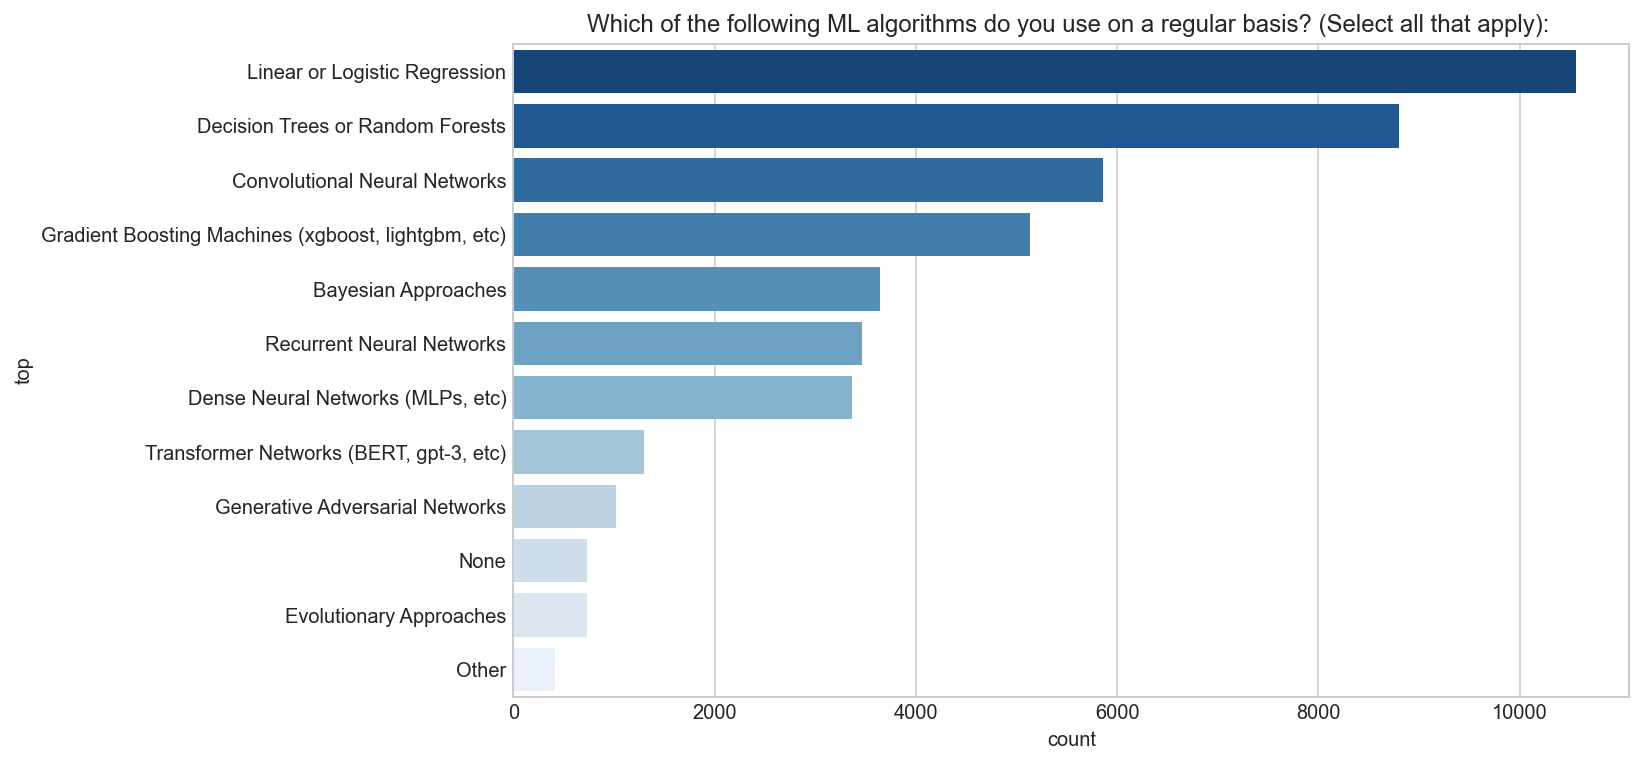

In [152]:
show_plot_by_qno("Q17")

## Q18 Which categories of computer vision methods do you use on a regular basis?  (Select all that apply)

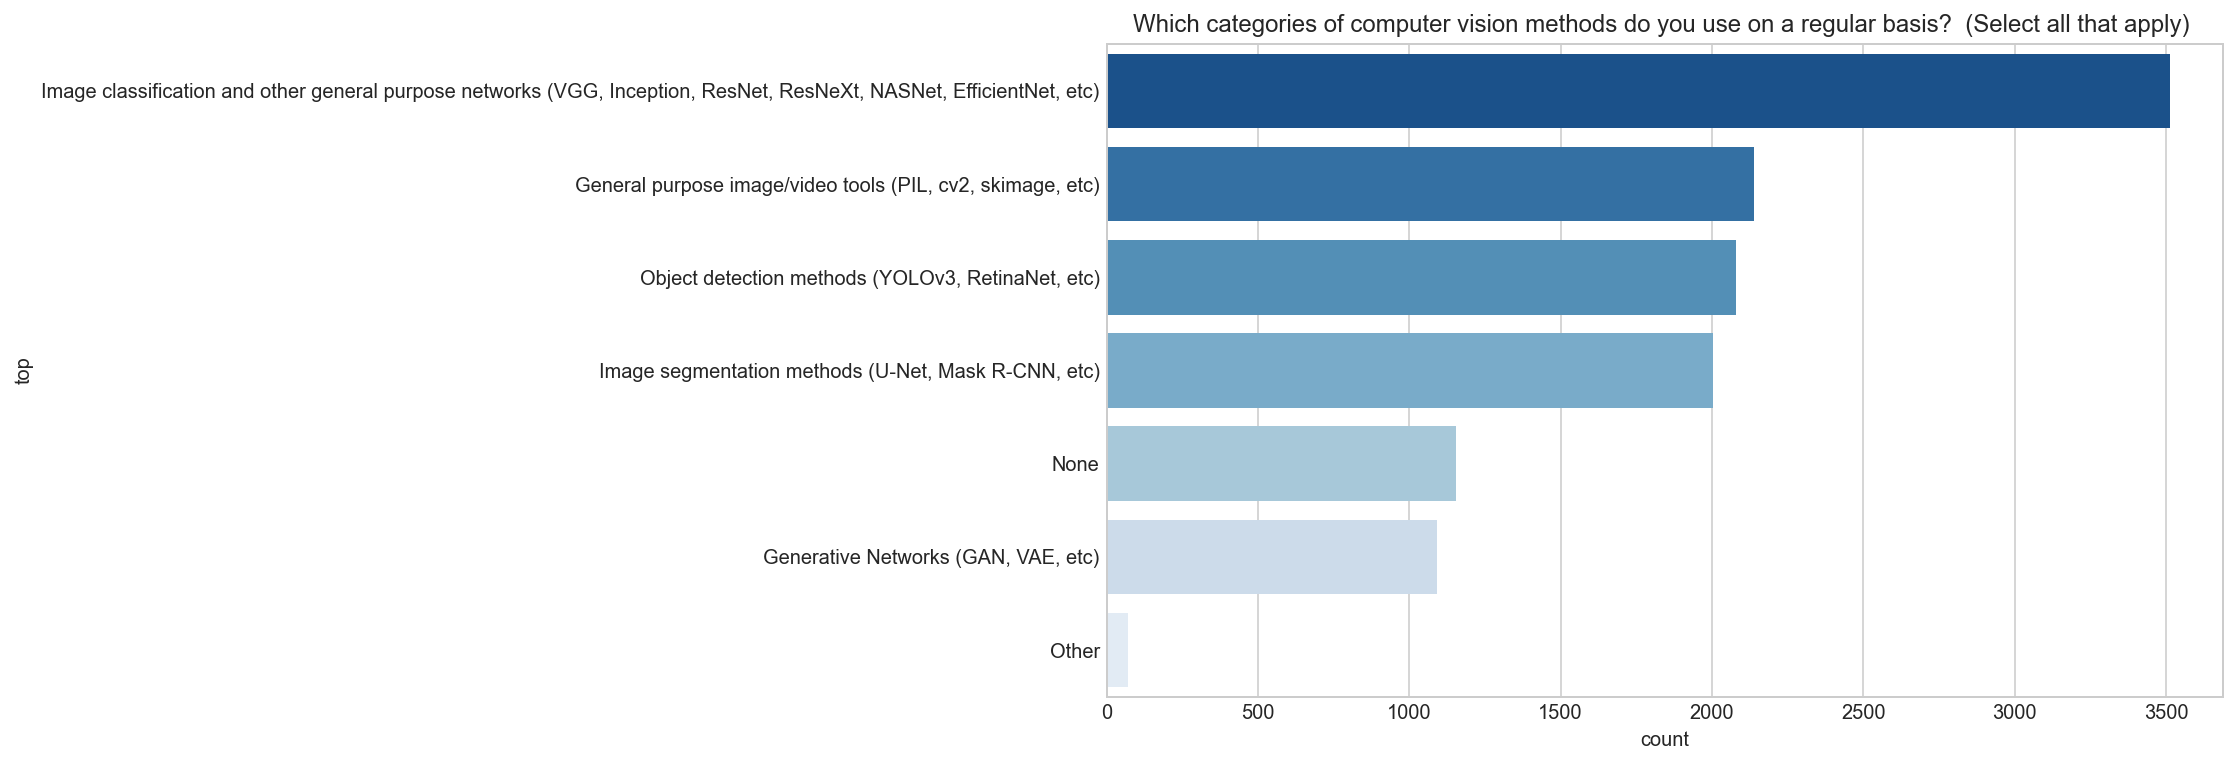

In [153]:
show_plot_by_qno("Q18")

## Q19 📚 Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply)

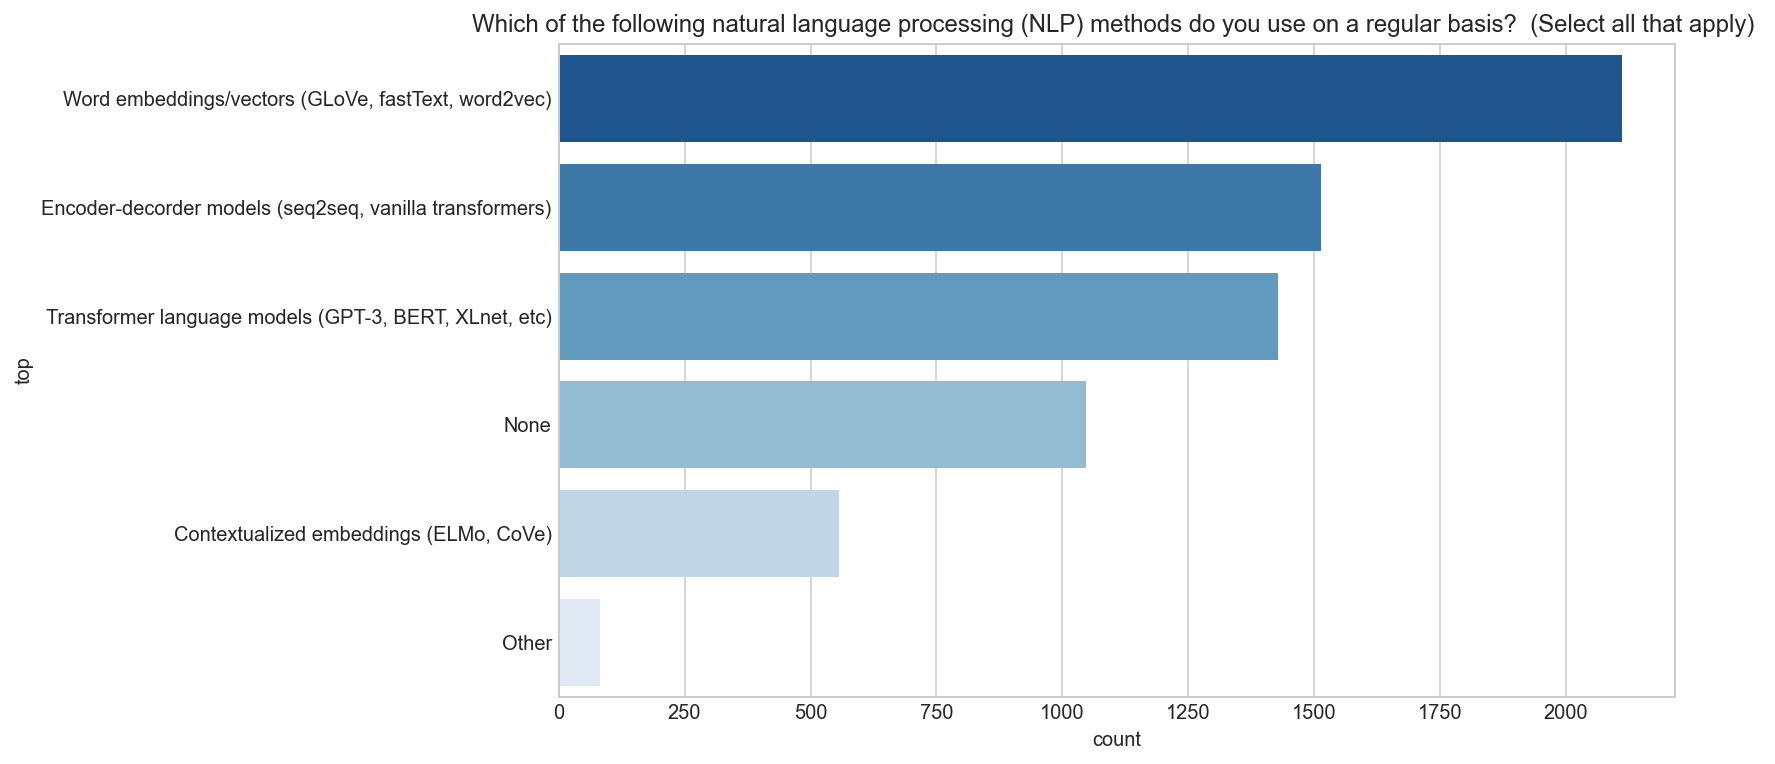

In [154]:
show_plot_by_qno("Q19")

## Q20 🏢 What is the size of the company where you are employed?

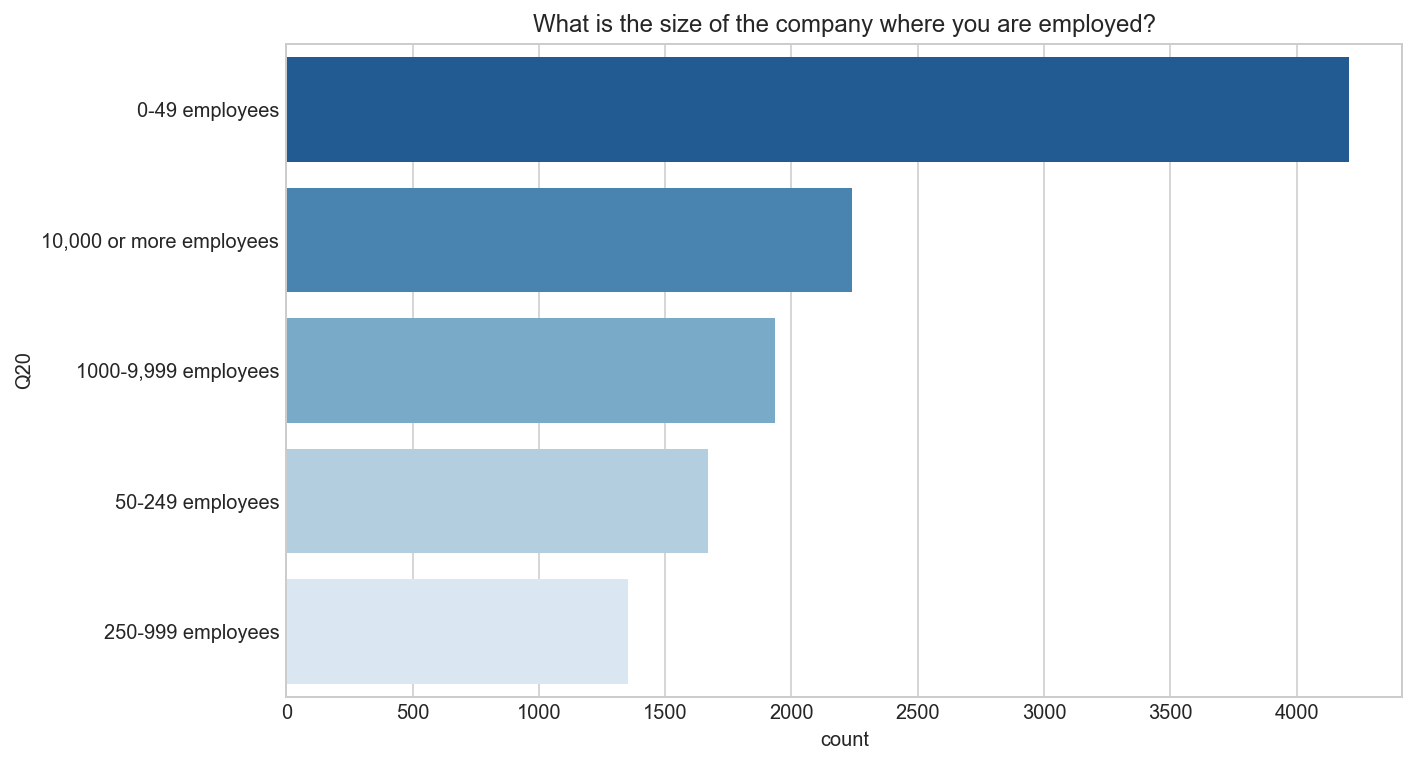

In [155]:
show_plot_by_qno("Q20")

## Q21 Approximately how many individuals are responsible for data science workloads at your place of business?

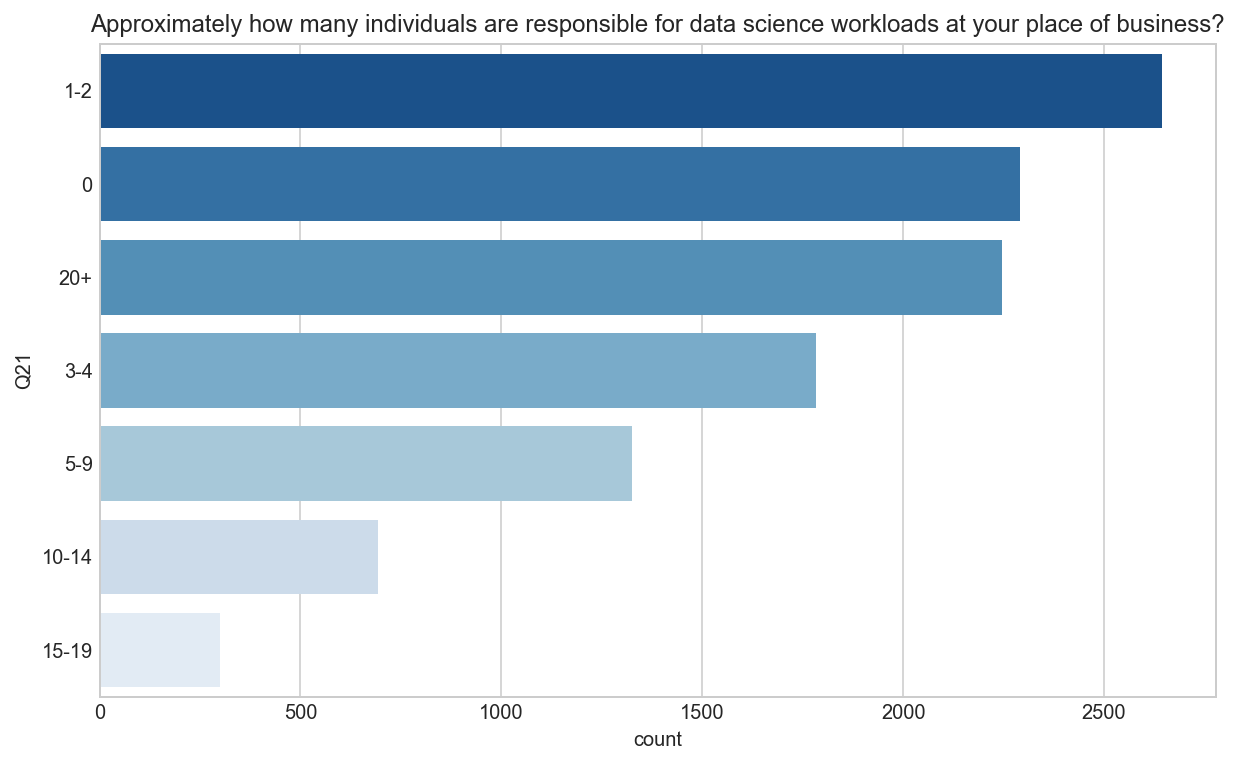

In [156]:
show_plot_by_qno("Q21")

## Q22 Does your current employer incorporate machine learning methods into their business?

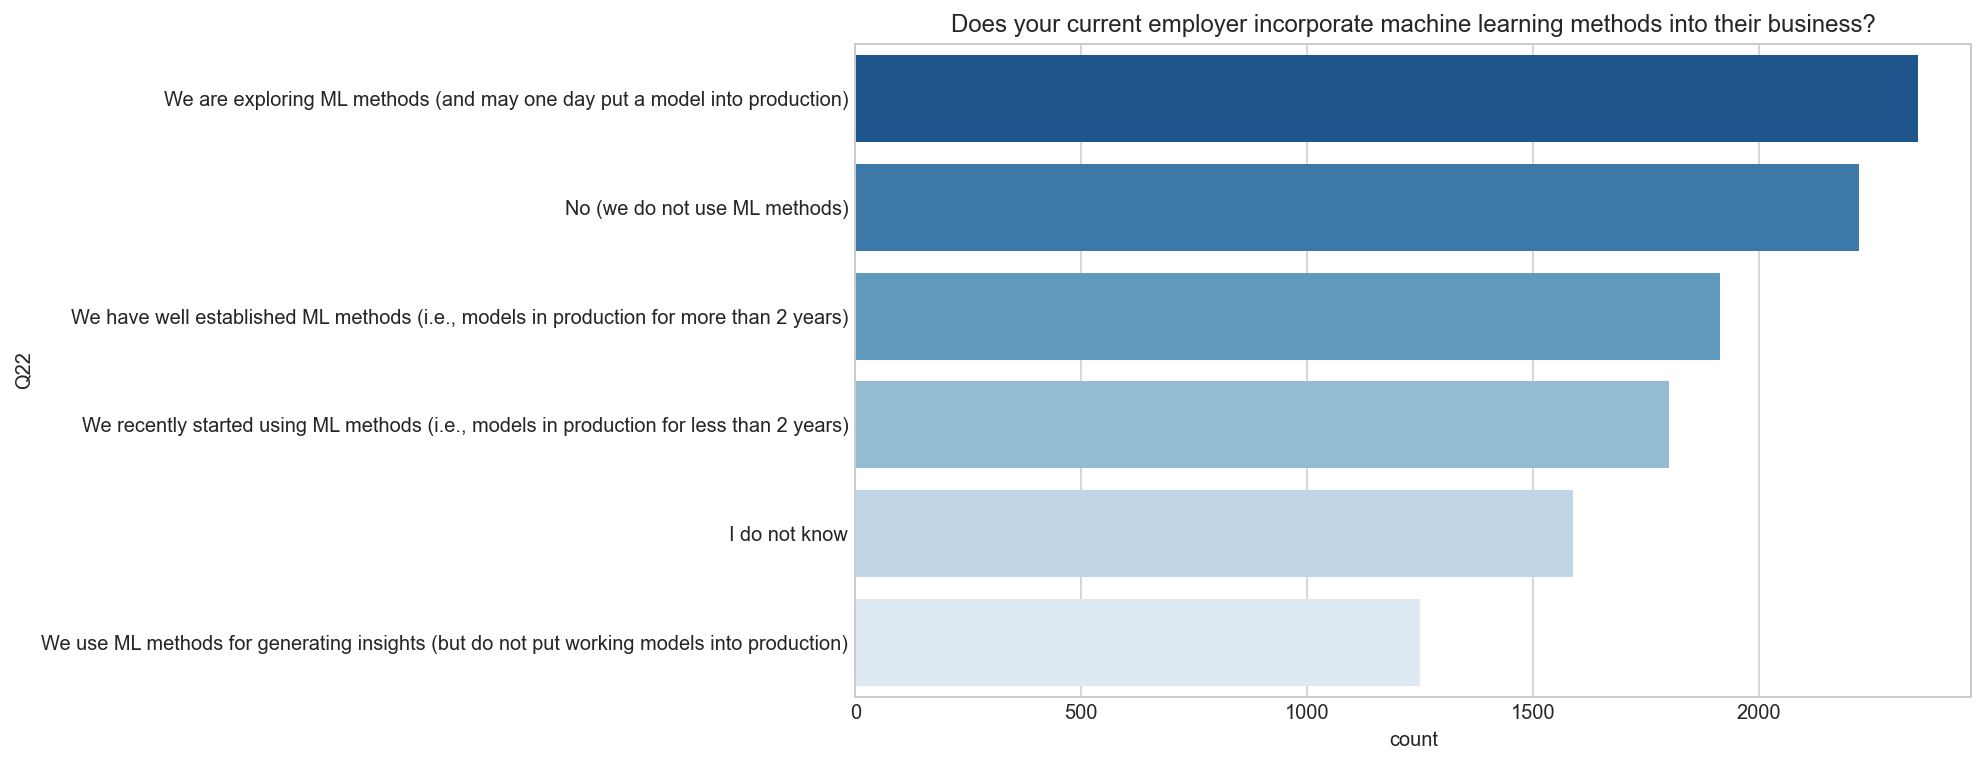

In [157]:
show_plot_by_qno("Q22")

## Q23 Select any activities that make up an important part of your role at work: (Select all that apply) 

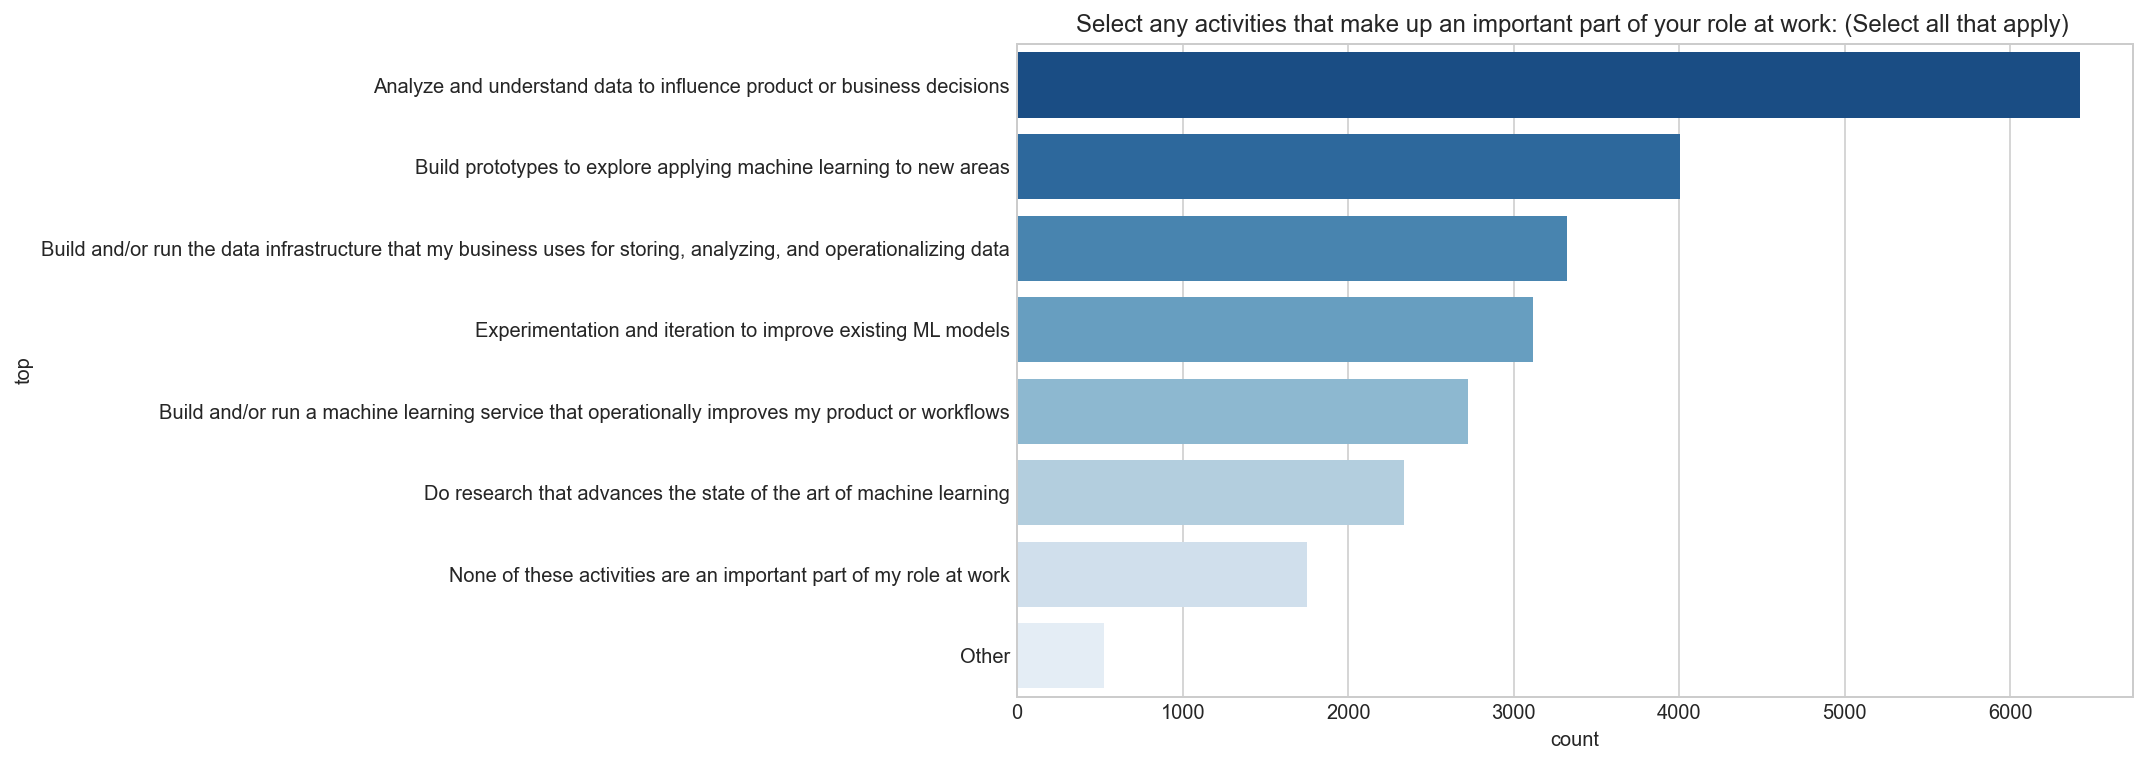

In [158]:
show_plot_by_qno("Q23")

## Q24 What is your current yearly compensation (approximate $USD)

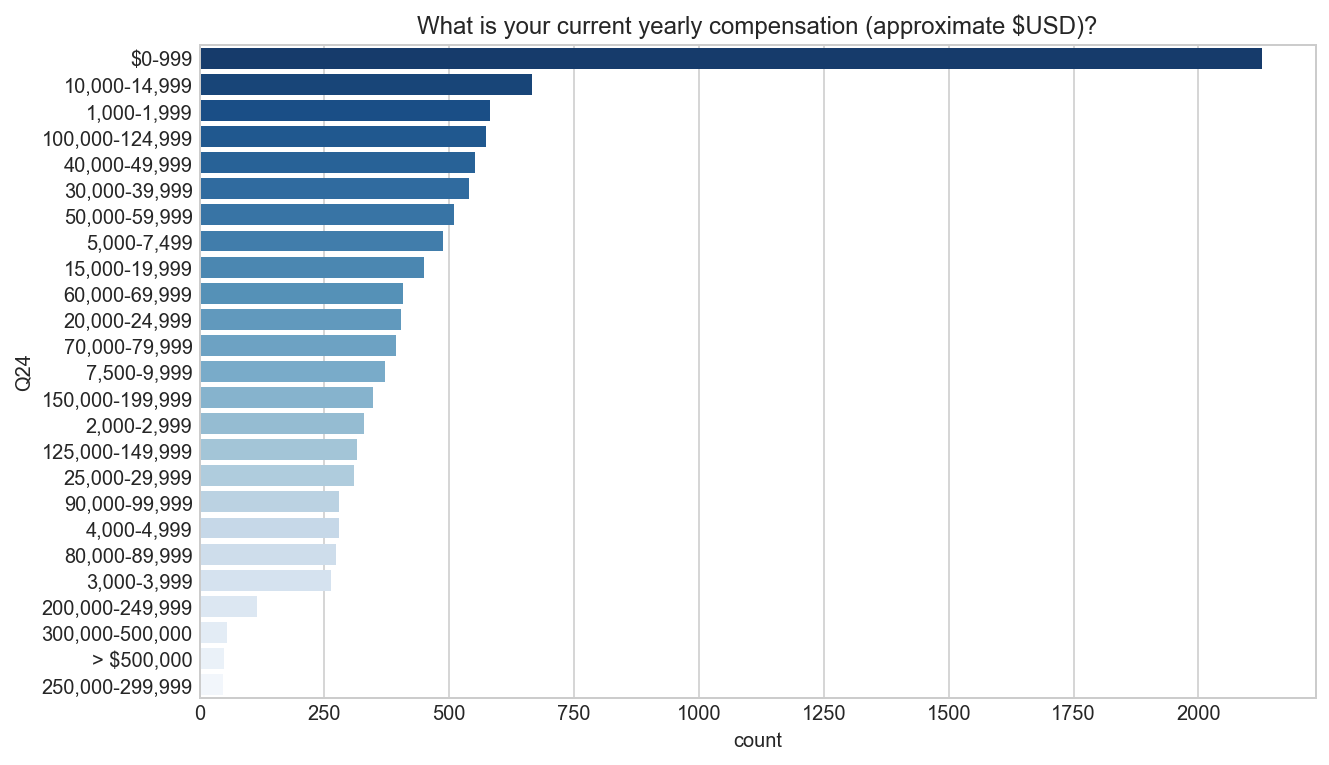

In [159]:
show_plot_by_qno("Q24")

### 임금 순으로 정렬하기

In [160]:
# "빈도수 높은 순서"로 정렬
answer["Q24"].value_counts()

$0-999             2128
10,000-14,999       665
1,000-1,999         581
100,000-124,999     573
40,000-49,999       552
30,000-39,999       540
50,000-59,999       510
5,000-7,499         488
15,000-19,999       449
60,000-69,999       408
20,000-24,999       404
70,000-79,999       394
7,500-9,999         371
150,000-199,999     347
2,000-2,999         330
125,000-149,999     315
25,000-29,999       310
90,000-99,999       280
4,000-4,999         279
80,000-89,999       273
3,000-3,999         264
200,000-249,999     115
300,000-500,000      55
> $500,000           50
250,000-299,999      48
Name: Q24, dtype: int64

In [161]:
# 인덱스 초기화
q24_count = answer["Q24"].value_counts().reset_index()
q24_count

index   Q24
0            $0-999  2128
1     10,000-14,999   665
2       1,000-1,999   581
3   100,000-124,999   573
4     40,000-49,999   552
5     30,000-39,999   540
6     50,000-59,999   510
7       5,000-7,499   488
8     15,000-19,999   449
9     60,000-69,999   408
10    20,000-24,999   404
11    70,000-79,999   394
12      7,500-9,999   371
13  150,000-199,999   347
14      2,000-2,999   330
15  125,000-149,999   315
16    25,000-29,999   310
17    90,000-99,999   280
18      4,000-4,999   279
19    80,000-89,999   273
20      3,000-3,999   264
21  200,000-249,999   115
22  300,000-500,000    55
23       > $500,000    50
24  250,000-299,999    48

In [162]:
# 컬럼명 변경
q24_count.columns = ["range", "count"]
q24_count

range  count
0            $0-999   2128
1     10,000-14,999    665
2       1,000-1,999    581
3   100,000-124,999    573
4     40,000-49,999    552
5     30,000-39,999    540
6     50,000-59,999    510
7       5,000-7,499    488
8     15,000-19,999    449
9     60,000-69,999    408
10    20,000-24,999    404
11    70,000-79,999    394
12      7,500-9,999    371
13  150,000-199,999    347
14      2,000-2,999    330
15  125,000-149,999    315
16    25,000-29,999    310
17    90,000-99,999    280
18      4,000-4,999    279
19    80,000-89,999    273
20      3,000-3,999    264
21  200,000-249,999    115
22  300,000-500,000     55
23       > $500,000     50
24  250,000-299,999     48

#### range로 정렬을 해 보아도, 임금 순으로 정렬이 되지 않는다  
-> range의 값이 숫자가 아닌 문자이기 때문 (가장 앞에 있는 숫자 순서대로 정렬됨)

In [163]:
q24_count.sort_values('range')

range  count
0            $0-999   2128
2       1,000-1,999    581
1     10,000-14,999    665
3   100,000-124,999    573
15  125,000-149,999    315
8     15,000-19,999    449
13  150,000-199,999    347
14      2,000-2,999    330
10    20,000-24,999    404
21  200,000-249,999    115
16    25,000-29,999    310
24  250,000-299,999     48
20      3,000-3,999    264
5     30,000-39,999    540
22  300,000-500,000     55
18      4,000-4,999    279
4     40,000-49,999    552
7       5,000-7,499    488
6     50,000-59,999    510
9     60,000-69,999    408
12      7,500-9,999    371
11    70,000-79,999    394
19    80,000-89,999    273
17    90,000-99,999    280
23       > $500,000     50

#### 임금 순으로 제대로 정렬하기 !

In [164]:
q24_count['range']

0              $0-999
1       10,000-14,999
2         1,000-1,999
3     100,000-124,999
4       40,000-49,999
5       30,000-39,999
6       50,000-59,999
7         5,000-7,499
8       15,000-19,999
9       60,000-69,999
10      20,000-24,999
11      70,000-79,999
12        7,500-9,999
13    150,000-199,999
14        2,000-2,999
15    125,000-149,999
16      25,000-29,999
17      90,000-99,999
18        4,000-4,999
19      80,000-89,999
20        3,000-3,999
21    200,000-249,999
22    300,000-500,000
23         > $500,000
24    250,000-299,999
Name: range, dtype: object

In [165]:
# 문자열인 range 값을 '-'을 기준으로 split해서 리스트로 확인
q24_count['range'].str.split('-')

0              [$0, 999]
1       [10,000, 14,999]
2         [1,000, 1,999]
3     [100,000, 124,999]
4       [40,000, 49,999]
5       [30,000, 39,999]
6       [50,000, 59,999]
7         [5,000, 7,499]
8       [15,000, 19,999]
9       [60,000, 69,999]
10      [20,000, 24,999]
11      [70,000, 79,999]
12        [7,500, 9,999]
13    [150,000, 199,999]
14        [2,000, 2,999]
15    [125,000, 149,999]
16      [25,000, 29,999]
17      [90,000, 99,999]
18        [4,000, 4,999]
19      [80,000, 89,999]
20        [3,000, 3,999]
21    [200,000, 249,999]
22    [300,000, 500,000]
23          [> $500,000]
24    [250,000, 299,999]
Name: range, dtype: object

In [166]:
# split된 값을 나눠서 확인
q24_count['range'].str.split('-', expand=True)

0        1
0           $0      999
1       10,000   14,999
2        1,000    1,999
3      100,000  124,999
4       40,000   49,999
5       30,000   39,999
6       50,000   59,999
7        5,000    7,499
8       15,000   19,999
9       60,000   69,999
10      20,000   24,999
11      70,000   79,999
12       7,500    9,999
13     150,000  199,999
14       2,000    2,999
15     125,000  149,999
16      25,000   29,999
17      90,000   99,999
18       4,000    4,999
19      80,000   89,999
20       3,000    3,999
21     200,000  249,999
22     300,000  500,000
23  > $500,000     None
24     250,000  299,999

In [167]:
# 첫번째 숫자를 컬럼명 'min'으로 q24_count 데이터프레임에 저장
q24_count['min'] = q24_count['range'].str.split('-', expand=True)[0]
q24_count['min']

0             $0
1         10,000
2          1,000
3        100,000
4         40,000
5         30,000
6         50,000
7          5,000
8         15,000
9         60,000
10        20,000
11        70,000
12         7,500
13       150,000
14         2,000
15       125,000
16        25,000
17        90,000
18         4,000
19        80,000
20         3,000
21       200,000
22       300,000
23    > $500,000
24       250,000
Name: min, dtype: object

In [168]:
# 두번째 숫자를 컬럼명 'max'로 q24_count 데이터프레임에 저장
q24_count['max'] = q24_count['range'].str.split('-', expand=True)[1]
q24_count['max']

0         999
1      14,999
2       1,999
3     124,999
4      49,999
5      39,999
6      59,999
7       7,499
8      19,999
9      69,999
10     24,999
11     79,999
12      9,999
13    199,999
14      2,999
15    149,999
16     29,999
17     99,999
18      4,999
19     89,999
20      3,999
21    249,999
22    500,000
23       None
24    299,999
Name: max, dtype: object

In [169]:
# 특수문자 제거 후 int로 형변환
q24_count['min'] = q24_count['min'].str.replace(",|\$|>","").astype(int)
q24_count['min']

C:\Users\dorot\AppData\Local\Temp\ipykernel_20280\3270892360.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  q24_count['min'] = q24_count['min'].str.replace(",|\$|>","").astype(int)


0          0
1      10000
2       1000
3     100000
4      40000
5      30000
6      50000
7       5000
8      15000
9      60000
10     20000
11     70000
12      7500
13    150000
14      2000
15    125000
16     25000
17     90000
18      4000
19     80000
20      3000
21    200000
22    300000
23    500000
24    250000
Name: min, dtype: int32

In [170]:
q24_count

range  count     min      max
0            $0-999   2128       0      999
1     10,000-14,999    665   10000   14,999
2       1,000-1,999    581    1000    1,999
3   100,000-124,999    573  100000  124,999
4     40,000-49,999    552   40000   49,999
5     30,000-39,999    540   30000   39,999
6     50,000-59,999    510   50000   59,999
7       5,000-7,499    488    5000    7,499
8     15,000-19,999    449   15000   19,999
9     60,000-69,999    408   60000   69,999
10    20,000-24,999    404   20000   24,999
11    70,000-79,999    394   70000   79,999
12      7,500-9,999    371    7500    9,999
13  150,000-199,999    347  150000  199,999
14      2,000-2,999    330    2000    2,999
15  125,000-149,999    315  125000  149,999
16    25,000-29,999    310   25000   29,999
17    90,000-99,999    280   90000   99,999
18      4,000-4,999    279    4000    4,999
19    80,000-89,999    273   80000   89,999
20      3,000-3,999    264    3000    3,999
21  200,000-249,999    115  200000  249,999
22  300,000-500,000     55  300000  500,000
23       > $500,000     50  500000     None
24  250,000-299,999     48  250000  299,999

In [171]:
# min값 기준으로 오름차순 정렬
q24_count = q24_count.sort_values('min')
q24_count

range  count     min      max
0            $0-999   2128       0      999
2       1,000-1,999    581    1000    1,999
14      2,000-2,999    330    2000    2,999
20      3,000-3,999    264    3000    3,999
18      4,000-4,999    279    4000    4,999
7       5,000-7,499    488    5000    7,499
12      7,500-9,999    371    7500    9,999
1     10,000-14,999    665   10000   14,999
8     15,000-19,999    449   15000   19,999
10    20,000-24,999    404   20000   24,999
16    25,000-29,999    310   25000   29,999
5     30,000-39,999    540   30000   39,999
4     40,000-49,999    552   40000   49,999
6     50,000-59,999    510   50000   59,999
9     60,000-69,999    408   60000   69,999
11    70,000-79,999    394   70000   79,999
19    80,000-89,999    273   80000   89,999
17    90,000-99,999    280   90000   99,999
3   100,000-124,999    573  100000  124,999
15  125,000-149,999    315  125000  149,999
13  150,000-199,999    347  150000  199,999
21  200,000-249,999    115  200000  249,999
24  250,000-299,999     48  250000  299,999
22  300,000-500,000     55  300000  500,000
23       > $500,000     50  500000     None

#### q24_count를 그래프로 시각화

<AxesSubplot:xlabel='count', ylabel='range'>

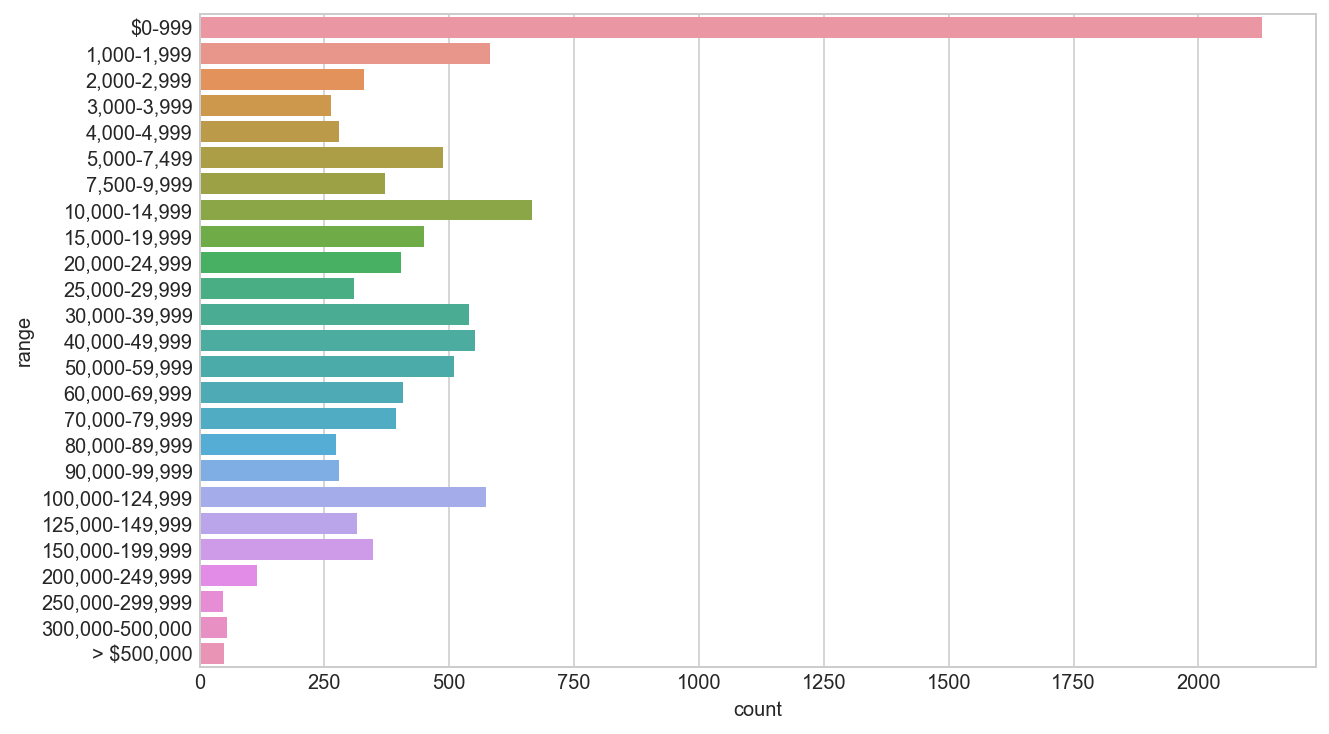

In [172]:
plt.figure(figsize=(10, 6))
sns.barplot(data=q24_count, x='count', y='range')

#### 국가별 임금 확인해보기

In [173]:
# 국가를 물어보는 질문이 무엇인지 확인 -> Q3
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [174]:
# Q3에 대한 answer값을 빈도 높은 순으로 확인
answer['Q3'].value_counts()

India                                                   5851
United States of America                                2237
Other                                                   1388
Brazil                                                   694
Japan                                                    638
Russia                                                   582
United Kingdom of Great Britain and Northern Ireland     489
Nigeria                                                  476
China                                                    474
Germany                                                  404
Turkey                                                   344
Spain                                                    336
France                                                   330
Canada                                                   301
Indonesia                                                290
Pakistan                                                 283
Italy                   

In [175]:
# USA로 응답한 답만 가져오기
q3_usa = answer[answer['Q3'].isin(['United States of America'])]
q3_usa.head()

Time from Start to Finish (seconds)     Q1     Q2  \
2                               289287  30-34    Man   
4                                  507  30-34    Man   
12                                 742  35-39    Man   
25                                 571  50-54    Man   
26                                 723  25-29  Woman   

                          Q3               Q4                  Q5          Q6  \
2   United States of America  Master’s degree       Data Engineer  5-10 years   
4   United States of America  Master’s degree      Data Scientist  5-10 years   
12  United States of America  Doctoral degree  Research Scientist   1-2 years   
25  United States of America  Master’s degree   Software Engineer   20+ years   
26  United States of America  Master’s degree             Student   1-2 years   

   Q7_Part_1 Q7_Part_2 Q7_Part_3  ...        Q35_B_Part_2 Q35_B_Part_3  \
2     Python         R       SQL  ...                 NaN          NaN   
4     Python       NaN       SQL  ...                 NaN          NaN   
12       NaN         R       NaN  ...                 NaN          NaN   
25    Python       NaN       NaN  ...                 NaN          NaN   
26    Python         R       NaN  ...   Weights & Biases           NaN   

   Q35_B_Part_4 Q35_B_Part_5 Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8  \
2           NaN          NaN          NaN          NaN          NaN   
4           NaN          NaN          NaN          NaN          NaN   
12          NaN          NaN          NaN          NaN          NaN   
25          NaN          NaN          NaN          NaN          NaN   
26          NaN          NaN          NaN          NaN          NaN   

   Q35_B_Part_9 Q35_B_Part_10 Q35_B_OTHER  
2           NaN           NaN         NaN  
4           NaN           NaN         NaN  
12          NaN           NaN         NaN  
25          NaN          None         NaN  
26          NaN           NaN         NaN  

[5 rows x 355 columns]

<AxesSubplot:xlabel='count', ylabel='Q24'>

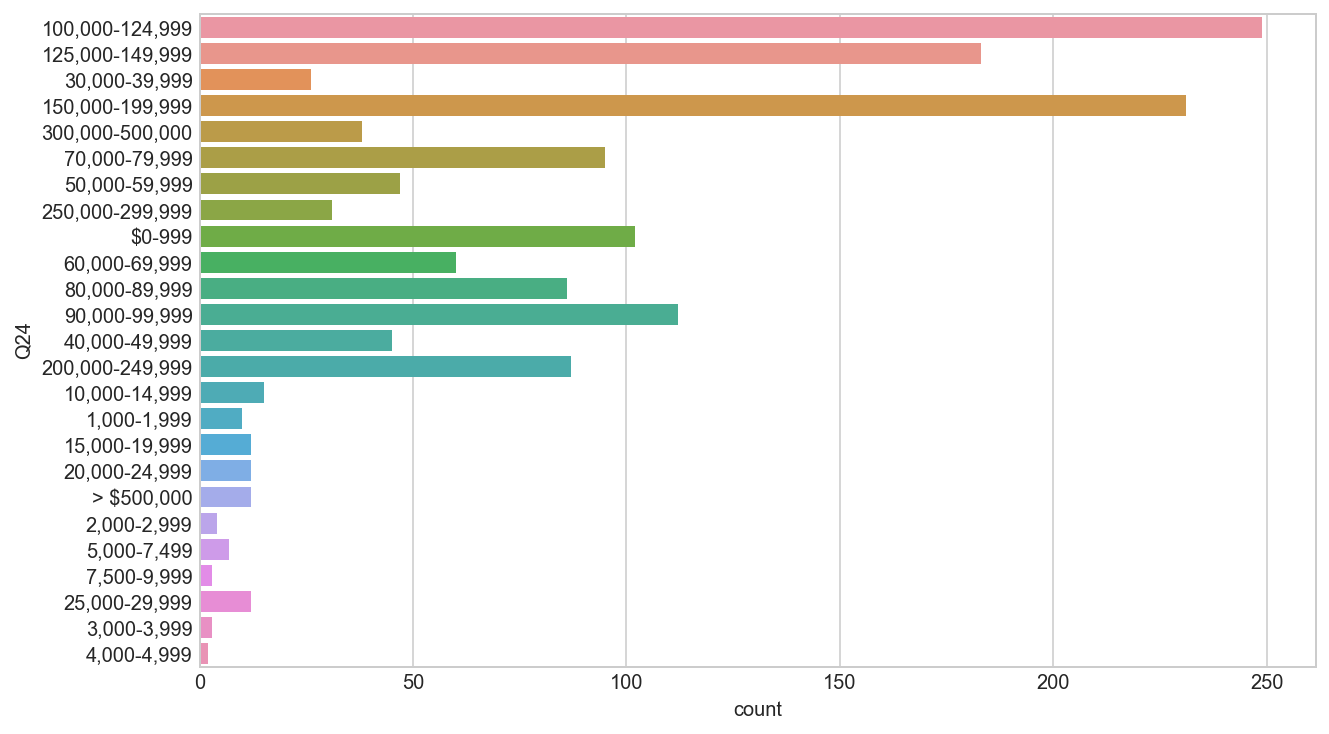

In [176]:
# 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=q3_usa, y='Q24')

#### 임금 순으로 정렬

In [177]:
q24_count

range  count     min      max
0            $0-999   2128       0      999
2       1,000-1,999    581    1000    1,999
14      2,000-2,999    330    2000    2,999
20      3,000-3,999    264    3000    3,999
18      4,000-4,999    279    4000    4,999
7       5,000-7,499    488    5000    7,499
12      7,500-9,999    371    7500    9,999
1     10,000-14,999    665   10000   14,999
8     15,000-19,999    449   15000   19,999
10    20,000-24,999    404   20000   24,999
16    25,000-29,999    310   25000   29,999
5     30,000-39,999    540   30000   39,999
4     40,000-49,999    552   40000   49,999
6     50,000-59,999    510   50000   59,999
9     60,000-69,999    408   60000   69,999
11    70,000-79,999    394   70000   79,999
19    80,000-89,999    273   80000   89,999
17    90,000-99,999    280   90000   99,999
3   100,000-124,999    573  100000  124,999
15  125,000-149,999    315  125000  149,999
13  150,000-199,999    347  150000  199,999
21  200,000-249,999    115  200000  249,999
24  250,000-299,999     48  250000  299,999
22  300,000-500,000     55  300000  500,000
23       > $500,000     50  500000     None

In [178]:
# 임금 range를 리스트로 저장
q24_cols = q24_count.range.tolist()
q24_cols

['$0-999',
 '1,000-1,999',
 '2,000-2,999',
 '3,000-3,999',
 '4,000-4,999',
 '5,000-7,499',
 '7,500-9,999',
 '10,000-14,999',
 '15,000-19,999',
 '20,000-24,999',
 '25,000-29,999',
 '30,000-39,999',
 '40,000-49,999',
 '50,000-59,999',
 '60,000-69,999',
 '70,000-79,999',
 '80,000-89,999',
 '90,000-99,999',
 '100,000-124,999',
 '125,000-149,999',
 '150,000-199,999',
 '200,000-249,999',
 '250,000-299,999',
 '300,000-500,000',
 '> $500,000']

<AxesSubplot:xlabel='count', ylabel='Q24'>

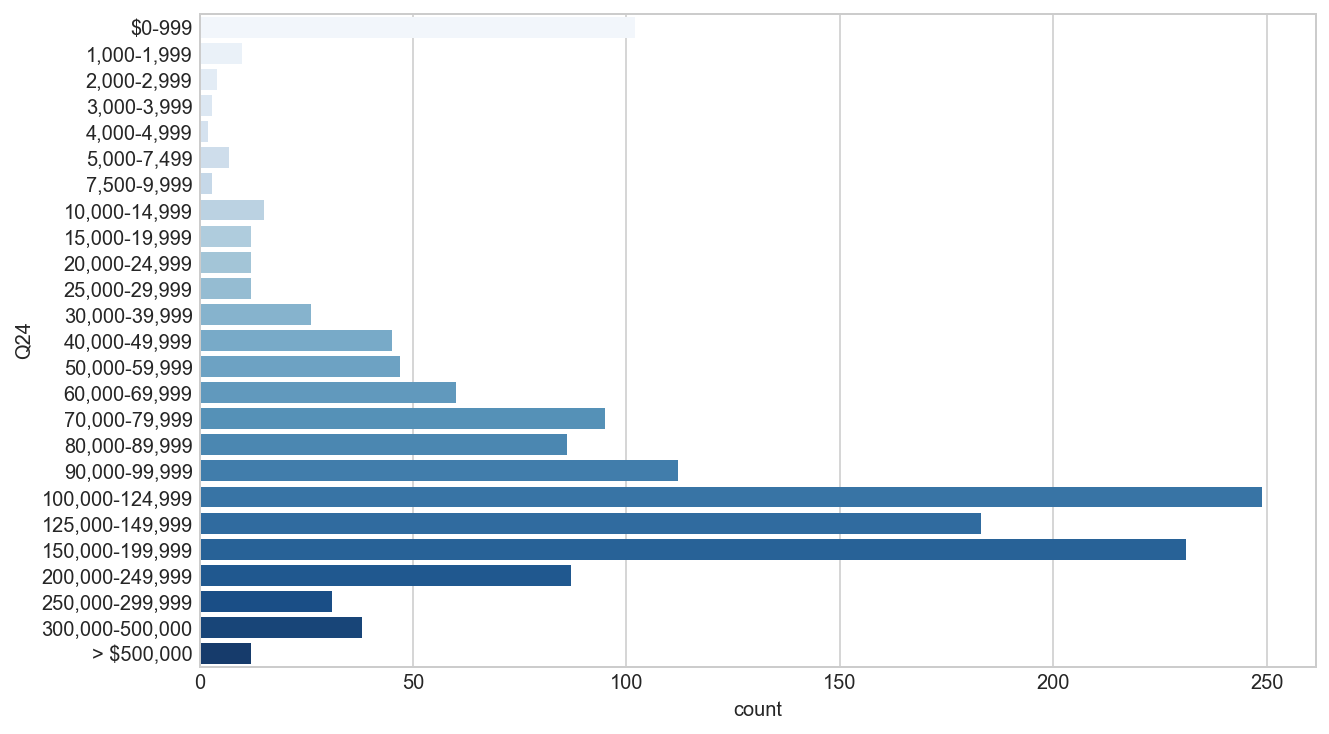

In [179]:
q3_usa = answer[answer['Q3'].isin(['United States of America'])]
plt.figure(figsize=(10, 6))
sns.countplot(data=q3_usa, y='Q24', order=q24_cols, palette = 'Blues')

<AxesSubplot:xlabel='count', ylabel='Q24'>

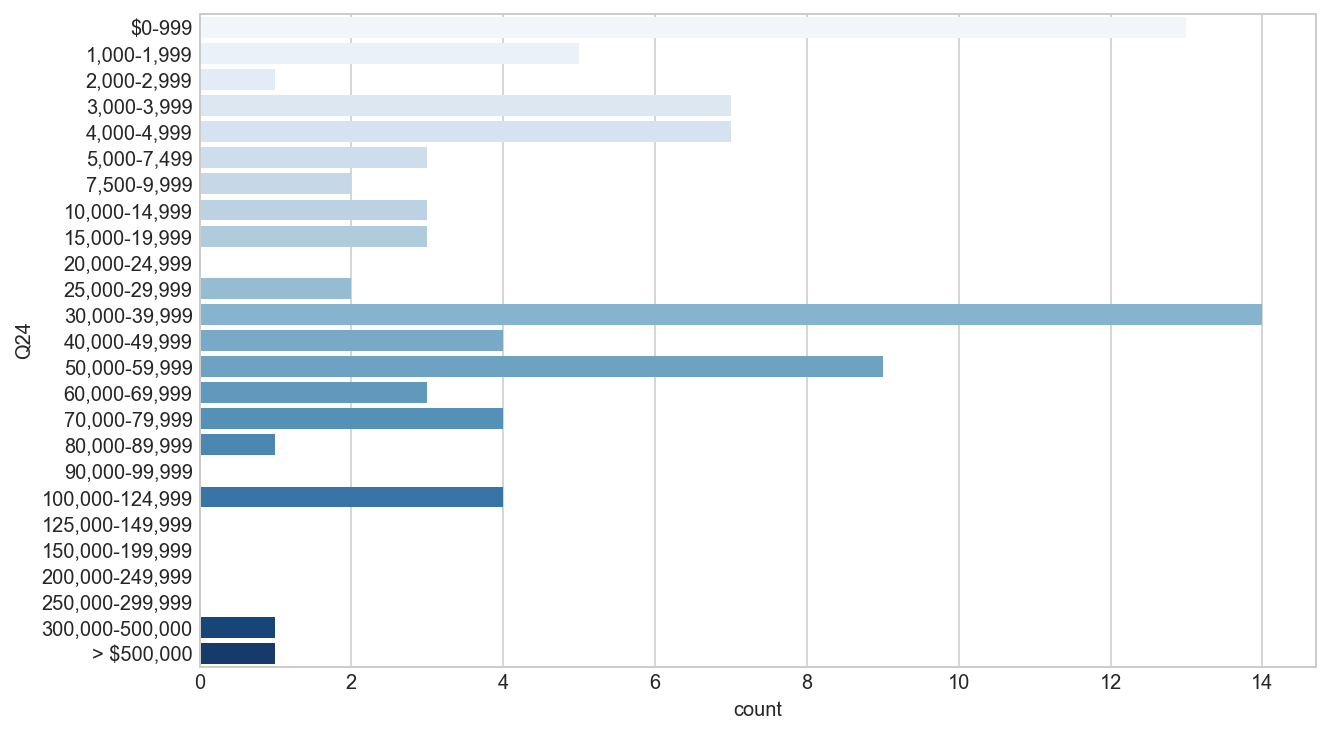

In [180]:
# 대한민국의 임금
q3_usa = answer[answer['Q3'].isin(['South Korea'])]
plt.figure(figsize=(10, 6))
sns.countplot(data=q3_usa, y='Q24', order=q24_cols, palette = 'Blues')

<AxesSubplot:xlabel='count', ylabel='Q24'>

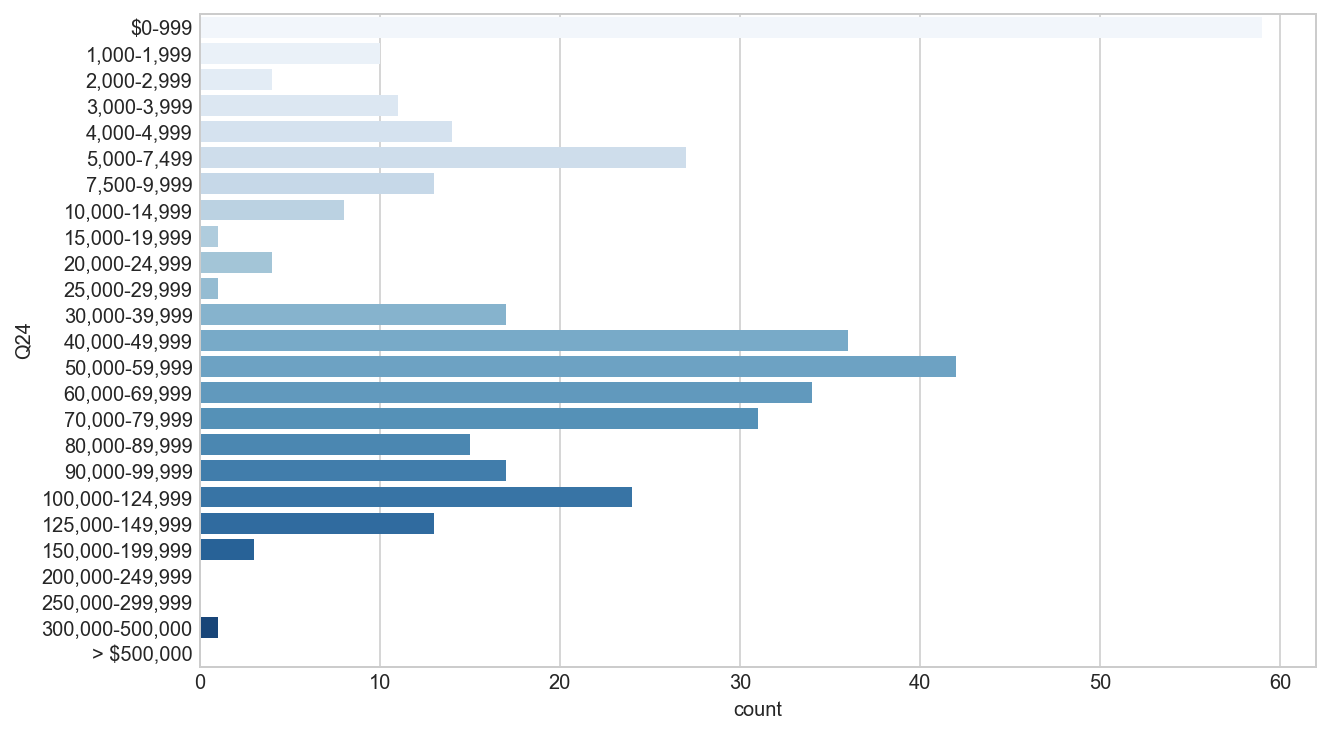

In [181]:
# 일본의 임금
q3_usa = answer[answer['Q3'].isin(['Japan'])]
plt.figure(figsize=(10, 6))
sns.countplot(data=q3_usa, y='Q24', order=q24_cols, palette = 'Blues')

<AxesSubplot:xlabel='count', ylabel='Q24'>

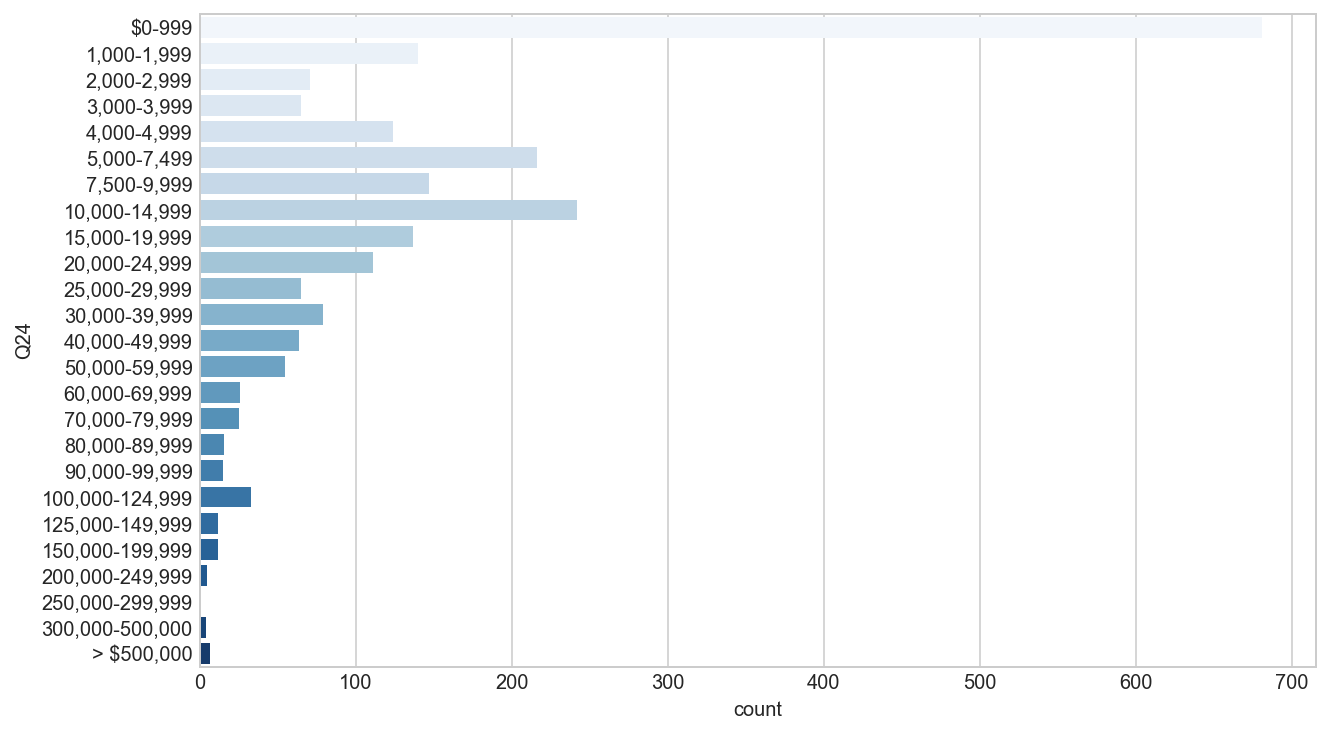

In [182]:
# 인도 임금
q3_usa = answer[answer['Q3'].isin(['India'])]
plt.figure(figsize=(10, 6))
sns.countplot(data=q3_usa, y='Q24', order=q24_cols, palette = 'Blues')

## Q25 Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?

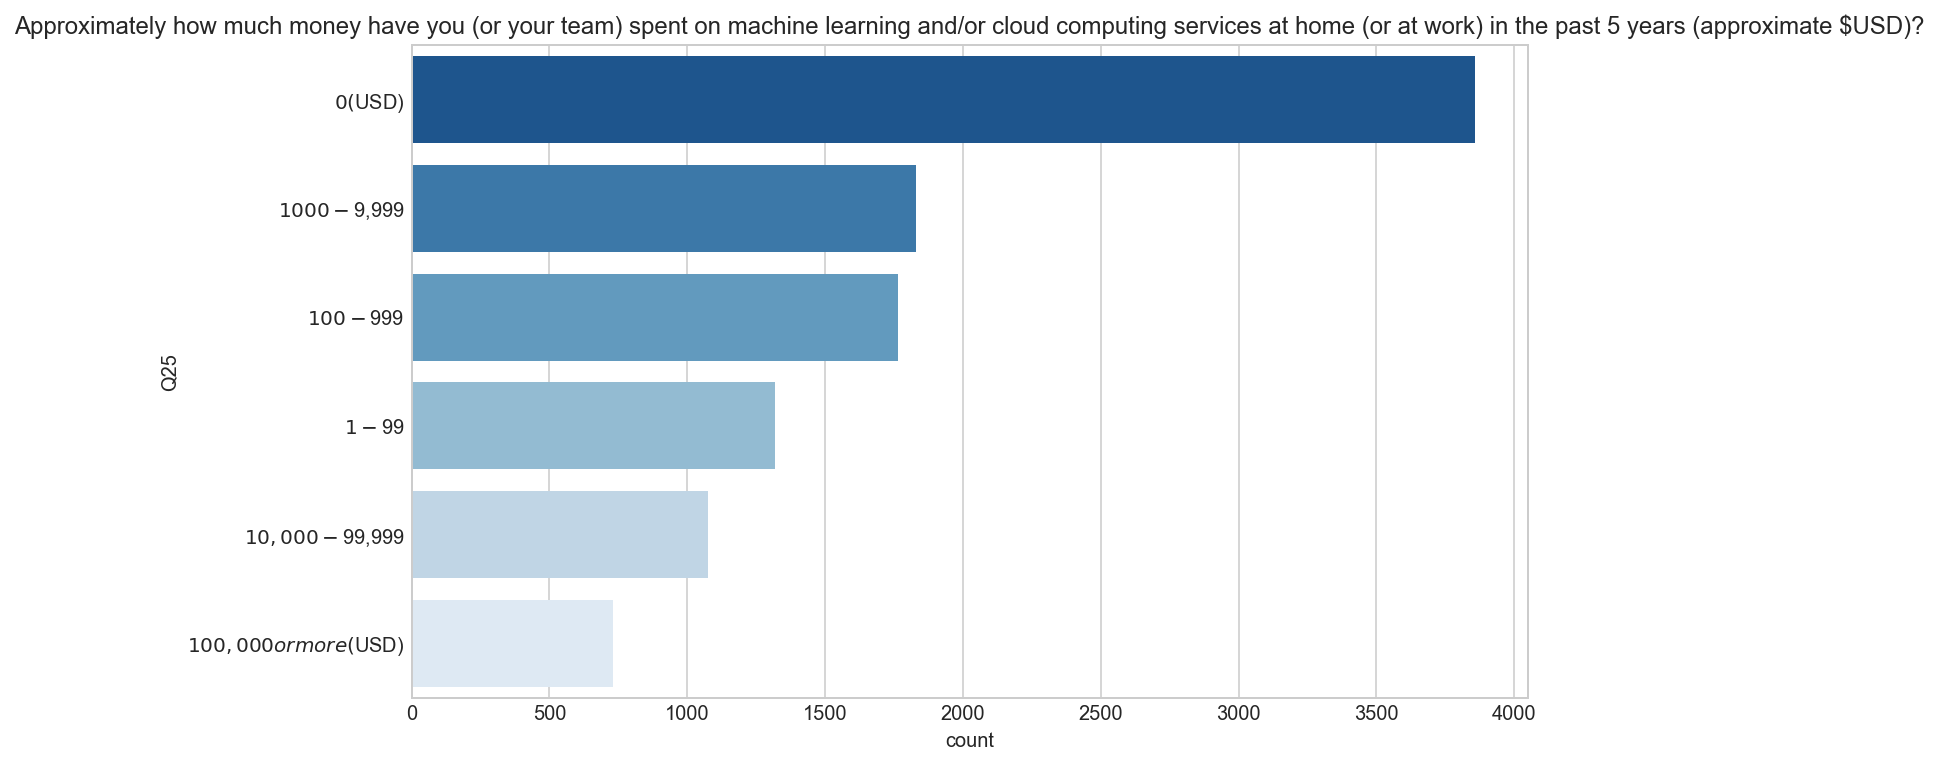

In [183]:
show_plot_by_qno("Q25")

## Q26 cloud computing platforms

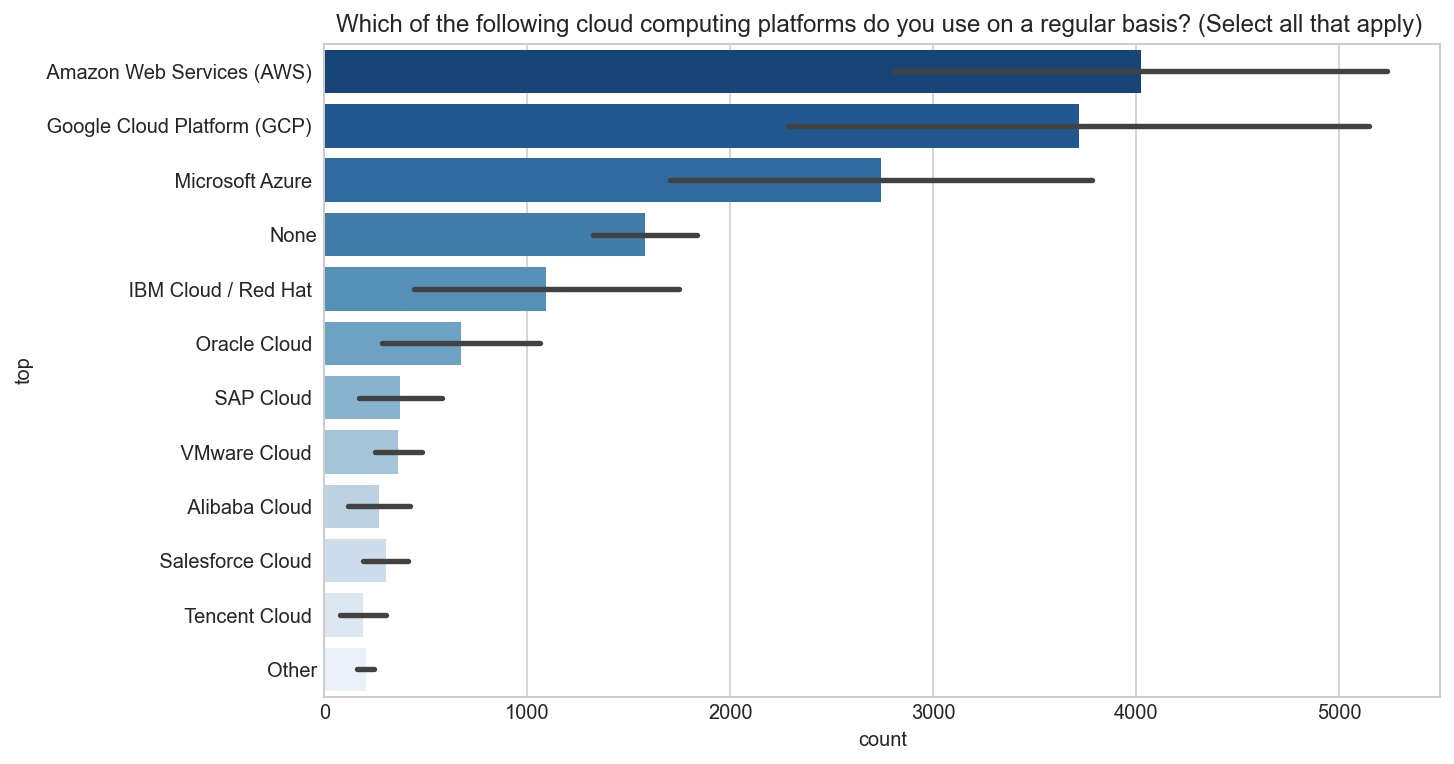

In [184]:
show_plot_by_qno("Q26")

### Q26_A Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply)

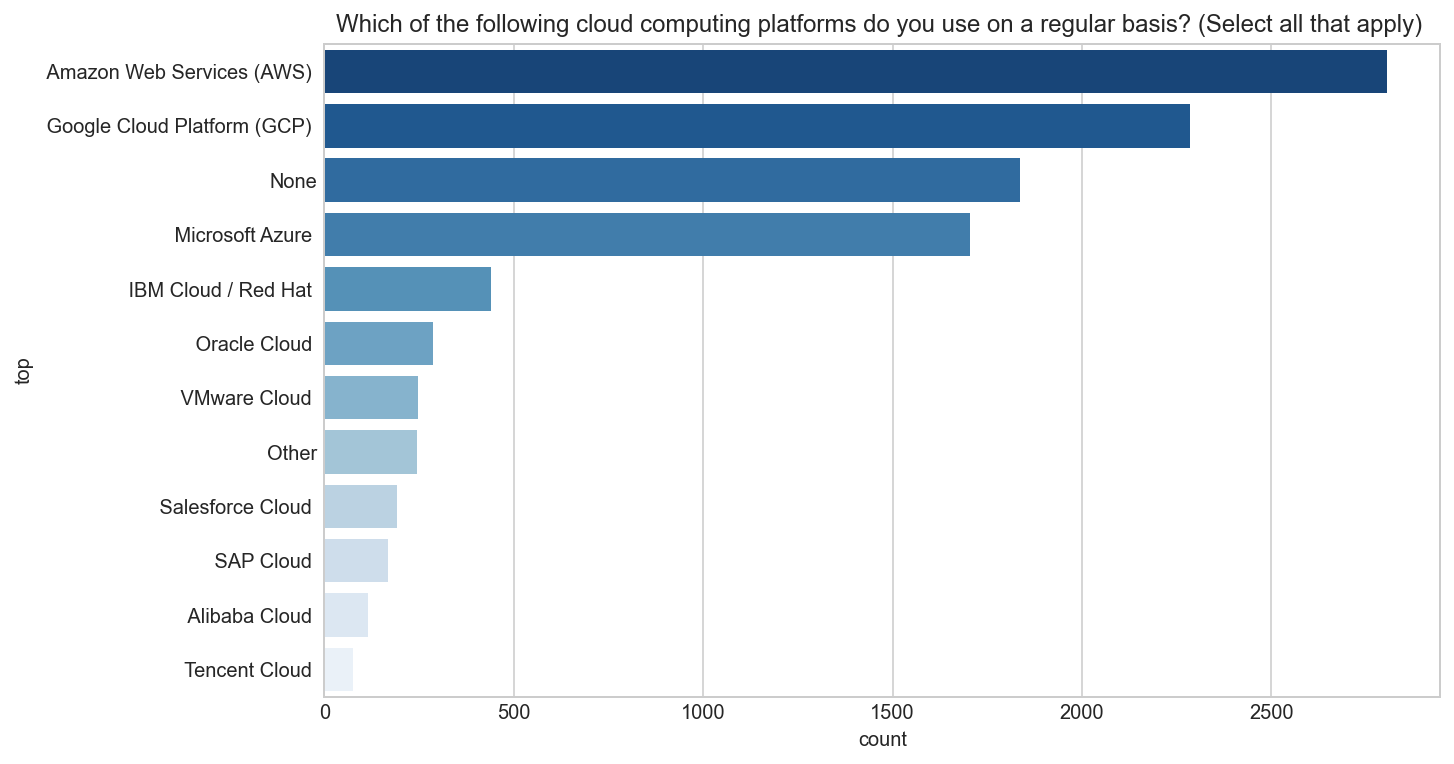

In [185]:
show_plot_by_qno("Q26_A")

### Q26_B Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?

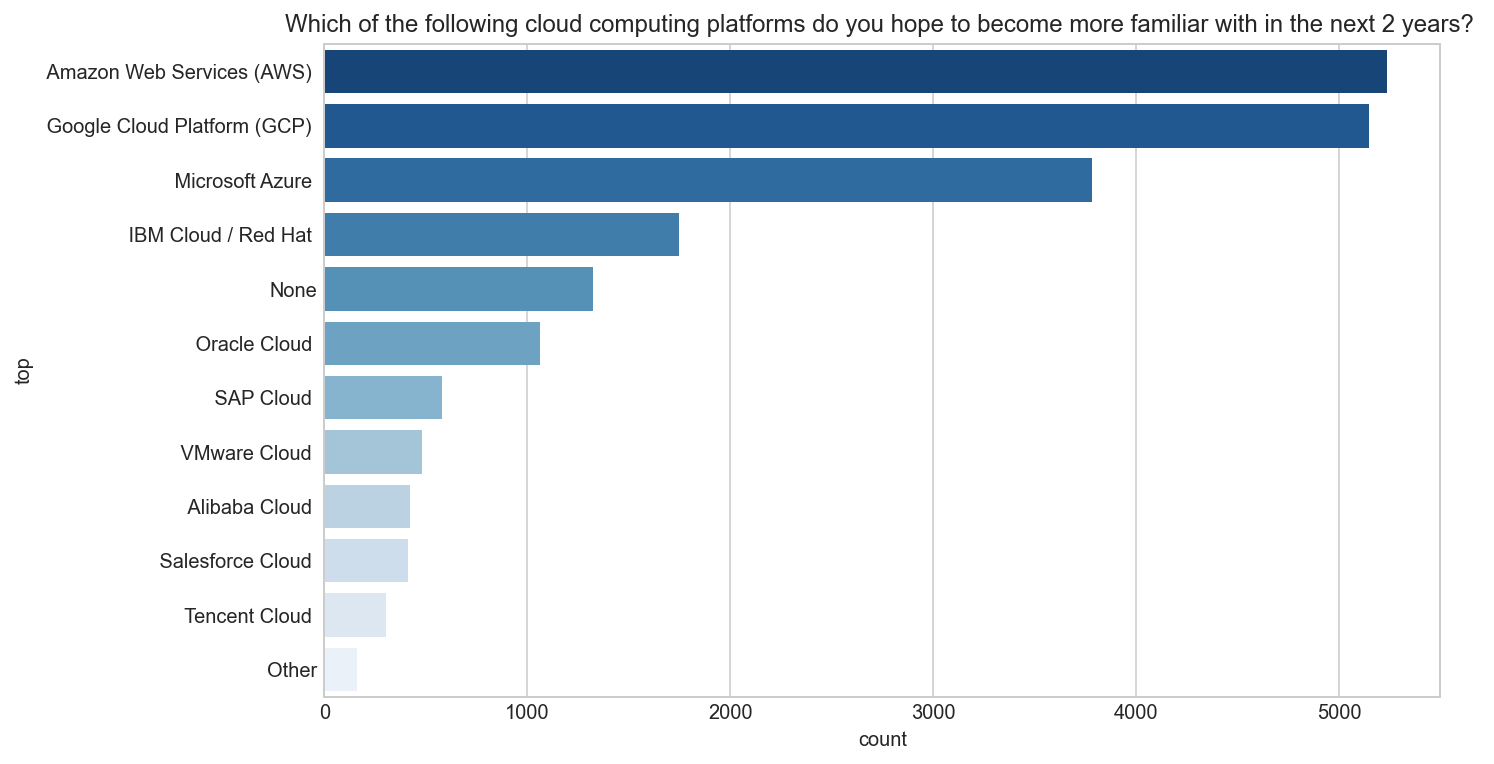

In [186]:
show_plot_by_qno("Q26_B")

## Q27 cloud computing products

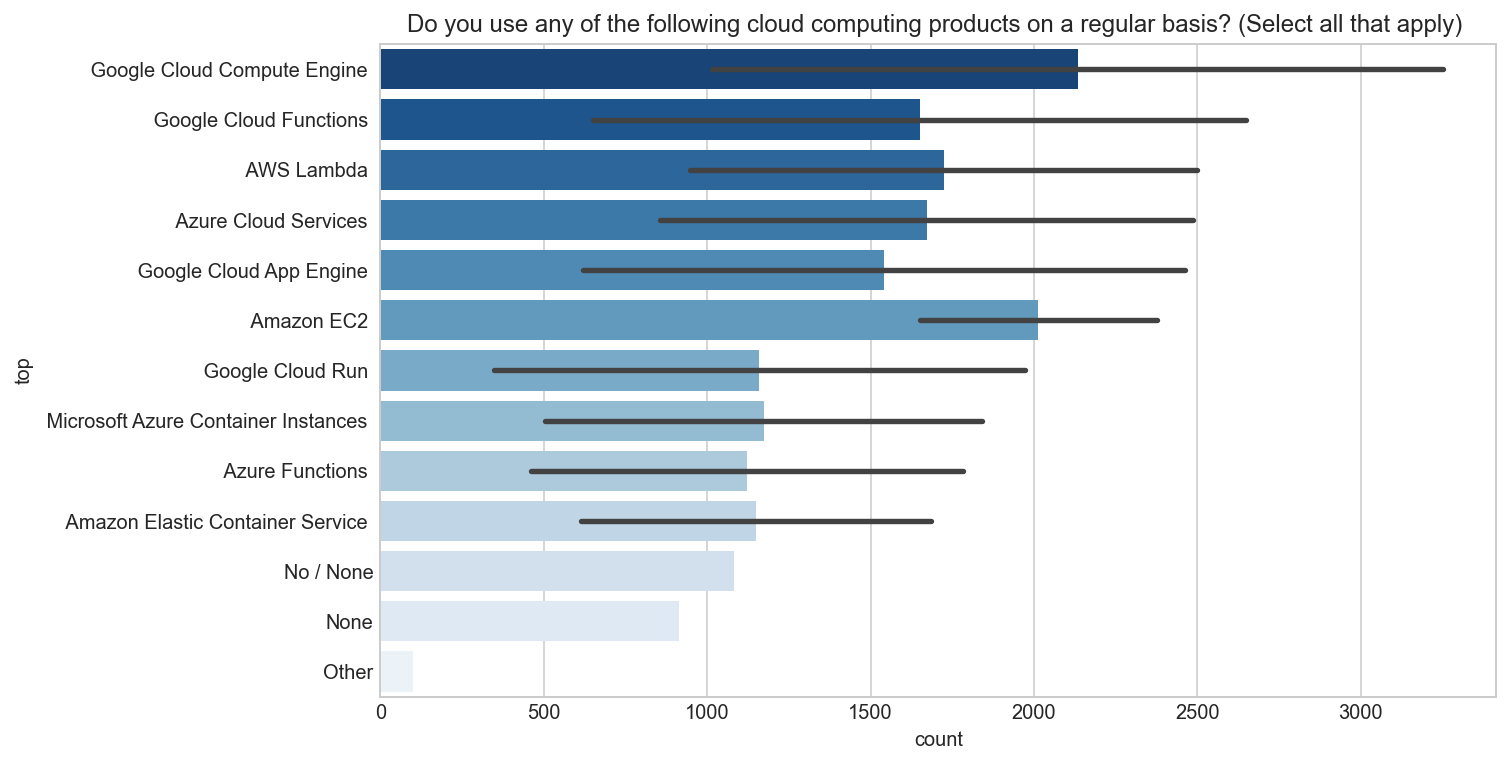

In [187]:
show_plot_by_qno("Q27")

### Q27_A Do you use any of the following cloud computing products on a regular basis? (Select all that apply)

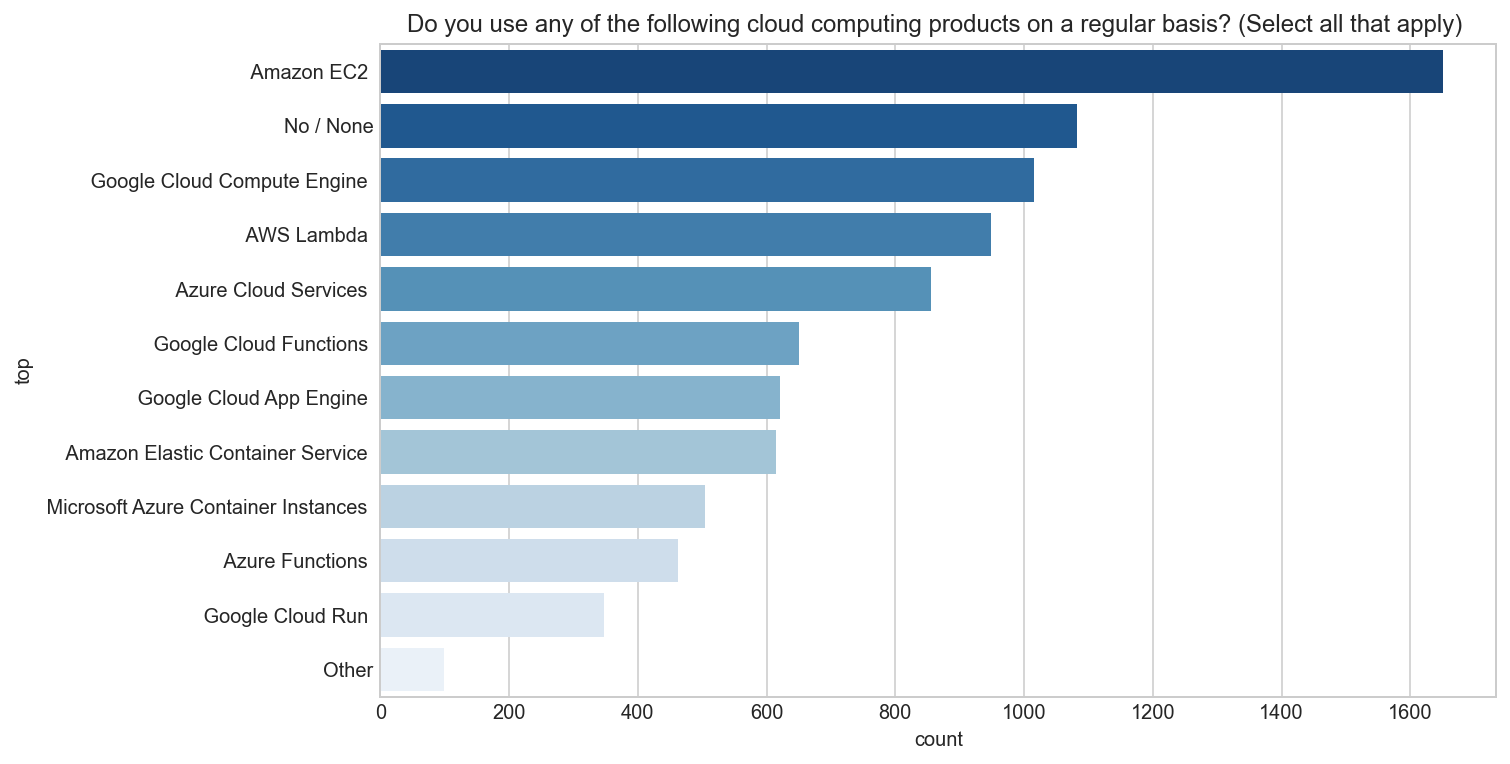

In [188]:
show_plot_by_qno("Q27_A")

### Q27_B In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply)

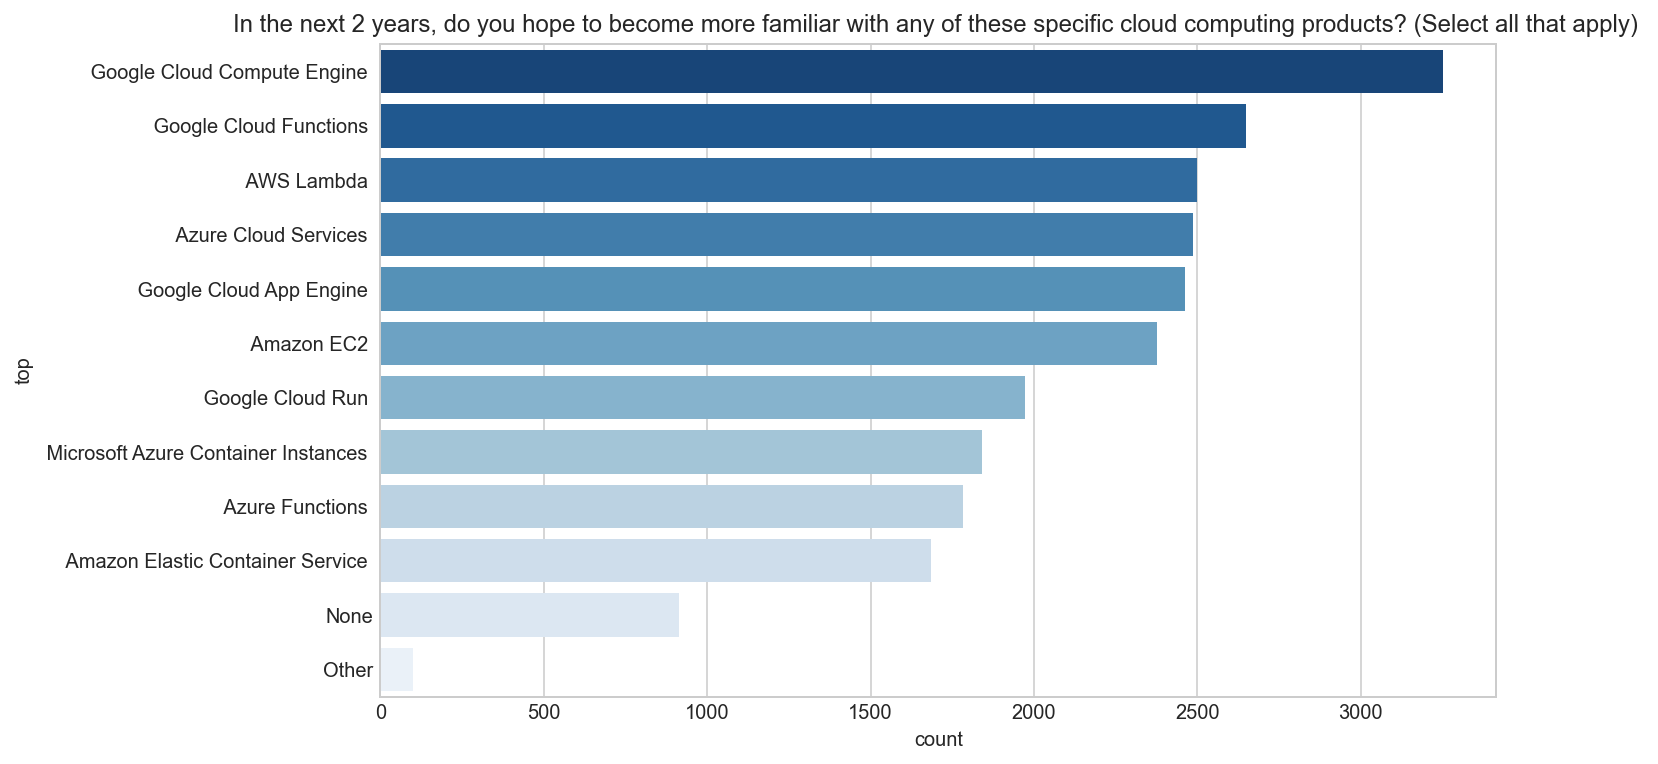

In [189]:
show_plot_by_qno("Q27_B")

## Q28 machine learning products 

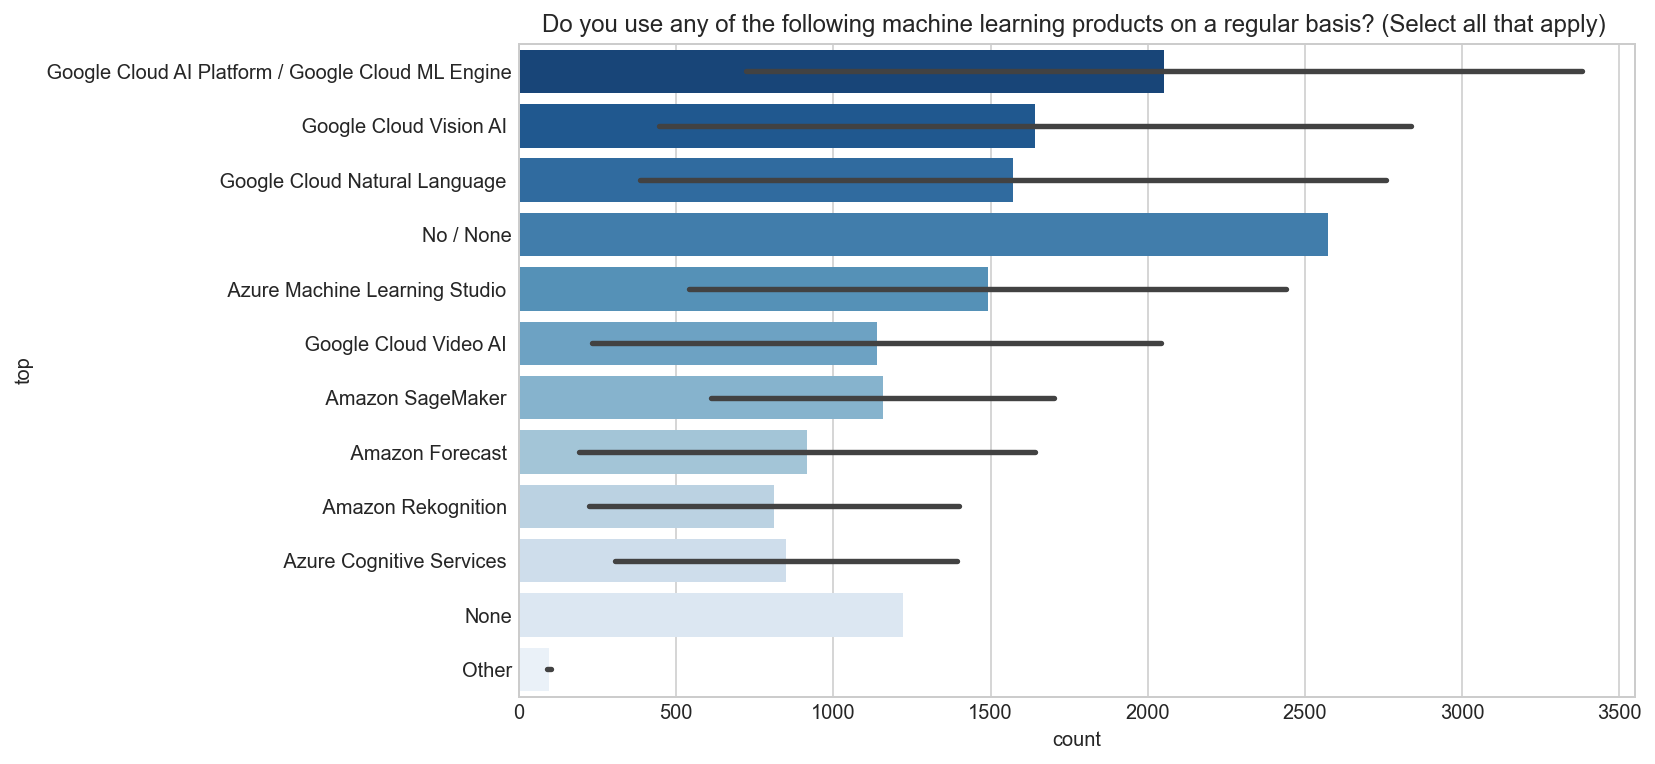

In [190]:
show_plot_by_qno("Q28")

### Q28_A Do you use any of the following machine learning products on a regular basis? (Select all that apply)

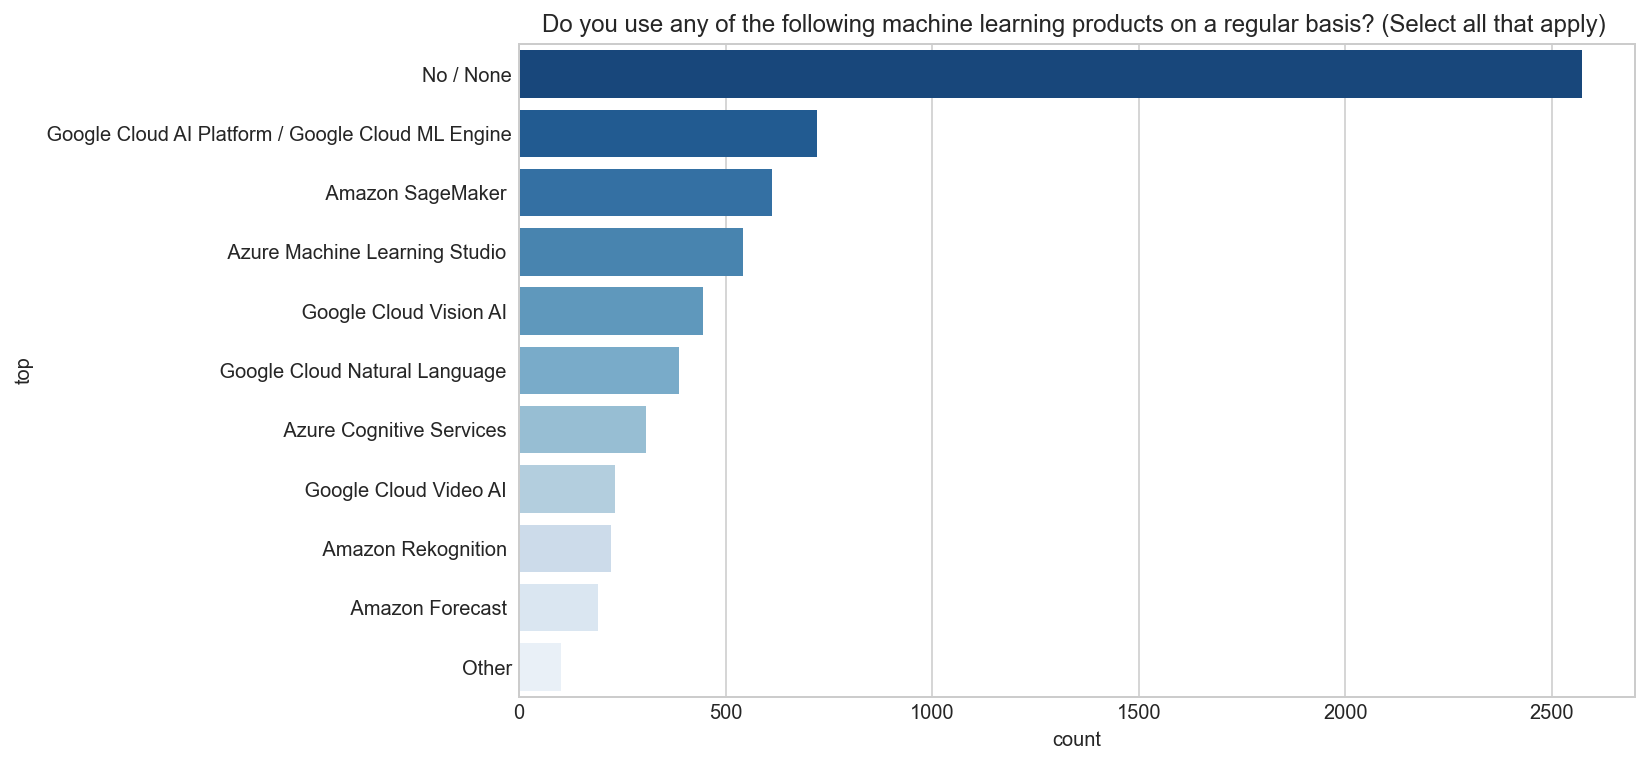

In [191]:
show_plot_by_qno("Q28_A")

### Q28_B In the next 2 years, do you hope to become more familiar with any of these specific machine learning products? (Select all that apply) 

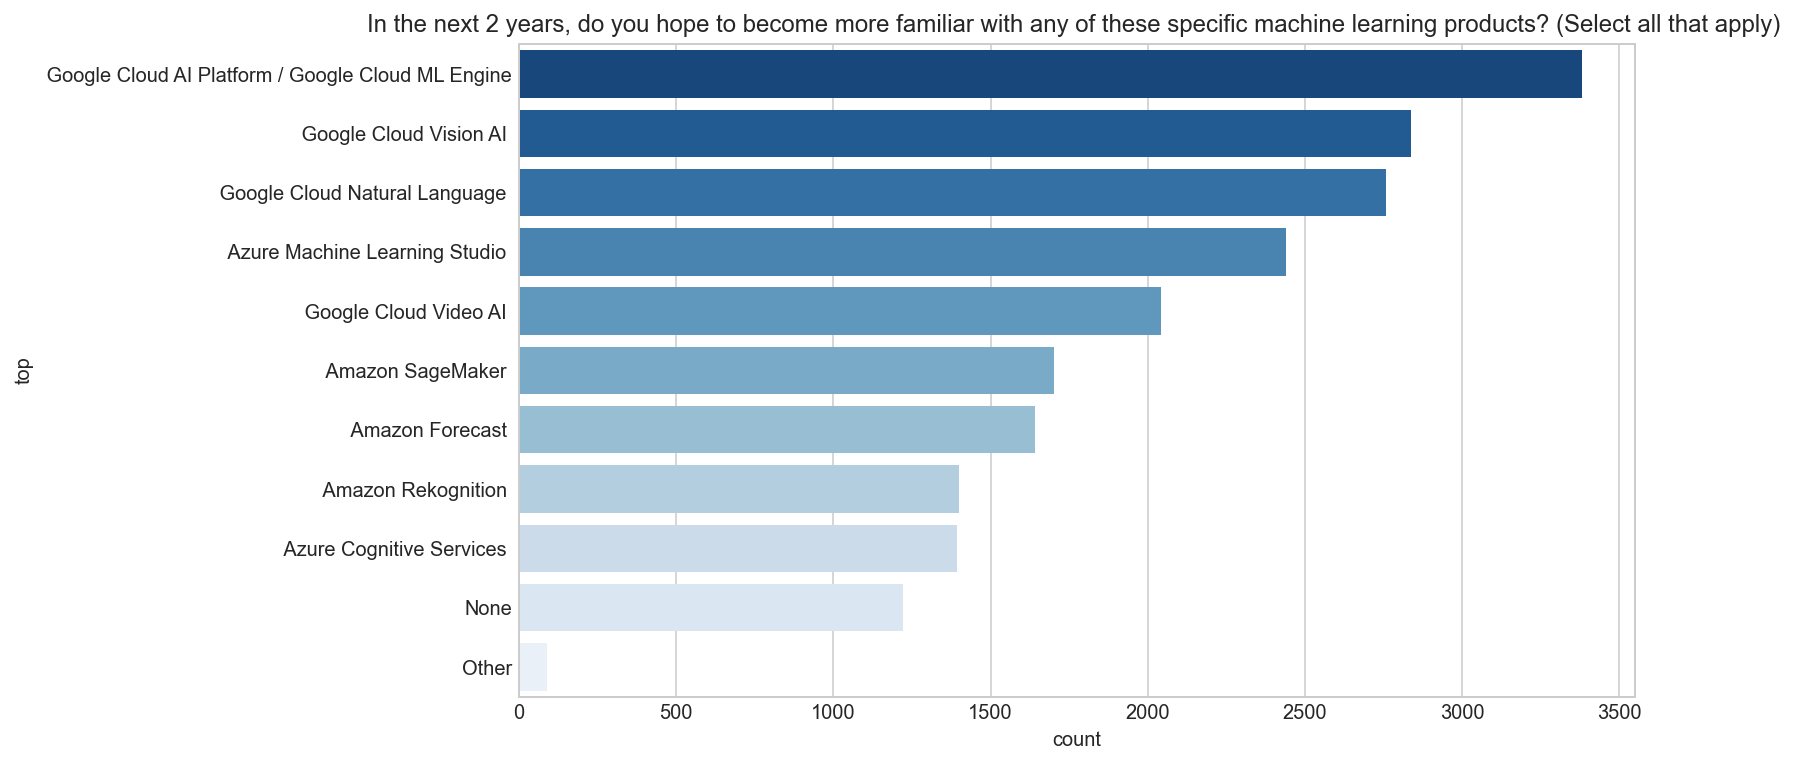

In [192]:
show_plot_by_qno("Q28_B")

## Q29  big data products

### Q29_A Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) 

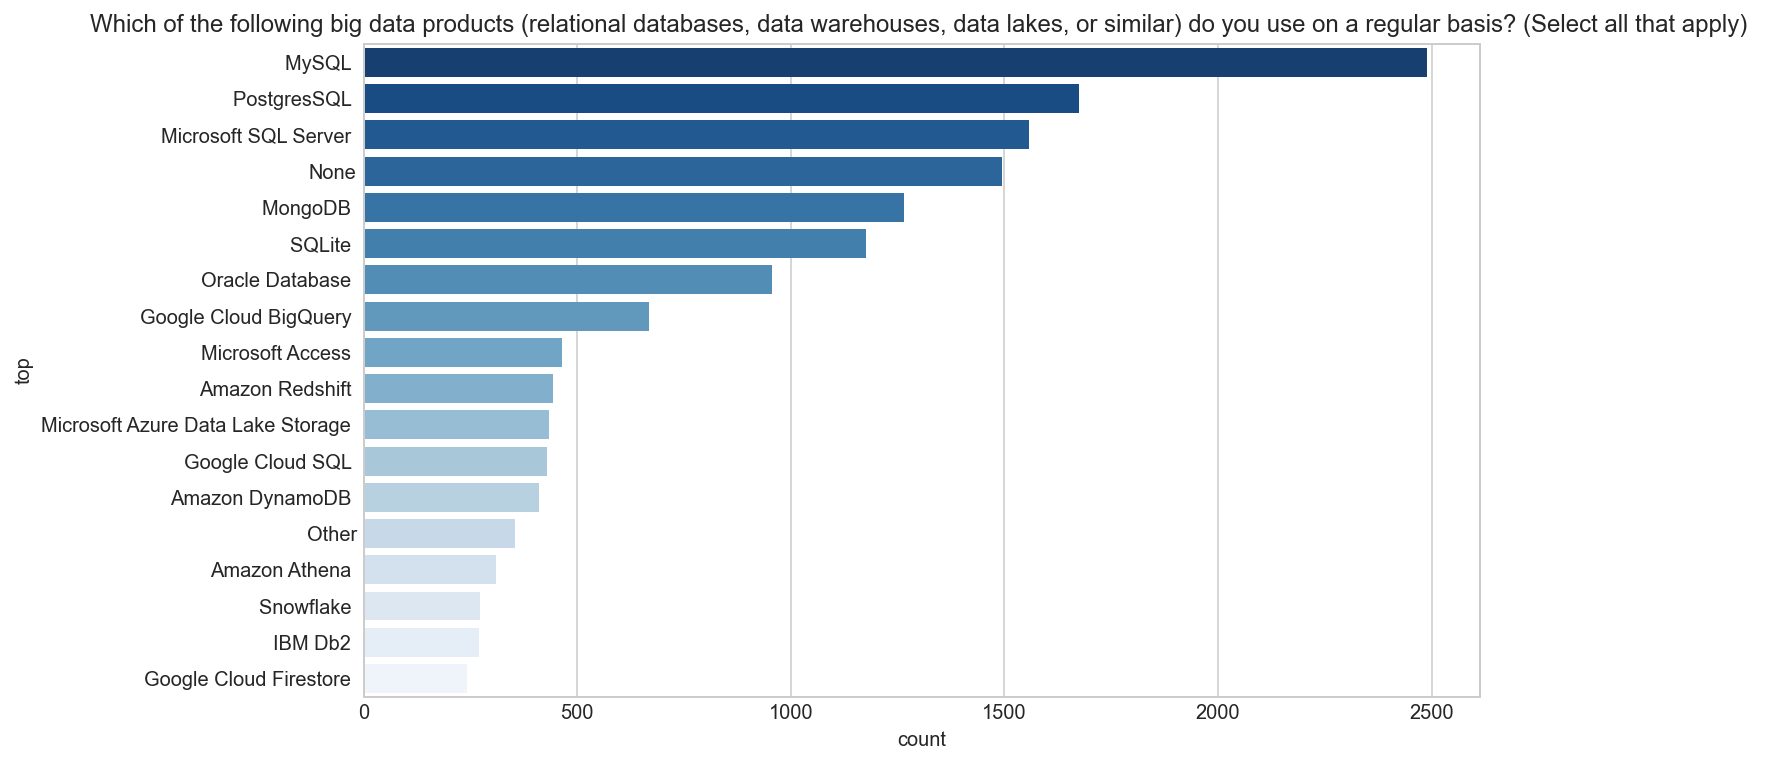

In [193]:
show_plot_by_qno("Q29_A")

### Q29_B Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply)

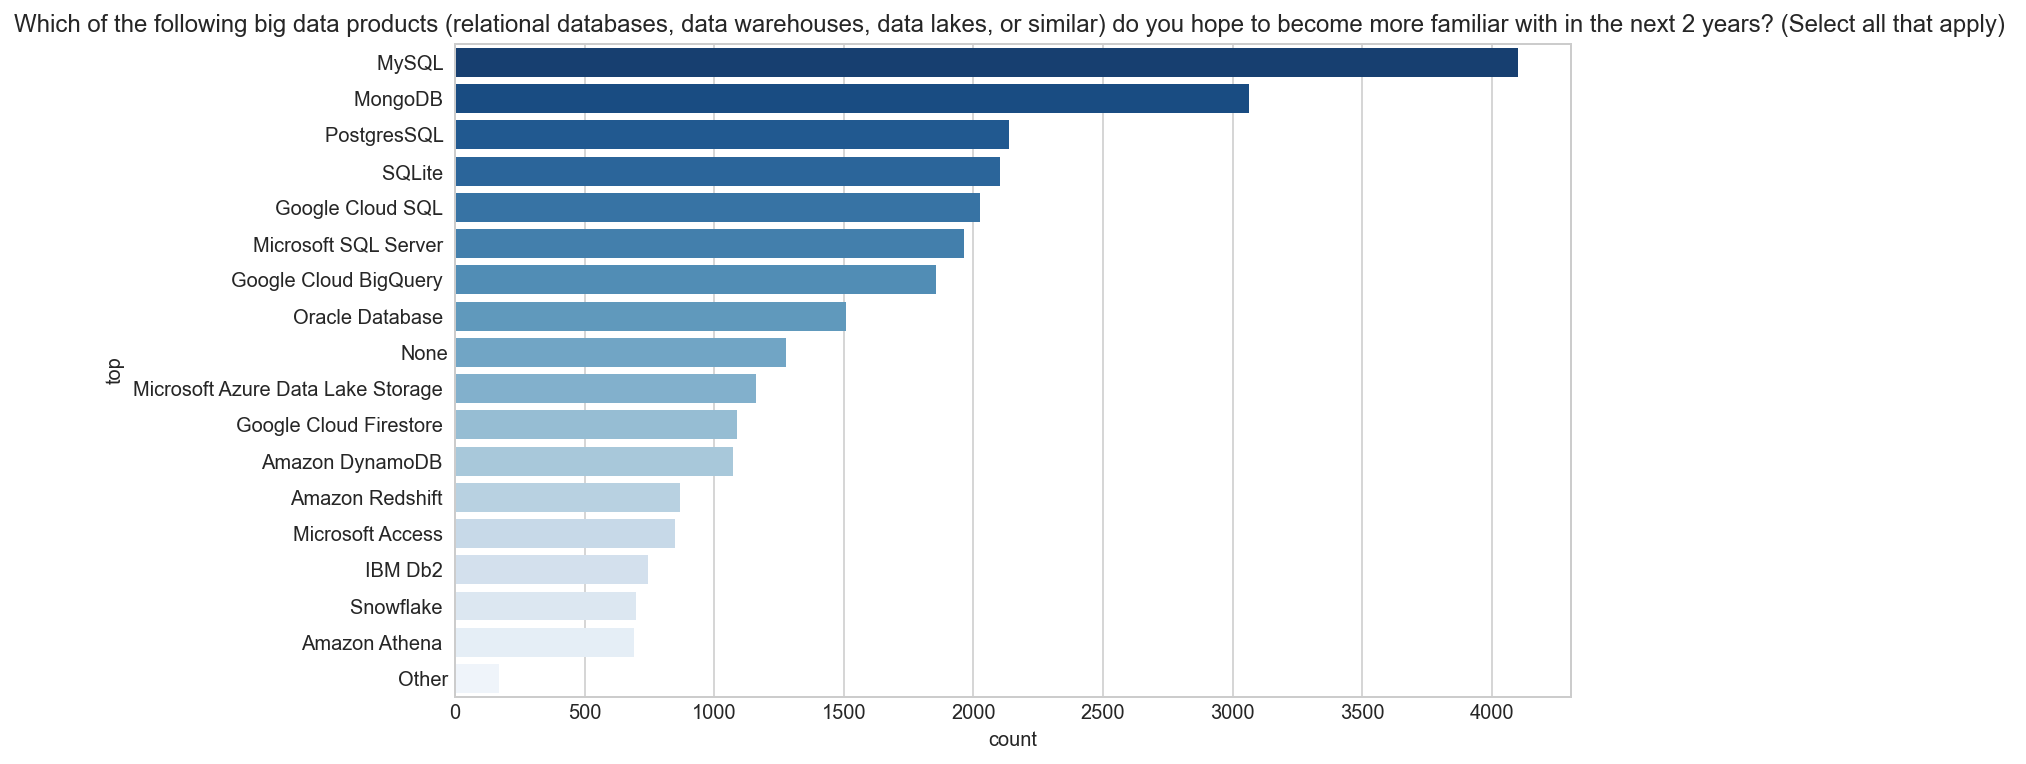

In [194]:
show_plot_by_qno("Q29_B")

## Q30 Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often? - Selected Choice

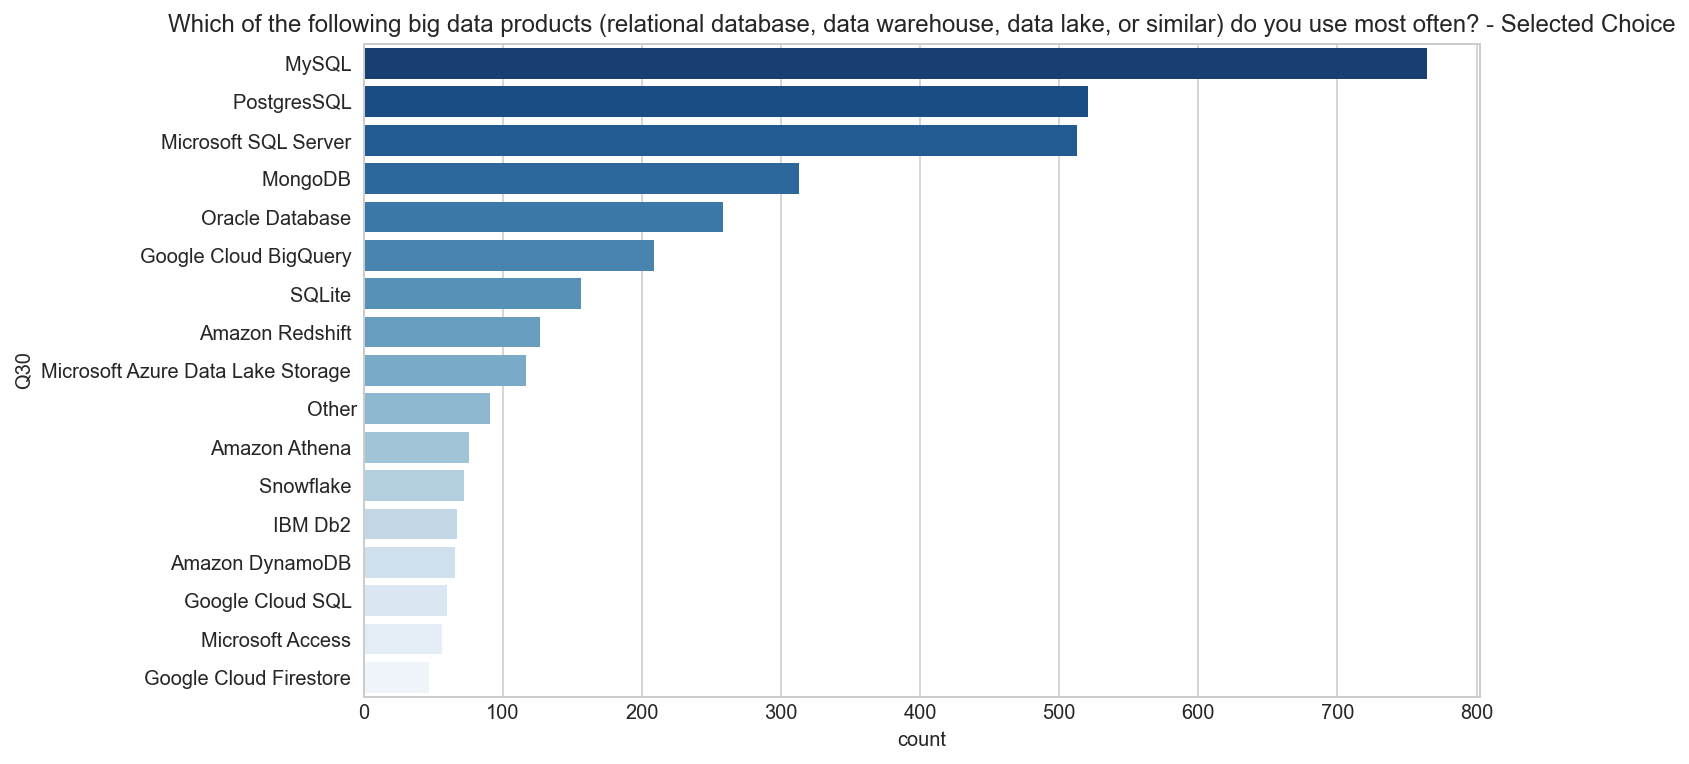

In [195]:
show_plot_by_qno("Q30")

## Q31 business intelligence tools

### Q31_A Which of the following business intelligence tools do you use on a regular basis? (Select all that apply)

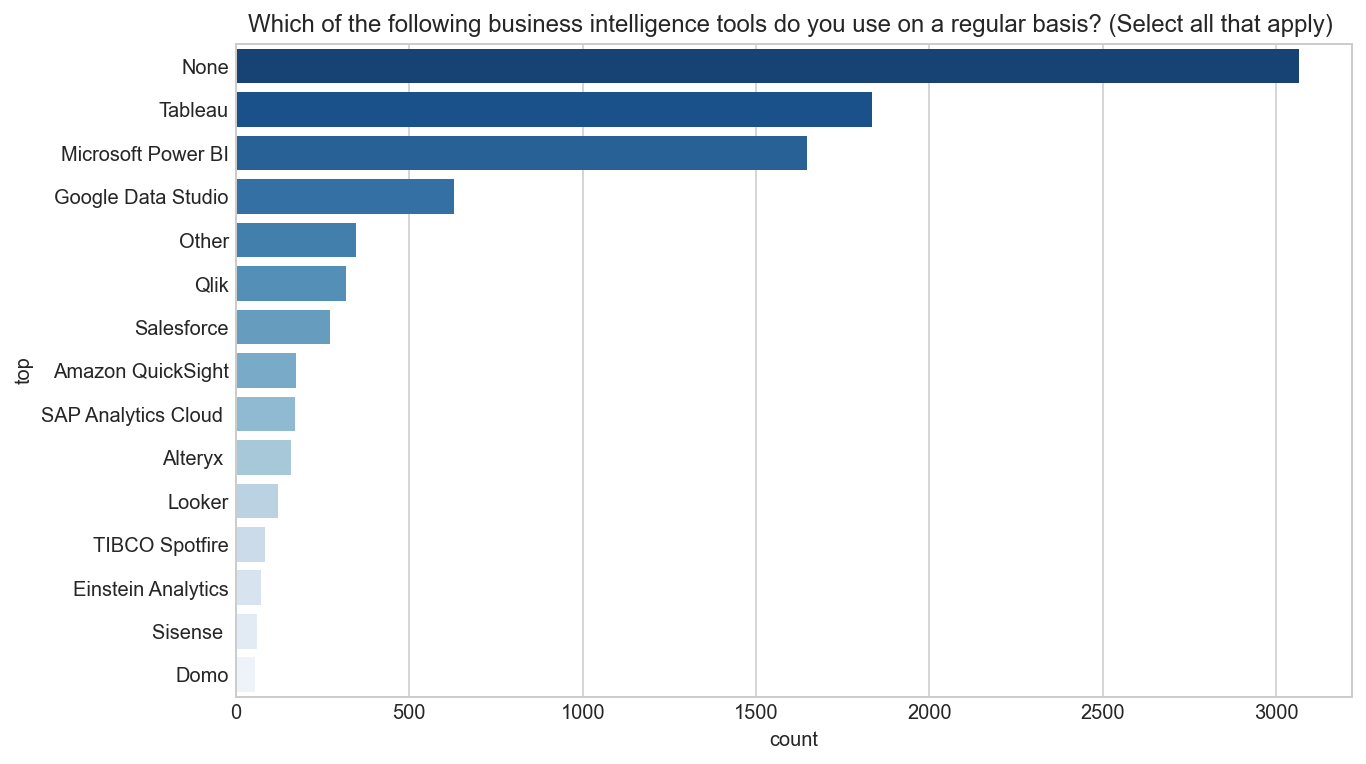

In [196]:
show_plot_by_qno("Q31_A")

### Q31_B Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply)

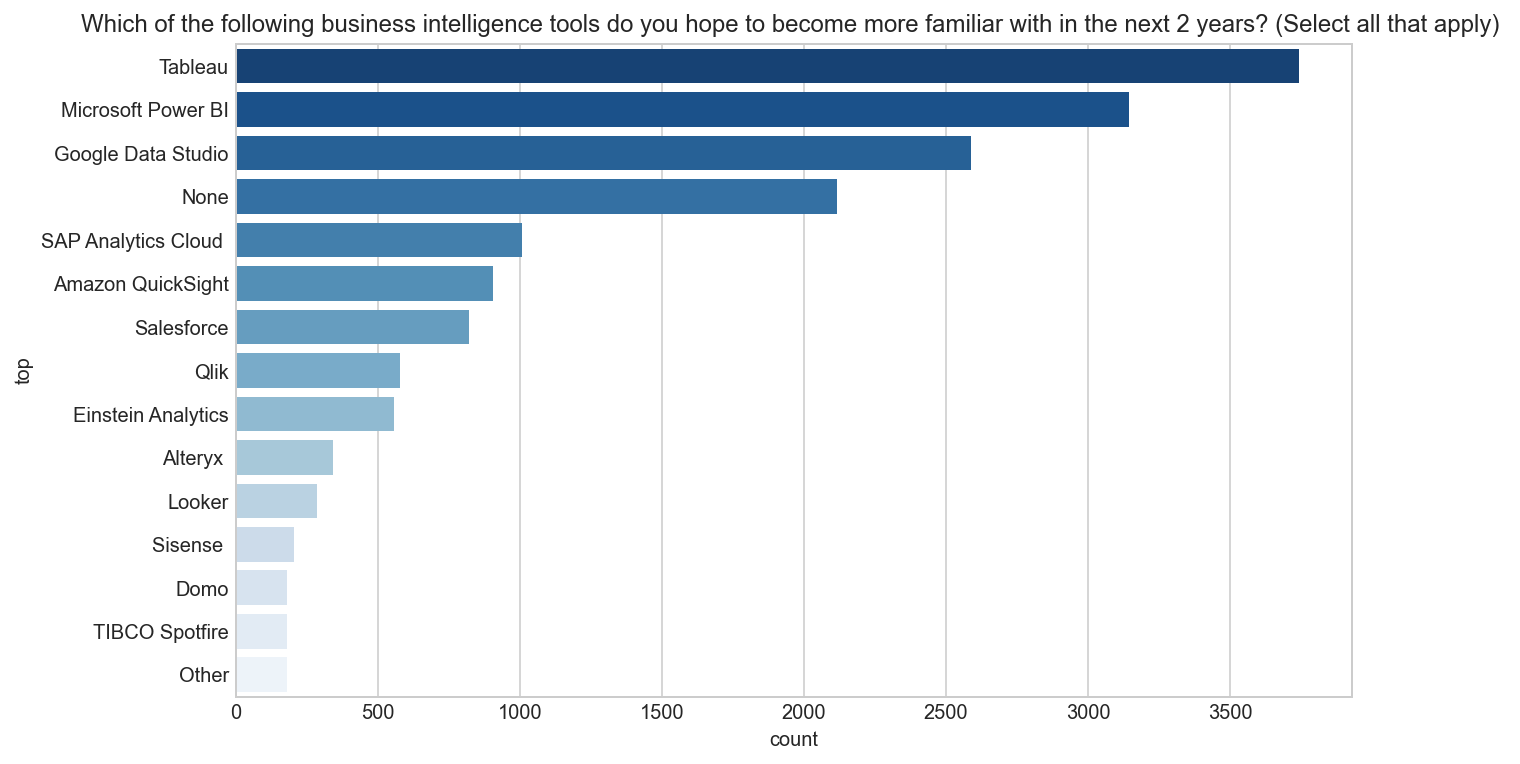

In [197]:
show_plot_by_qno("Q31_B")

## Q32 Which of the following business intelligence tools do you use most often? - Selected Choice

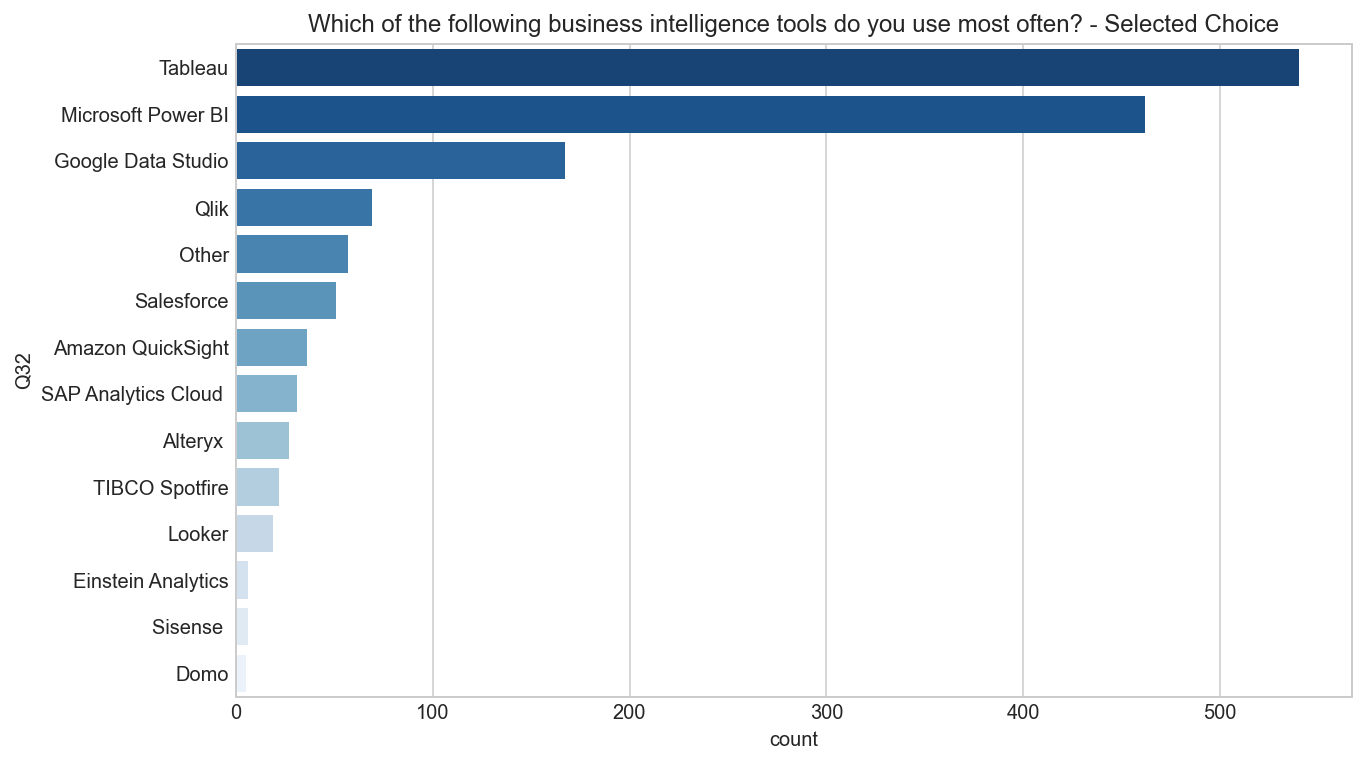

In [198]:
show_plot_by_qno("Q32")

## Q33 automated machine learning tools (or partial AutoML tools)
### Q33_A Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply)

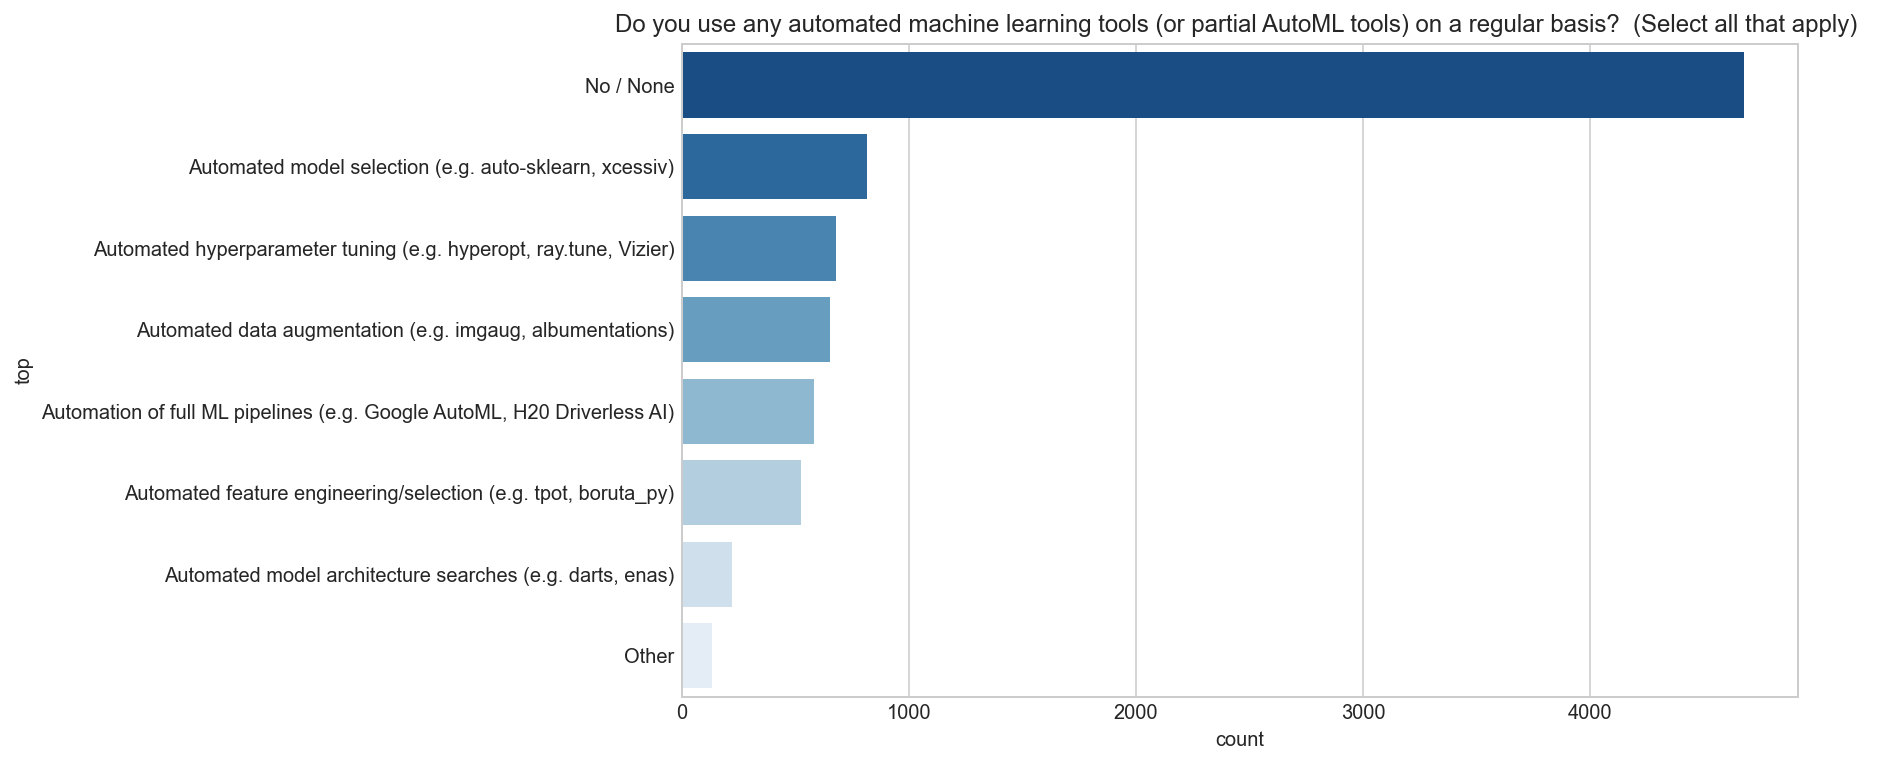

In [199]:
show_plot_by_qno("Q33_A")

### Q33_B Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply)

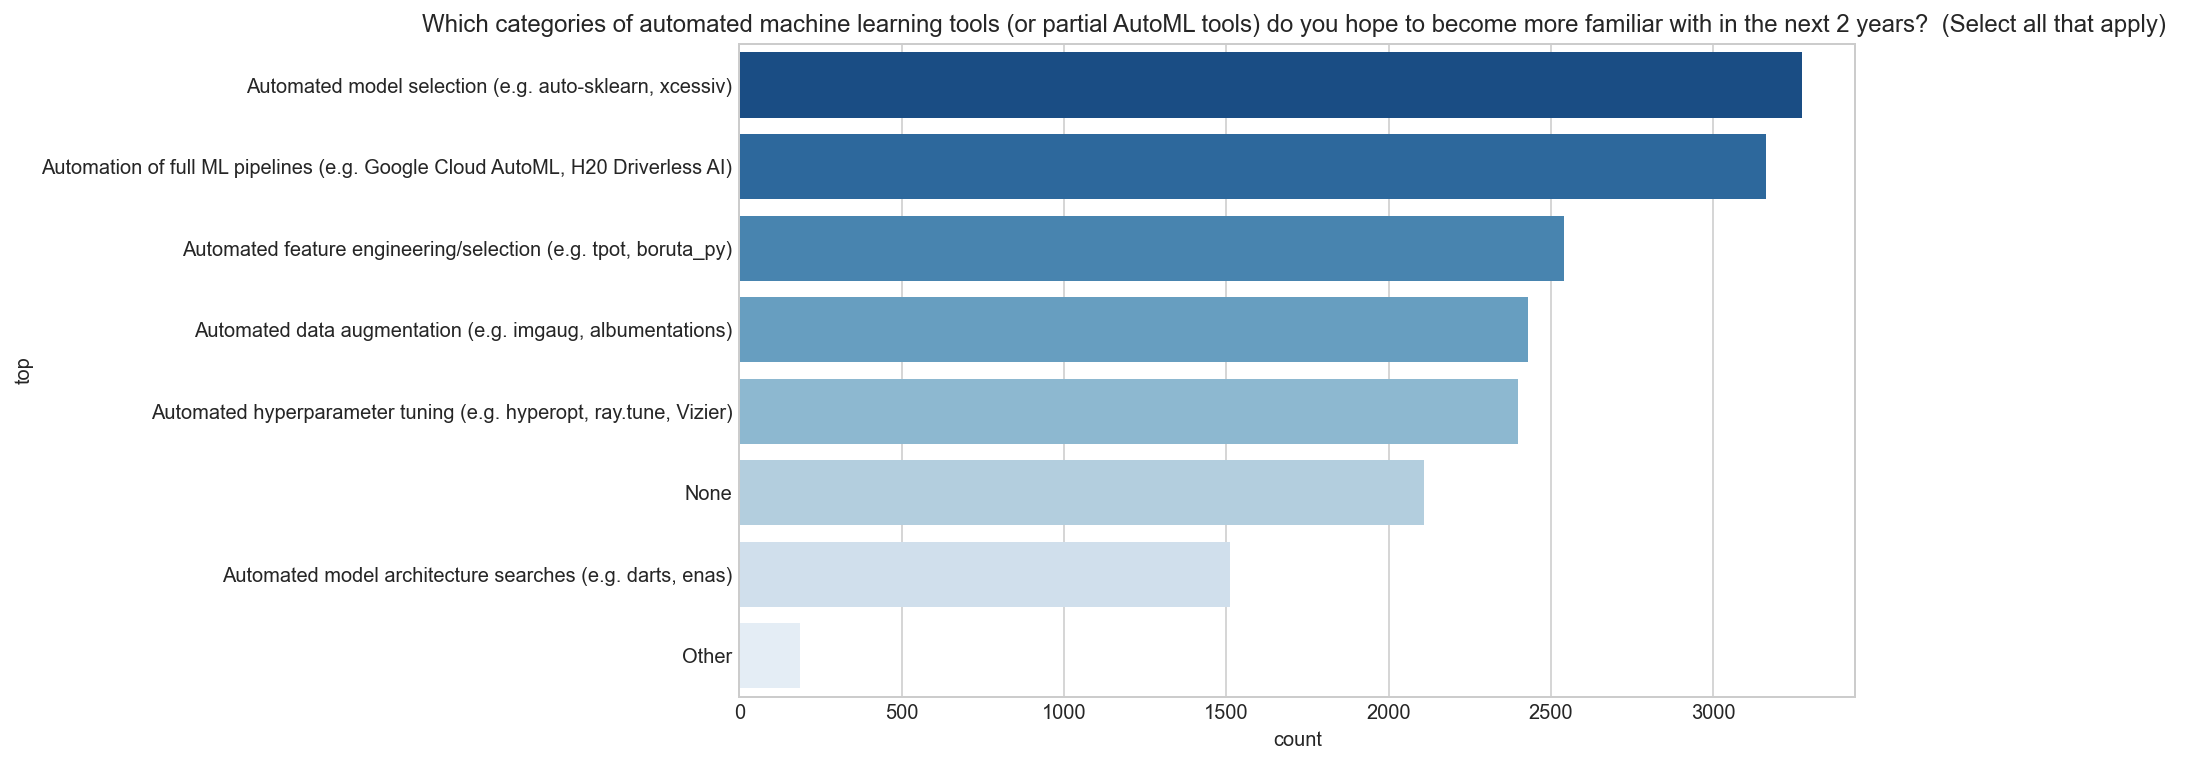

In [200]:
show_plot_by_qno("Q33_B")

## Q34 automated machine learning tools (or partial AutoML tools)
### Q34_A Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) 

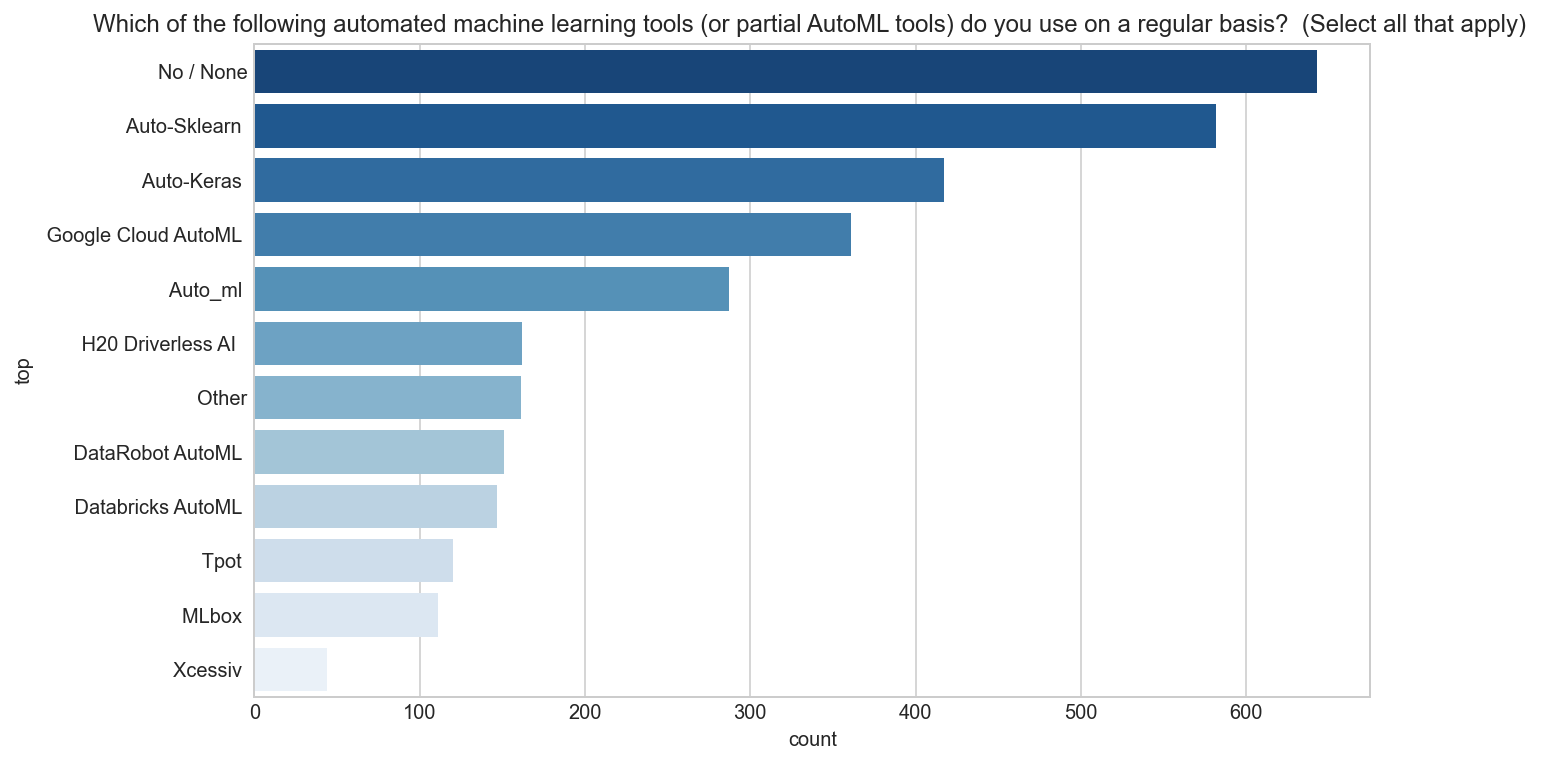

In [201]:
show_plot_by_qno("Q34_A")

### Q34_B Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply)

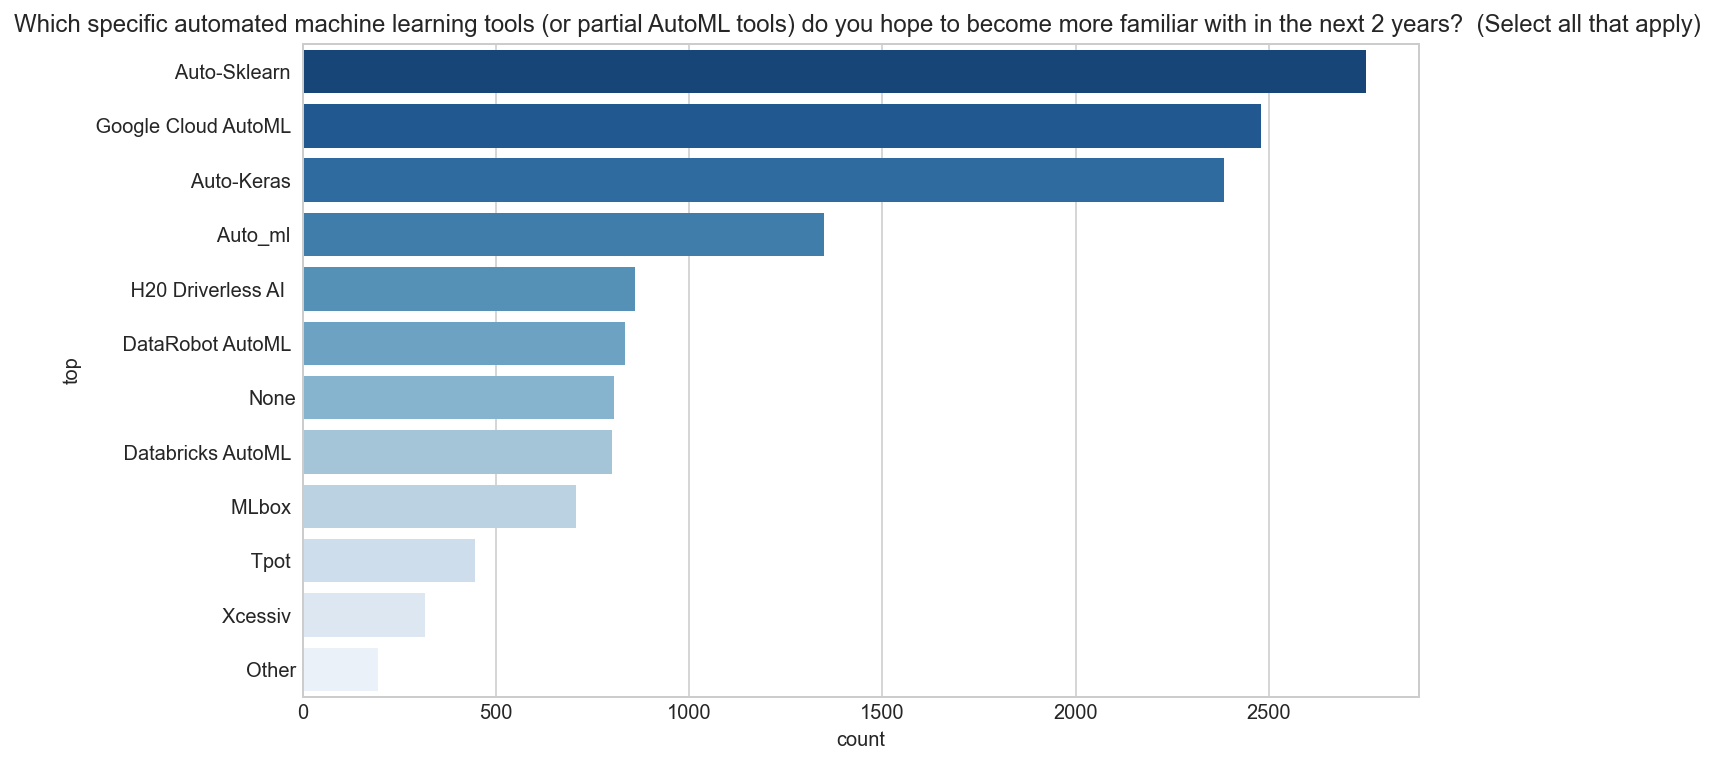

In [202]:
show_plot_by_qno("Q34_B")

## Q35 Do you use any tools to help manage machine learning experiments? (Select all that apply)

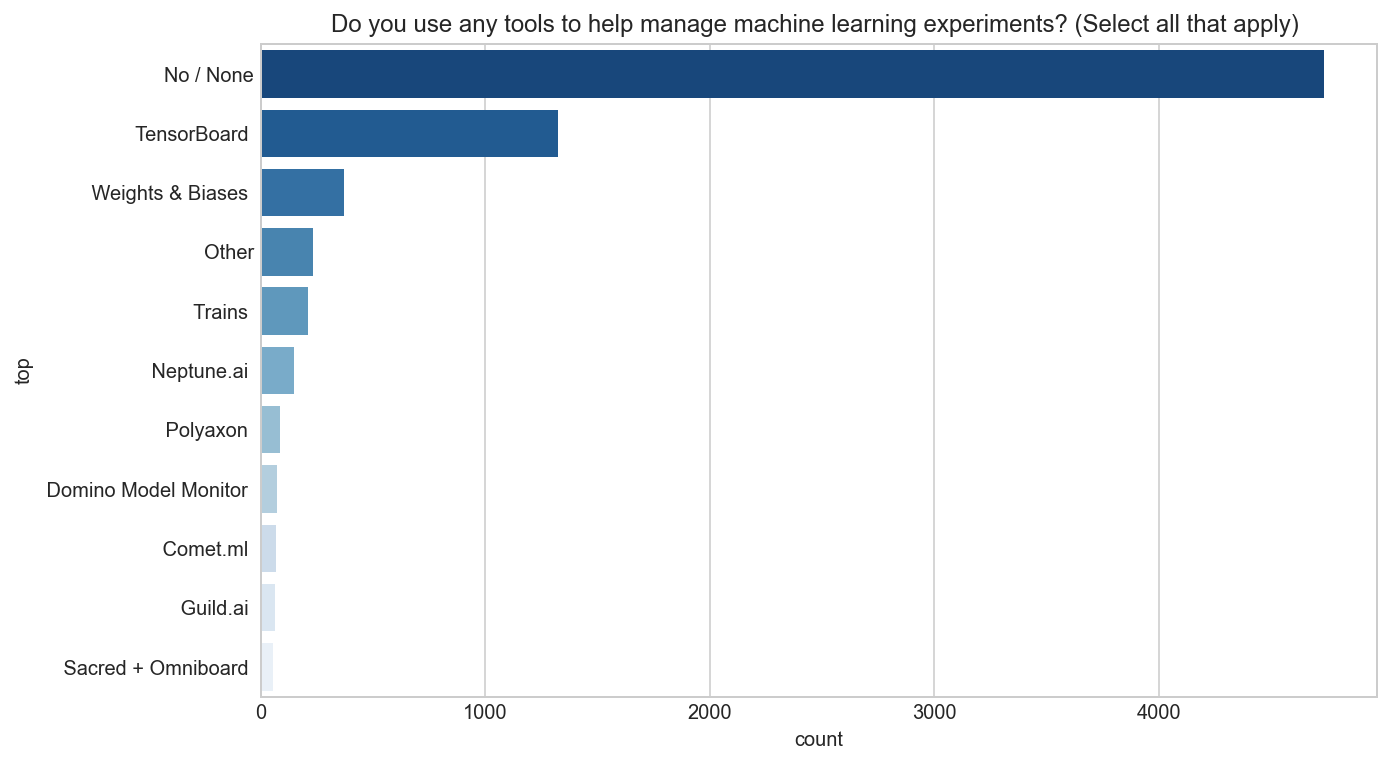

In [203]:
show_plot_by_qno("Q35_A")

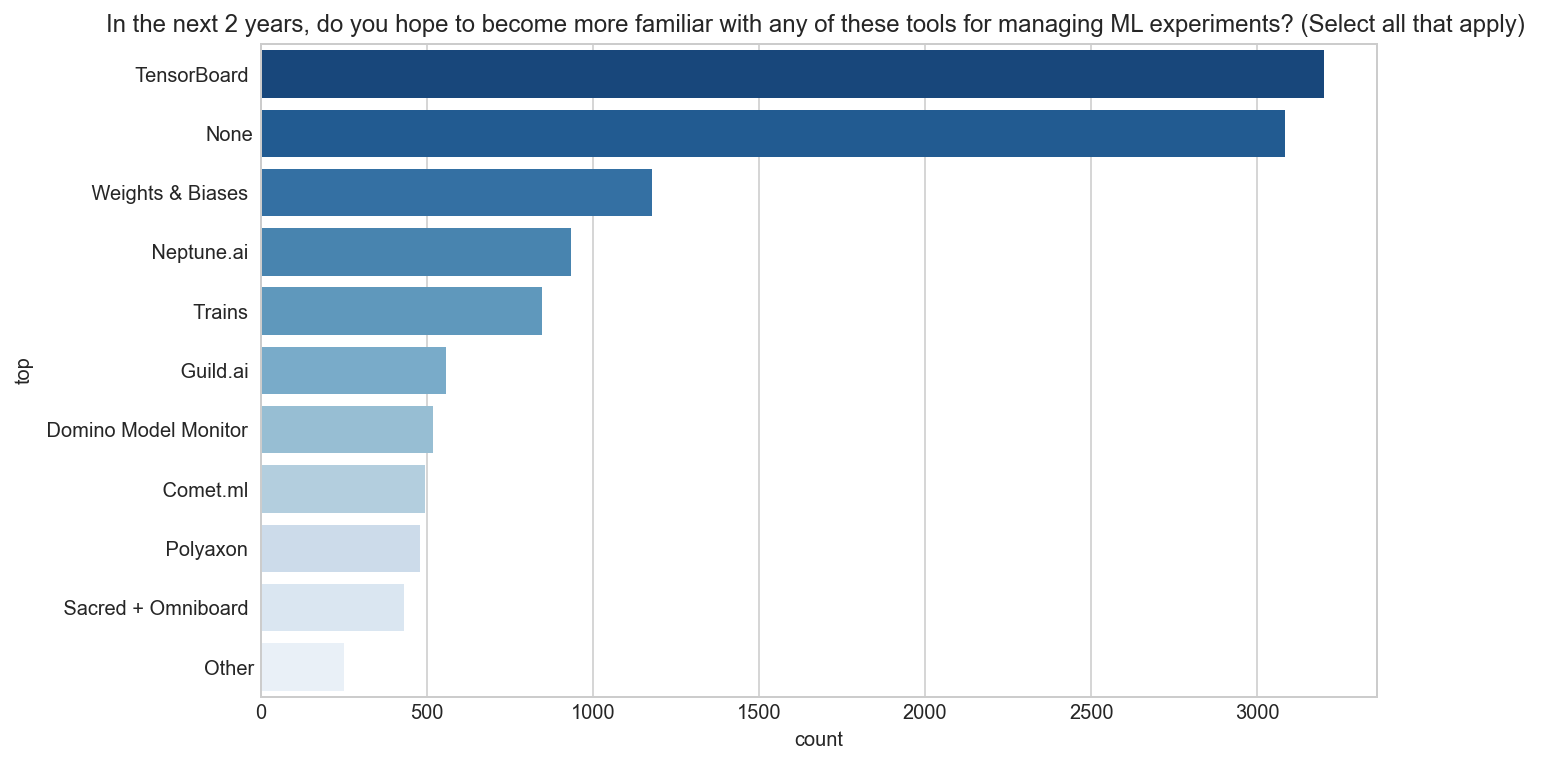

In [204]:
show_plot_by_qno("Q35_B")

## Q36 Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)

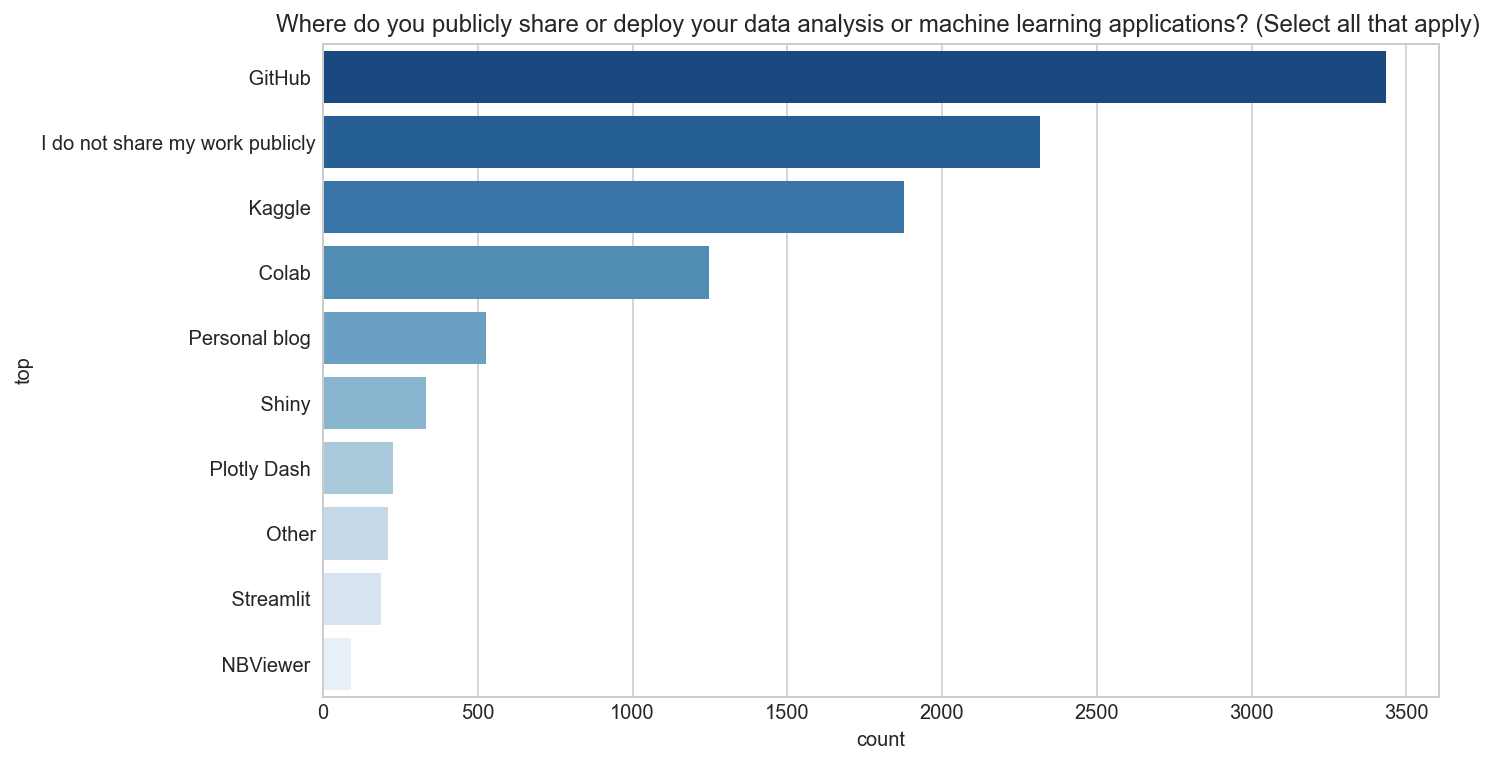

In [205]:
show_plot_by_qno("Q36")

## Q37 On which platforms have you begun or completed data science courses? (Select all that apply)

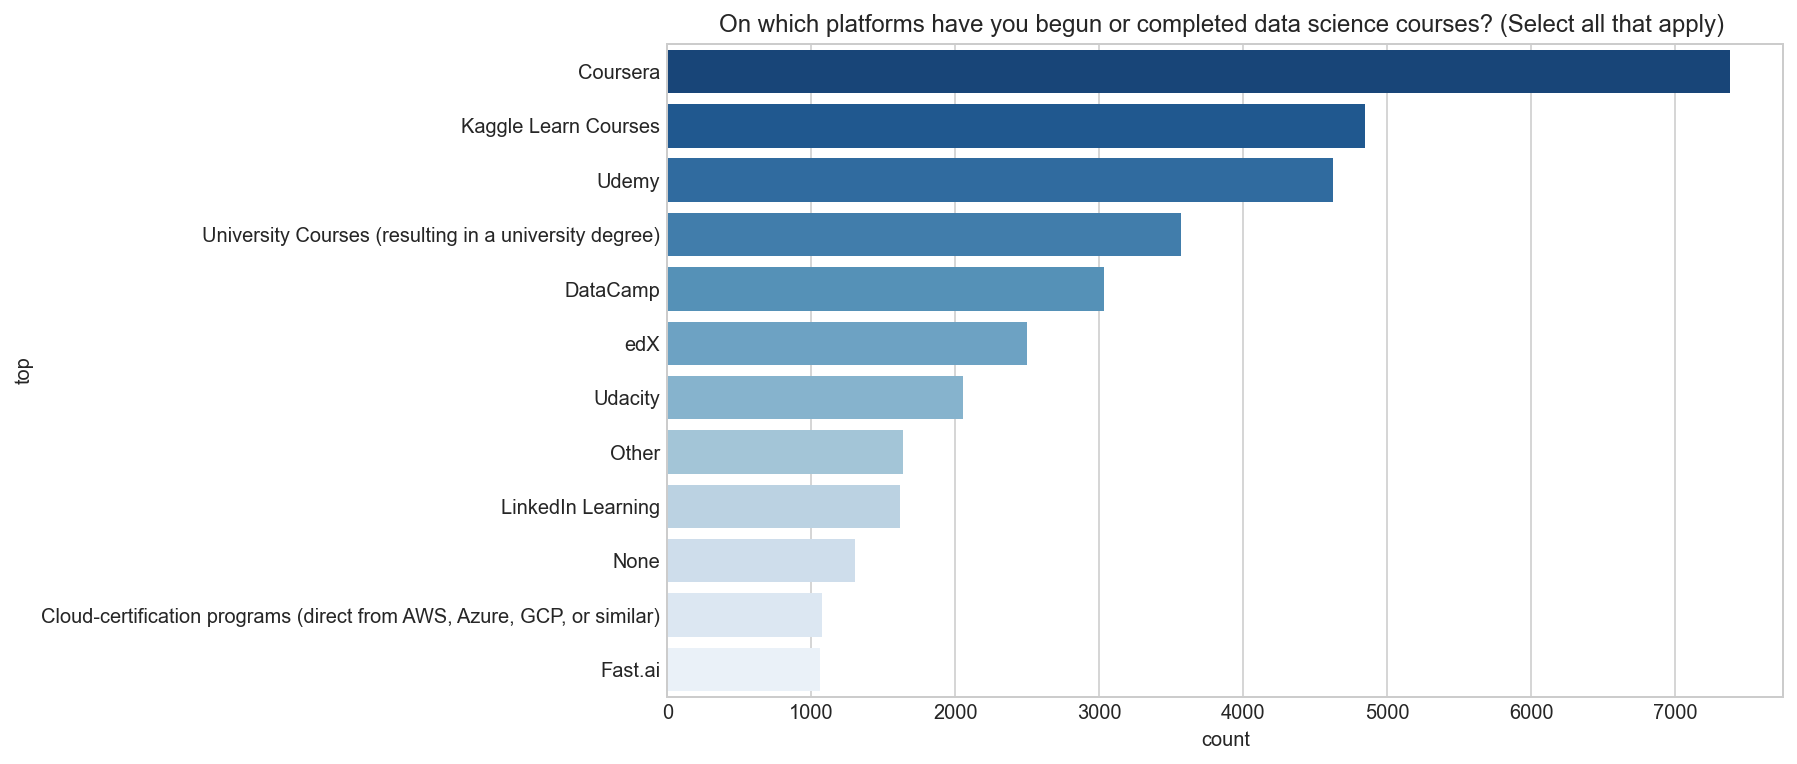

In [206]:
show_plot_by_qno("Q37")

## Q38 What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice

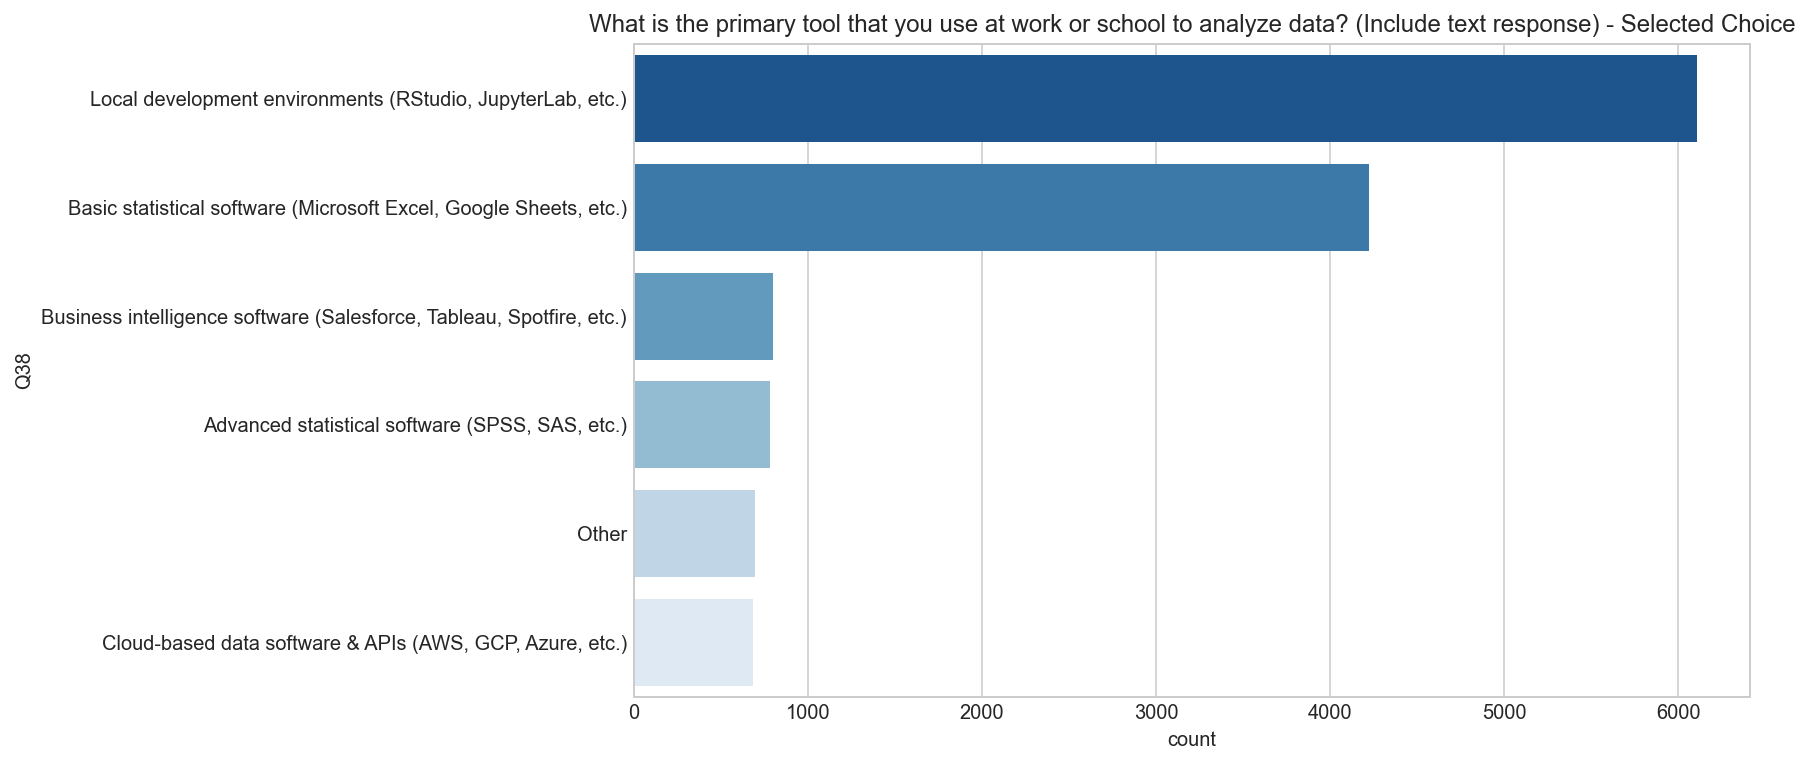

In [207]:
show_plot_by_qno("Q38")

## Q39 Who/what are your favorite media sources that report on data science topics? (Select all that apply) 

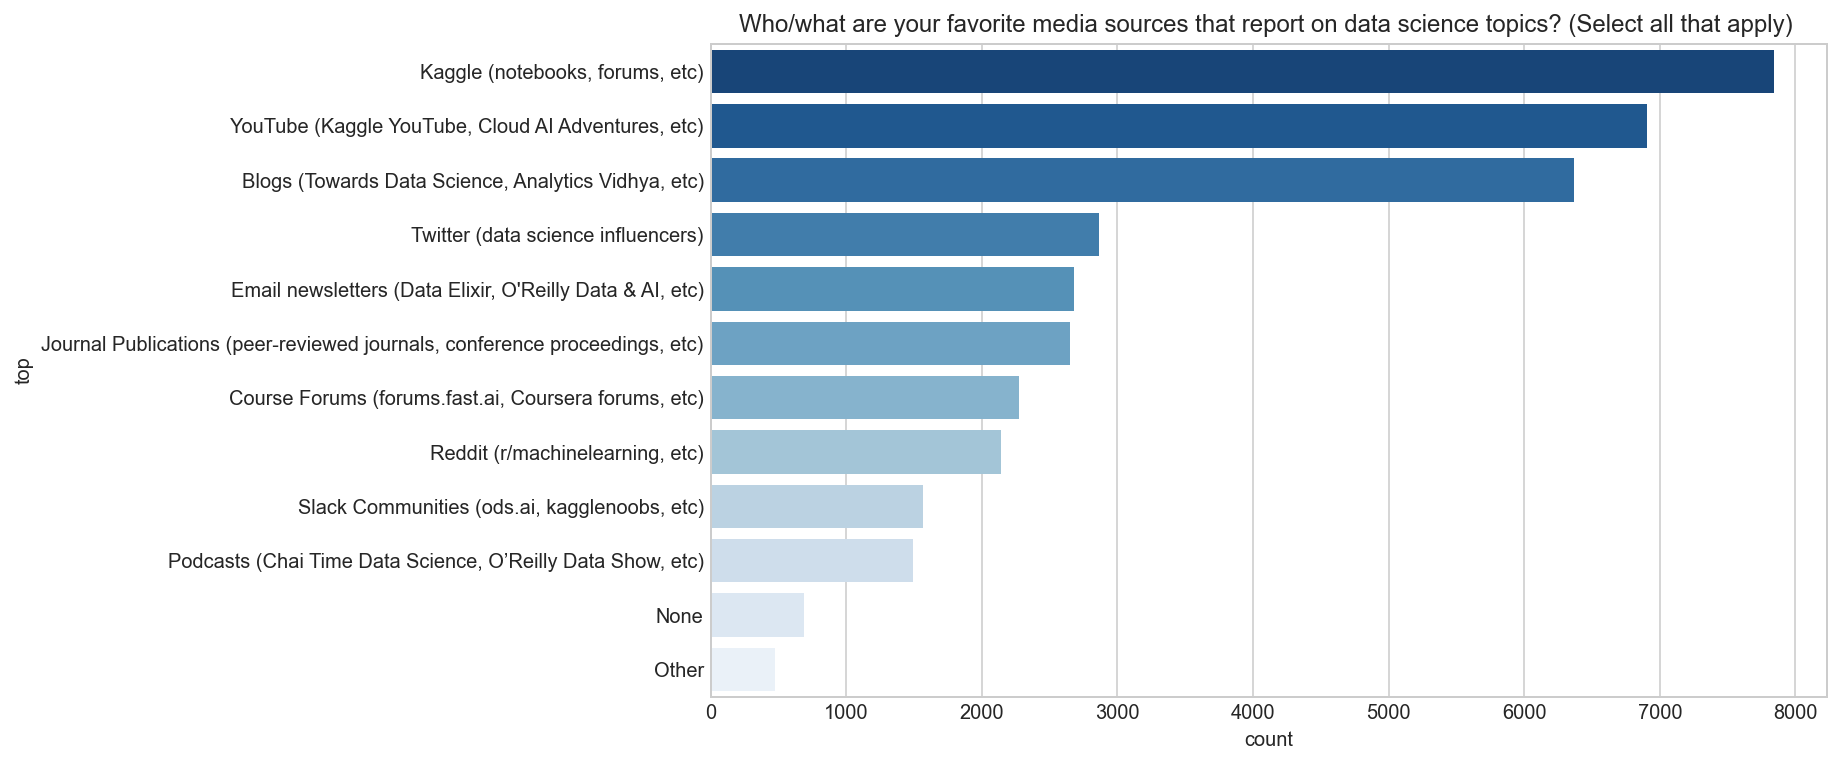

In [208]:
show_plot_by_qno("Q39")